# OpenSAFELY COVID Vaccine coverage report

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is our regular weekly report on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).



In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)

suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_13w_fmt = file.read()

### Report last updated **03 Sep 2021**

### Vaccinations included up to **03 Sep 2021** inclusive

#### 
## Contents:
- **<a href=#summary>Overview</a>**
- **<a href=#summarychart>Summary Charts</a>**
- **Trends in vaccination coverage** according to demographic/clinical features, for:
 - <a href=#charts80>80+ population</a>
 - <a href=#charts70>70-79 population</a>
 - <a href=#charts_shield>shielding (aged 16-69) population</a>
 - <a href=#charts65>65-69 population</a>
 - <a href=#charts60>60-64 population</a>
 - <a href=#charts55>55-59 population</a>
 - <a href=#charts50>50-54 population</a>
 - <a href=#charts40>40-49 population</a>
<br>
<br>
- **<a href=#tables>Current vaccination coverage of each eligible population group, according to demographic/clinical features</a>**
  - Includes each of the groups above, plus <a href=#Cumulative-vaccination-figures-among-care-home-population>care home (65+)</a> and <a href=#Cumulative-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population>LD (aged 16-64)</a> populations.
  - **NEW** - tables now include <a href=#Cumulative-vaccination-figures-among-16-17-population>16-17</a>  population
<br>
<br>
- Appendix: <a href=#ethnicity>Proportion of each population group for whom ethnicity is known</a>


# 
## Overview of Vaccination Figures to date <a name='summary' />


In [2]:
import json
summary_stats_1 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_first_dose.txt")).set_index("Unnamed: 0")
summary_stats_2 = pd.read_csv(os.path.join("..", "interim-outputs","text", "summary_stats_second_dose.txt")).set_index("Unnamed: 0")
additional_stats = pd.read_csv(os.path.join("..", "interim-outputs","text", "additional_stats_first_dose.txt")).set_index("Unnamed: 0")

out = summary_stats_1.join(summary_stats_2)
out.index = out.index.rename("Group")
display(out)


display(Markdown(f"##### \n" 
                 "**NB** Patient counts are rounded to nearest 7\n"
                "##### \n" ))

display(Markdown("### Group definitions \n - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).\n"
                 "\n- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) \
                 provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).\n"                
                "\n- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)\
                codelist and excludes people who are shielding.\n"
                 "\n- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding \
                is only counted in the shielding group, not in the 65-69 population\n"))


display(Markdown(f"##### \n"
                 f"### Vaccine types\n"
                 f"**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown(f"### Second doses and dose combinations" ))
display(Markdown("**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>\
                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)"))

for x in additional_stats.index[3:7]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))
    
display(Markdown("<br>**Note:** mixed doses counts patients with two doses at least 19 days apart, \
                  excluding patients with two different brands recorded on the same day \
                  or where the first dose was recorded on a date prior to when the given brand was available in the UK"))
       
for x in additional_stats.index[7:]:  
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))

    


first dose as at 03 Sep 2021  \
Group                                                  
Total vaccinated in TPP                       24,997   
80+                           50.2% (1,029 of 2,051)   
70-79                         49.7% (1,806 of 3,633)   
care home                       47.8% (651 of 1,365)   
shielding (aged 16-69)            52.9% (224 of 427)   
65-69                         50.3% (1,092 of 2,177)   
LD (aged 16-64)                   49.6% (406 of 812)   
60-64                         48.4% (1,309 of 2,702)   
55-59                         51.3% (1,533 of 2,982)   
50-54                         50.7% (1,743 of 3,437)   
40-49                         50.5% (3,108 of 6,160)   
30-39                         49.7% (3,171 of 6,377)   
18-29                         50.3% (3,752 of 7,455)   
16-17                        49.7% (5,180 of 10,416)   

                        second dose as at 03 Sep 2021  
Group                                                  
Total vaccinated in TPP                        15,001  
80+                              30.6% (630 of 2,051)  
70-79                          30.5% (1,106 of 3,633)  
care home                        29.1% (399 of 1,365)  
shielding (aged 16-69)             31.1% (133 of 427)  
65-69                            28.7% (623 of 2,177)  
LD (aged 16-64)                    30.5% (245 of 812)  
60-64                            29.5% (798 of 2,702)  
55-59                            28.9% (861 of 2,982)  
50-54                          30.7% (1,057 of 3,437)  
40-49                          29.3% (1,806 of 6,160)  
30-39                          29.7% (1,897 of 6,377)  
18-29                          30.0% (2,240 of 7,455)  
16-17                         30.8% (3,206 of 10,416)

##### 
**NB** Patient counts are rounded to nearest 7
##### 


### Group definitions 
 - The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).

- The **shielding** group is defined based on patients having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/)                  provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).

- The **LD** (learning disability) group is defined based on [this](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/)                codelist and excludes people who are shielding.

- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding                 is only counted in the shielding group, not in the 65-69 population


##### 
### Vaccine types
**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all first doses): **0.0%** (7)


Pfizer vaccines (% of all first doses): **0.1%** (28)


Moderna vaccines (% of all first doses): **0.0%** (0)


### Second doses and dose combinations

**Note:** second dose figures are raw proportions and do not take into account how many are due, which is likely to vary substantially by brand.<br>                For more detailed analysis please refer to our [second dose report](https://reports.opensafely.org/reports/vaccine-coverage-second-doses/)

Second doses (% of all vaccinated): **60.0%** (15,001)


Second doses (% of Ox-AZ first doses): **97600.0%** (6,832)


Second doses (% of Pfizer first doses): **18975.0%** (5,313)


Second doses (% of Moderna first doses): **0%** (7,063)


<br>**Note:** mixed doses counts patients with two doses at least 19 days apart,                   excluding patients with two different brands recorded on the same day                   or where the first dose was recorded on a date prior to when the given brand was available in the UK

Mixed doses Ox-AZ + Pfizer (% of fully vaccinated): **0.0%** (0)


Mixed doses Ox-AZ + Moderna (% of fully vaccinated): **0.0%** (0)


Mixed doses Moderna + Pfizer (% of fully vaccinated): **0.0%** (0)


# 

## Summary Charts <a name='summarychart' />

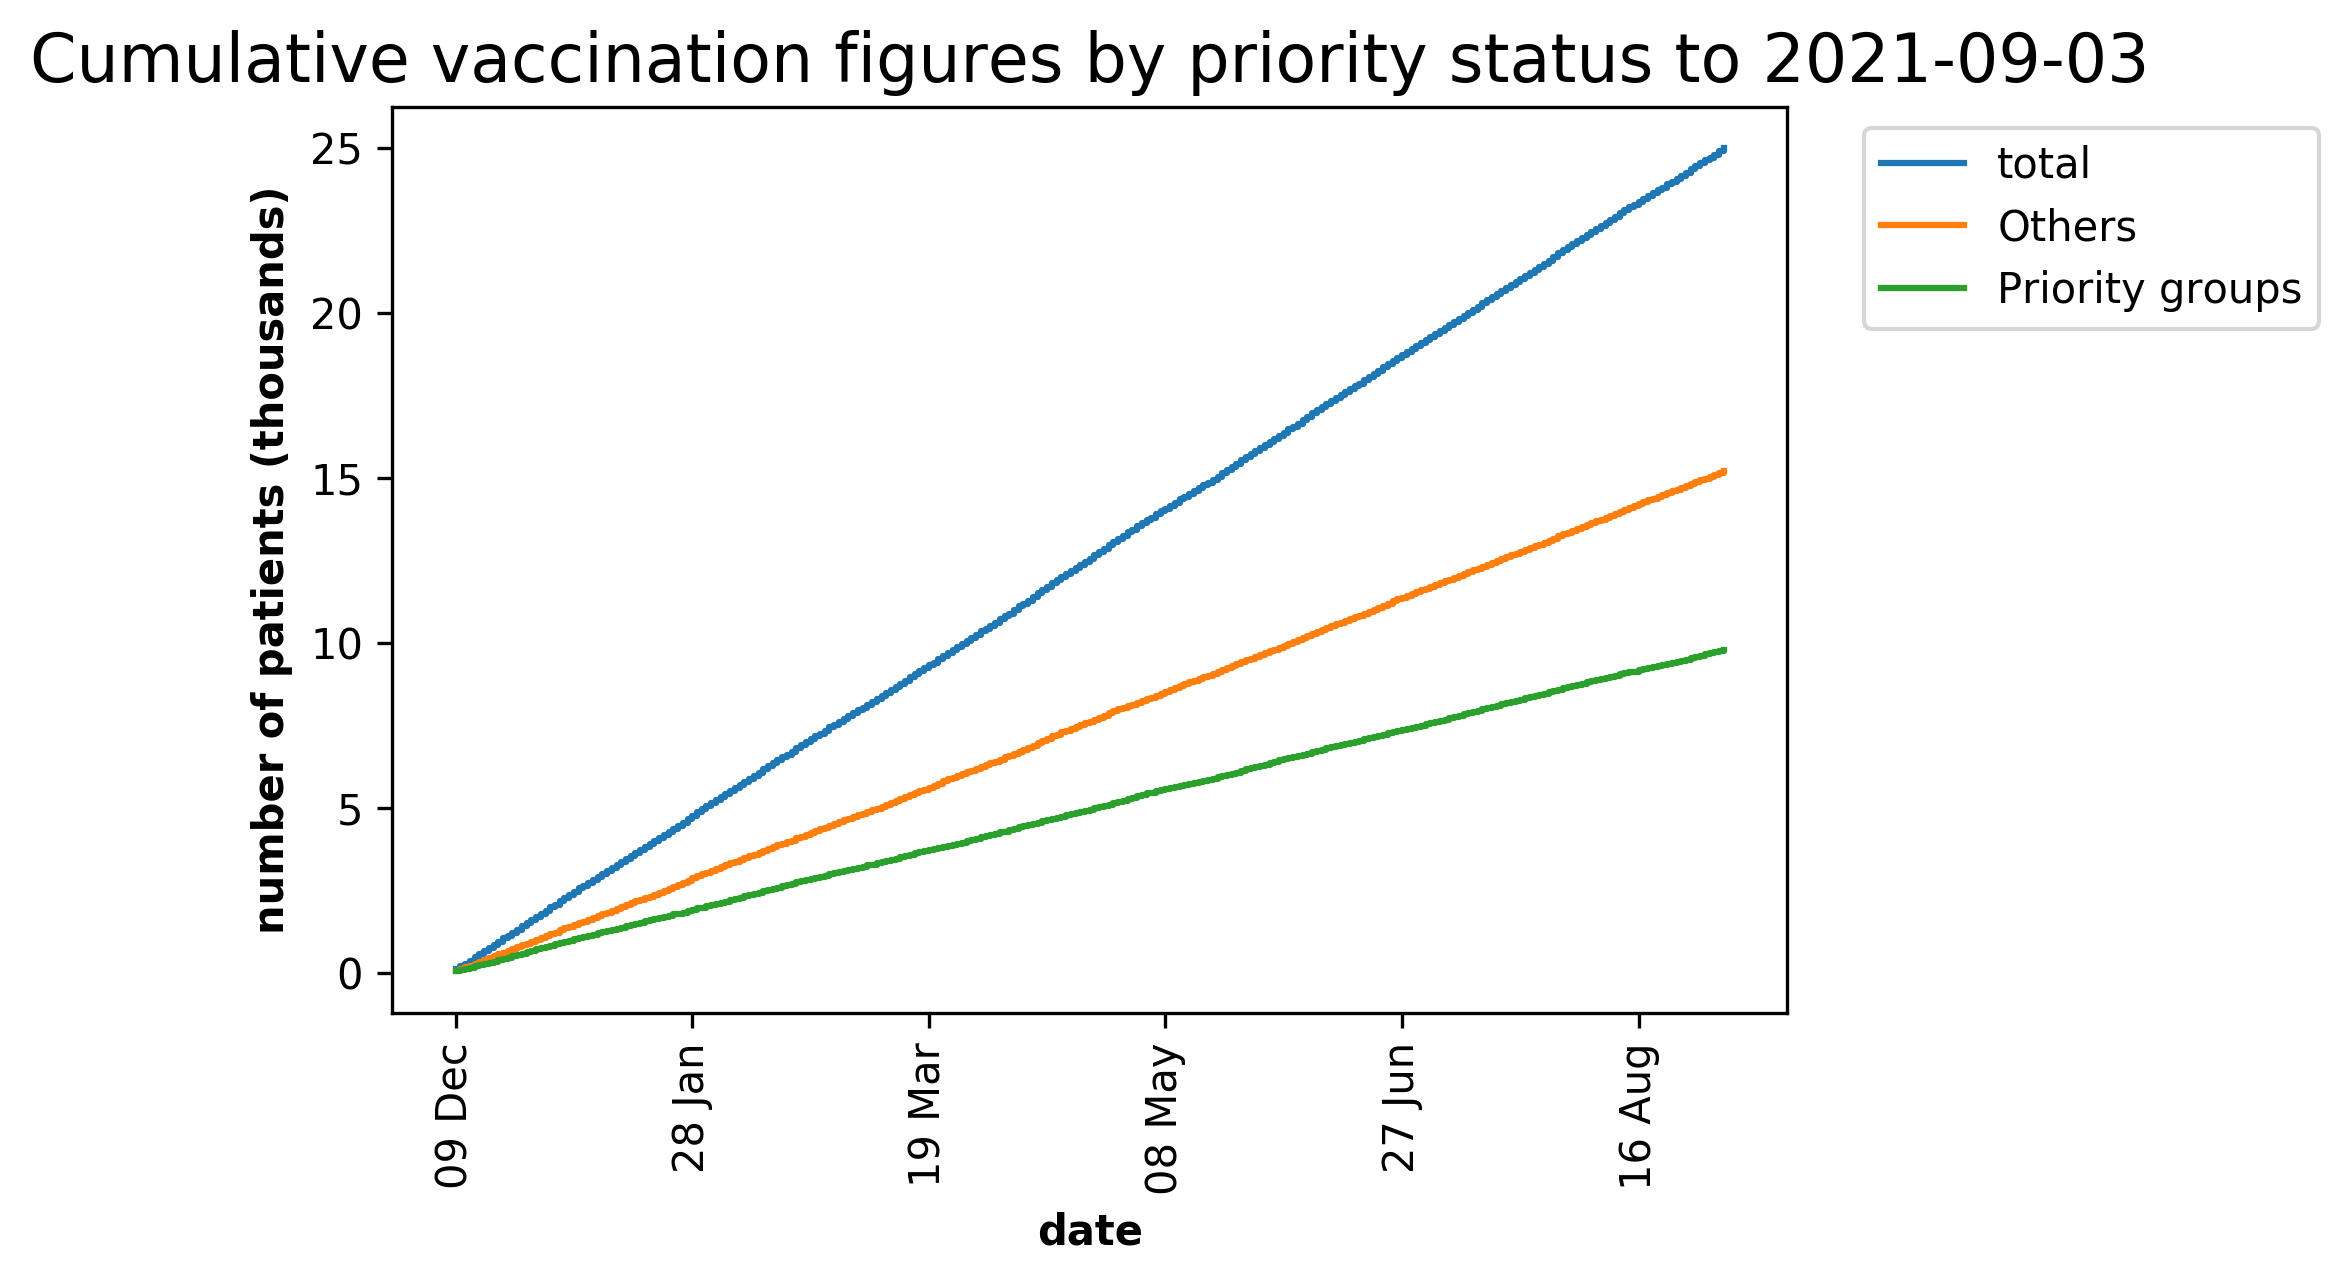

**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology.                 'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>

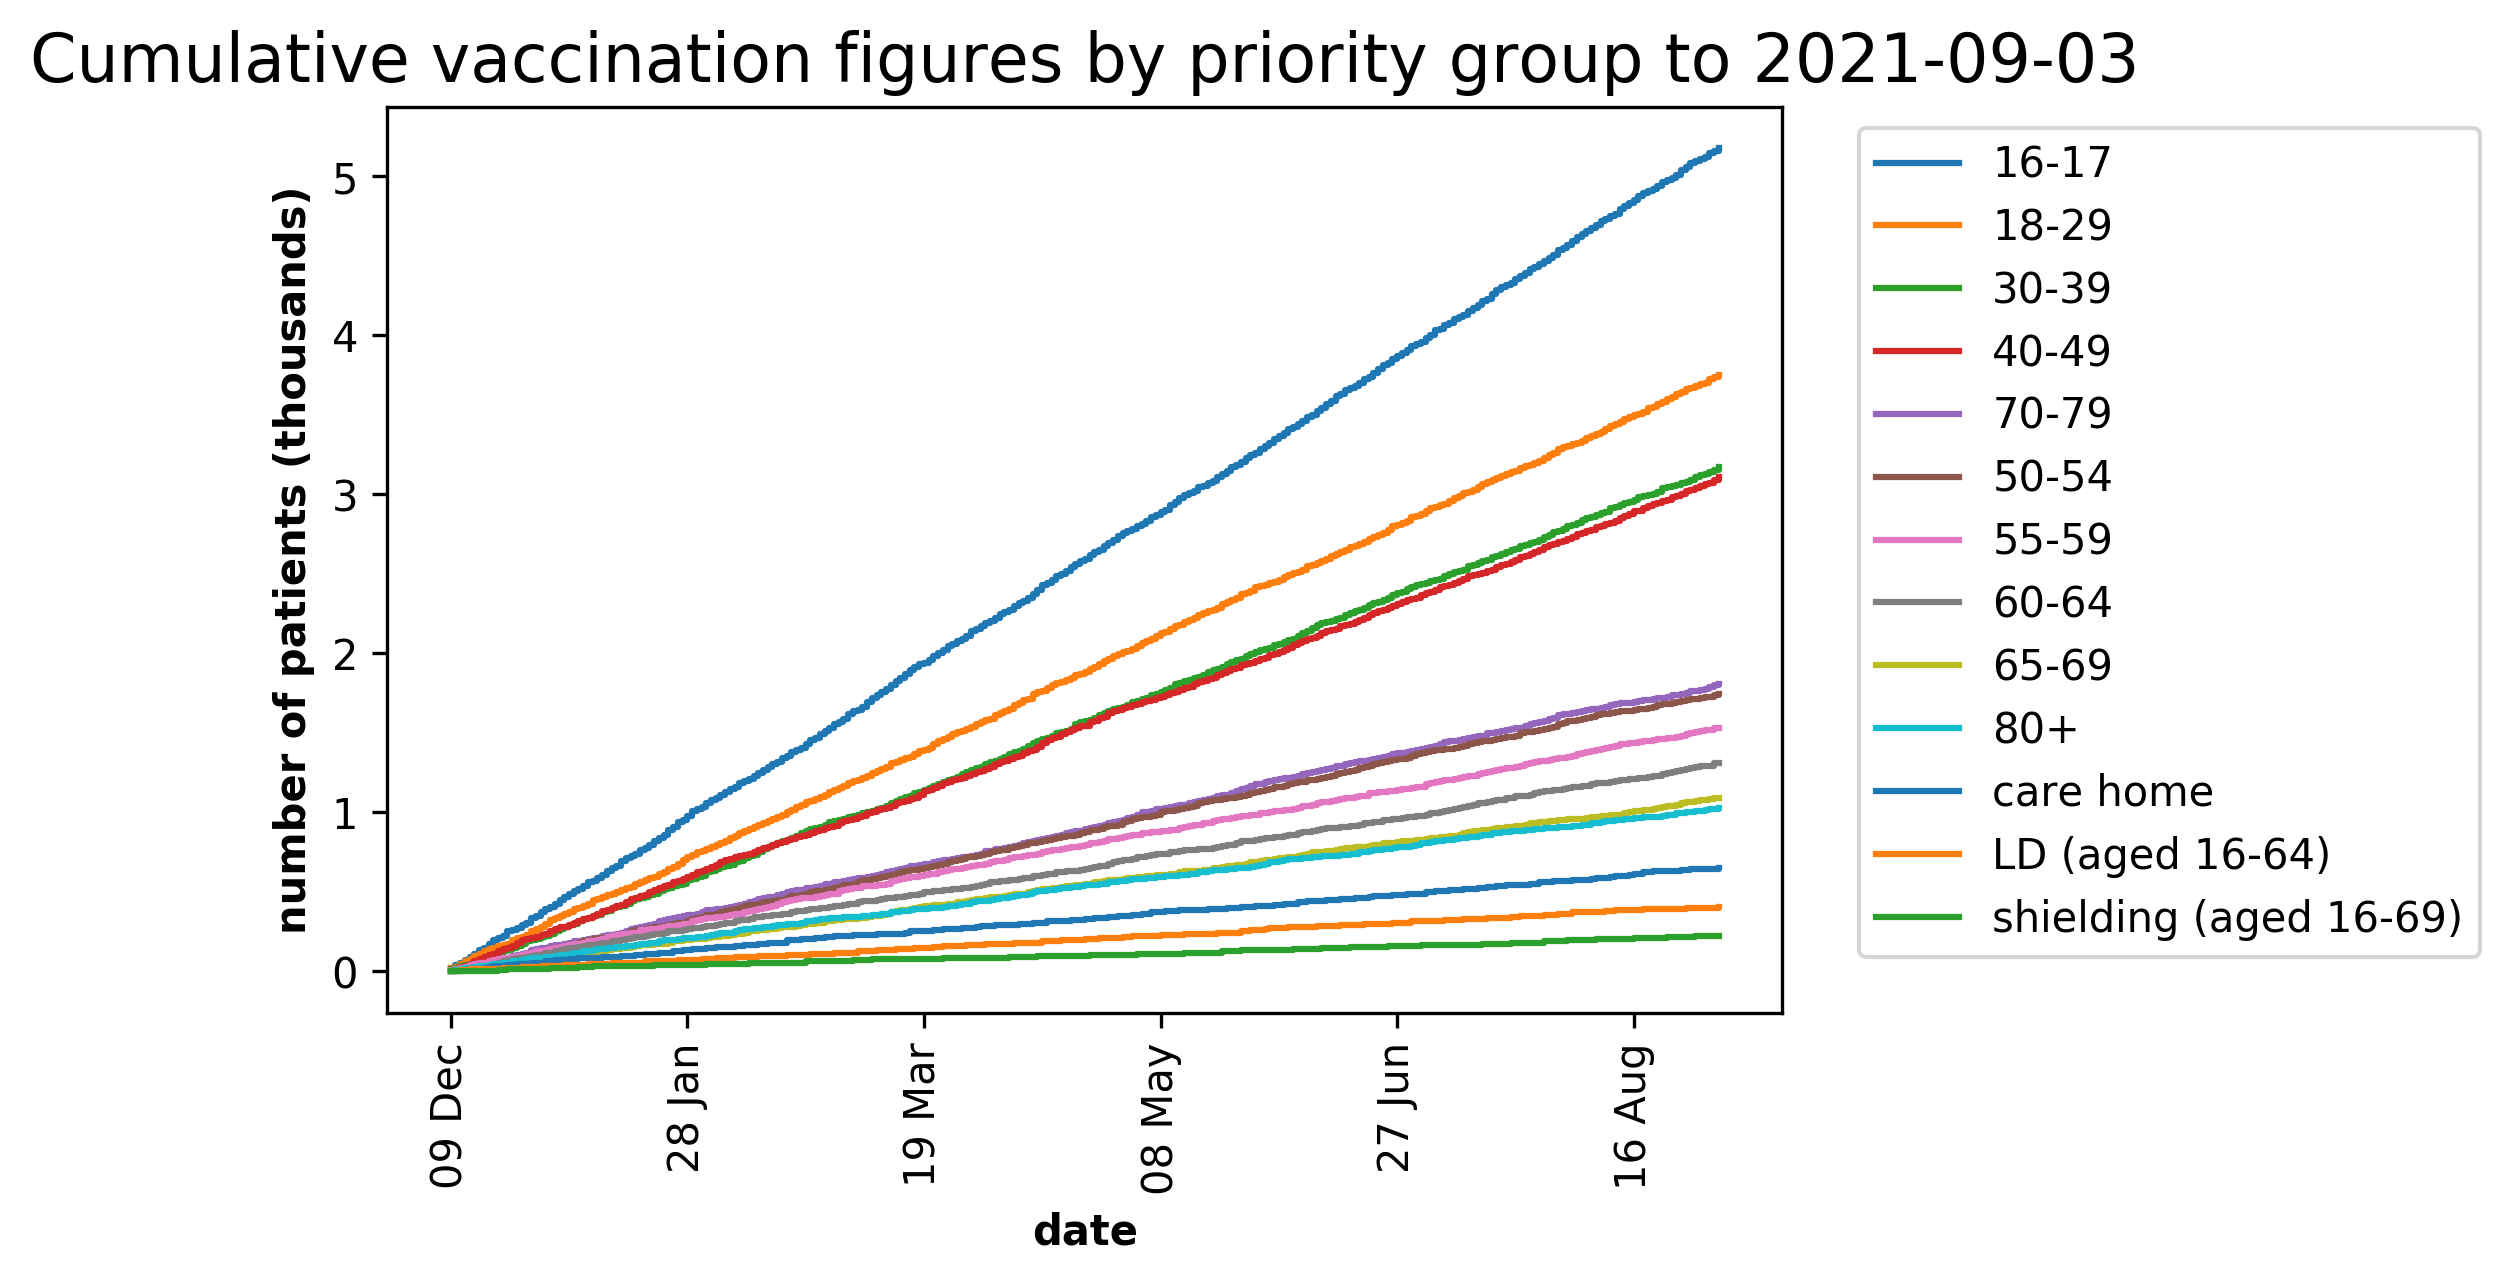

In [3]:
import sys
sys.path.append('../lib/')
from create_report import *
from image_formats import pick_image_format

IMAGE_FORMAT = pick_image_format()

show_chart(f"Cumulative vaccination figures by priority status.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")
display(Markdown("**Note:** 'Priority groups' only includes those identified as being in a priority group by our methodology. \
                'Others' includes everyone aged 18-49 except those who are shielding or have a learning disability.<br><br>"))
show_chart(f"Cumulative vaccination figures by priority group.{IMAGE_FORMAT.extension}", IMAGE_FORMAT, title="off")


# 
## Trends in vaccination rates of **80+** population according to demographic/clinical features, cumulatively by day. <a name='charts80' />
**\*_Latest overall cohort rate_ calculated as at latest date for vaccinations recorded across all TPP practices.**

## 80+ population

### COVID vaccinations among 80+ population
 ### by Sex

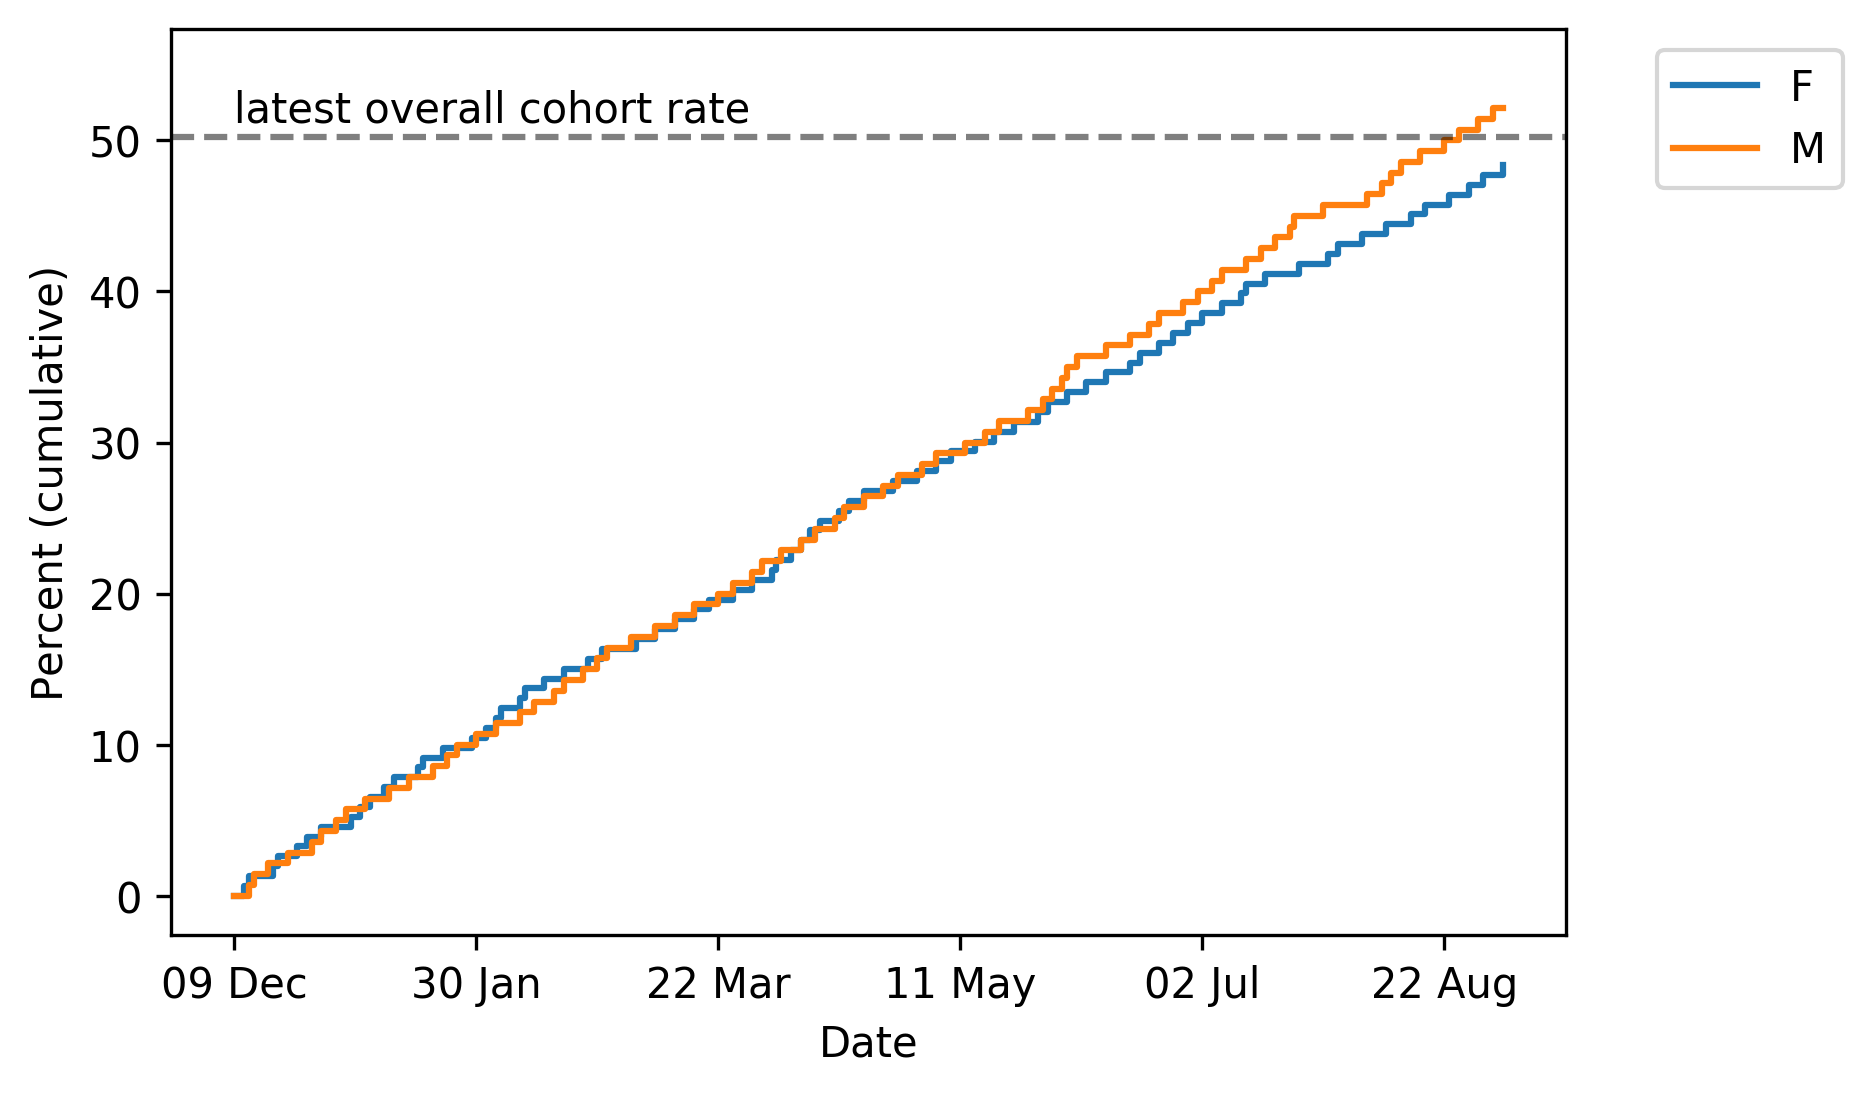

### COVID vaccinations among 80+ population
 ### by Ethnicity (broad categories)

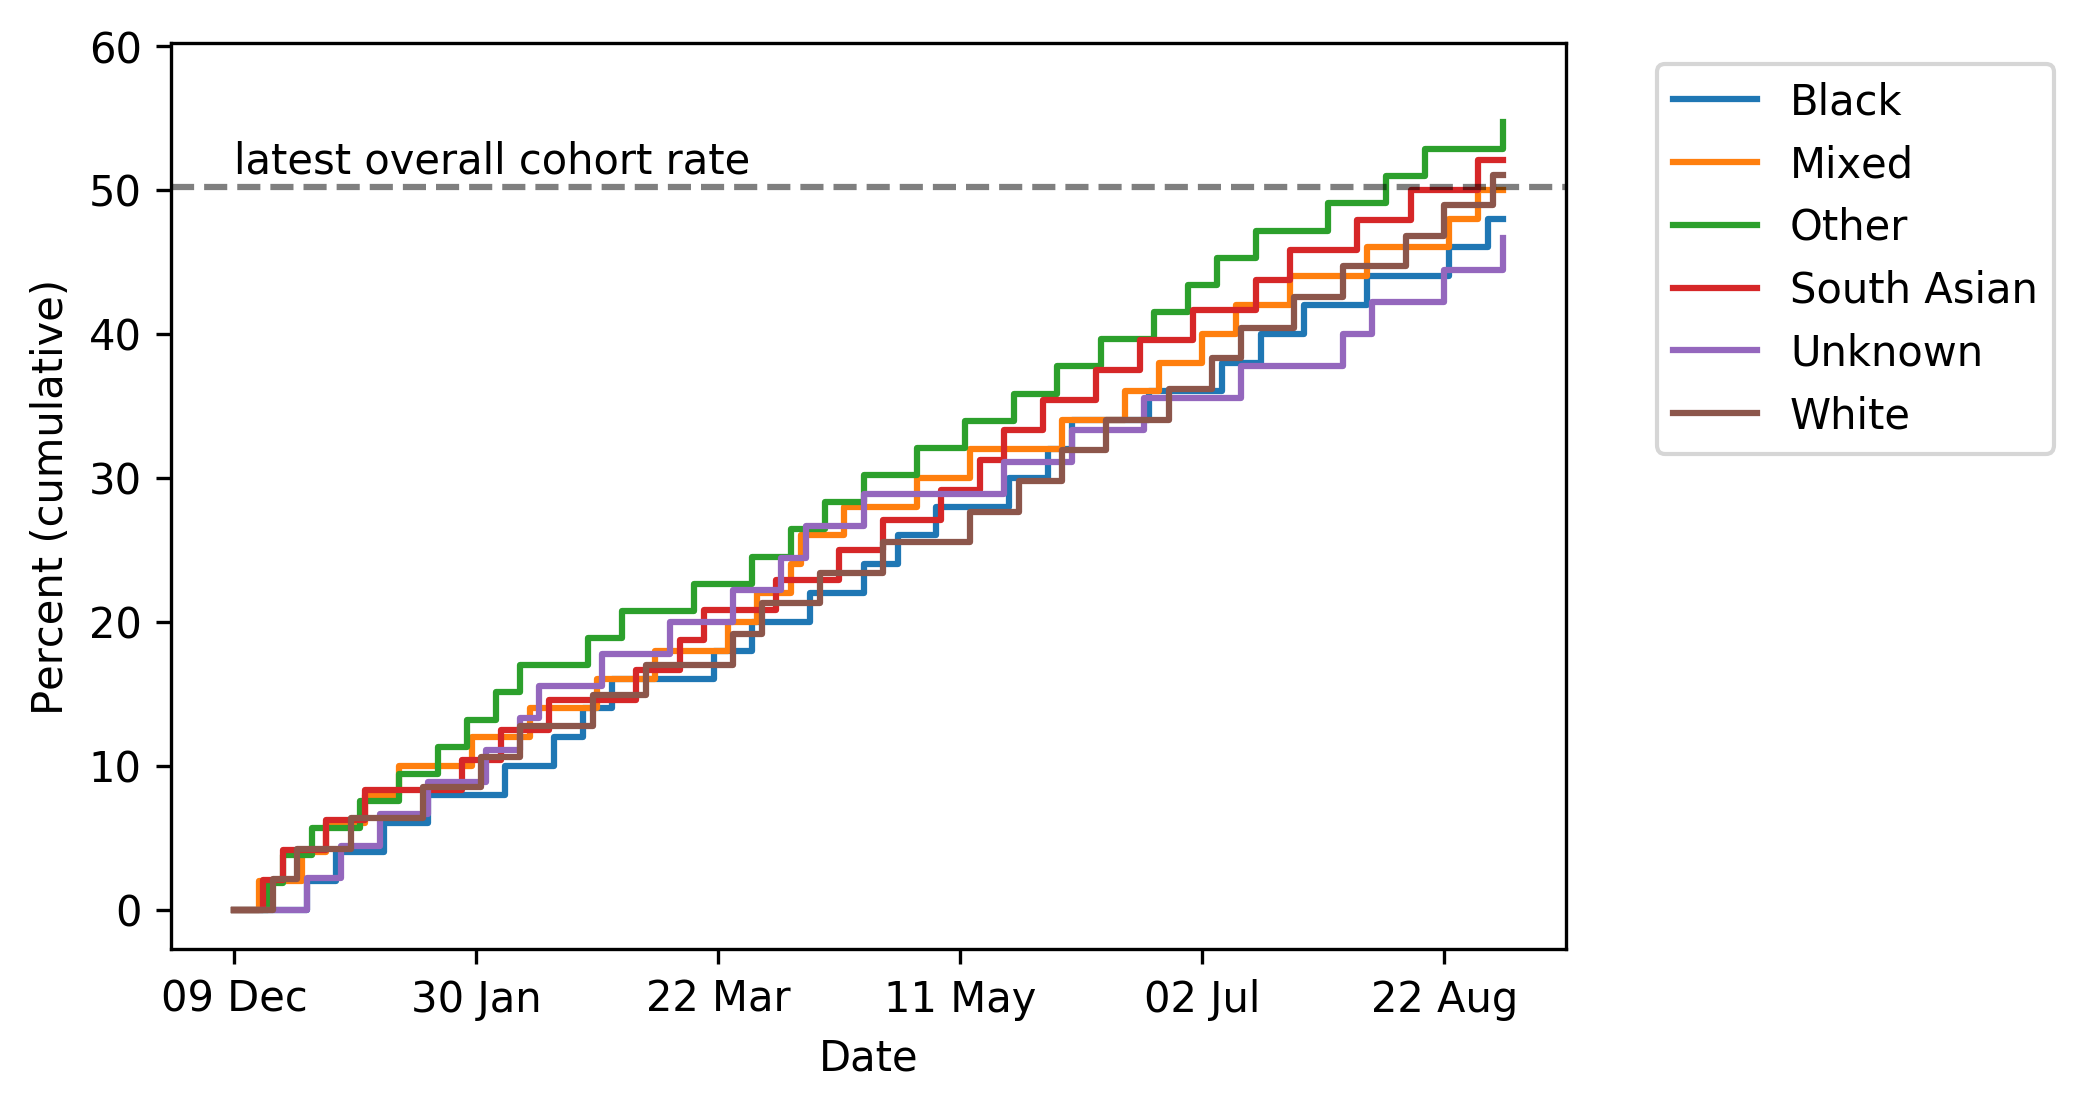

### COVID vaccinations among 80+ population
 ### by Index of Multiple Deprivation (quintiles)

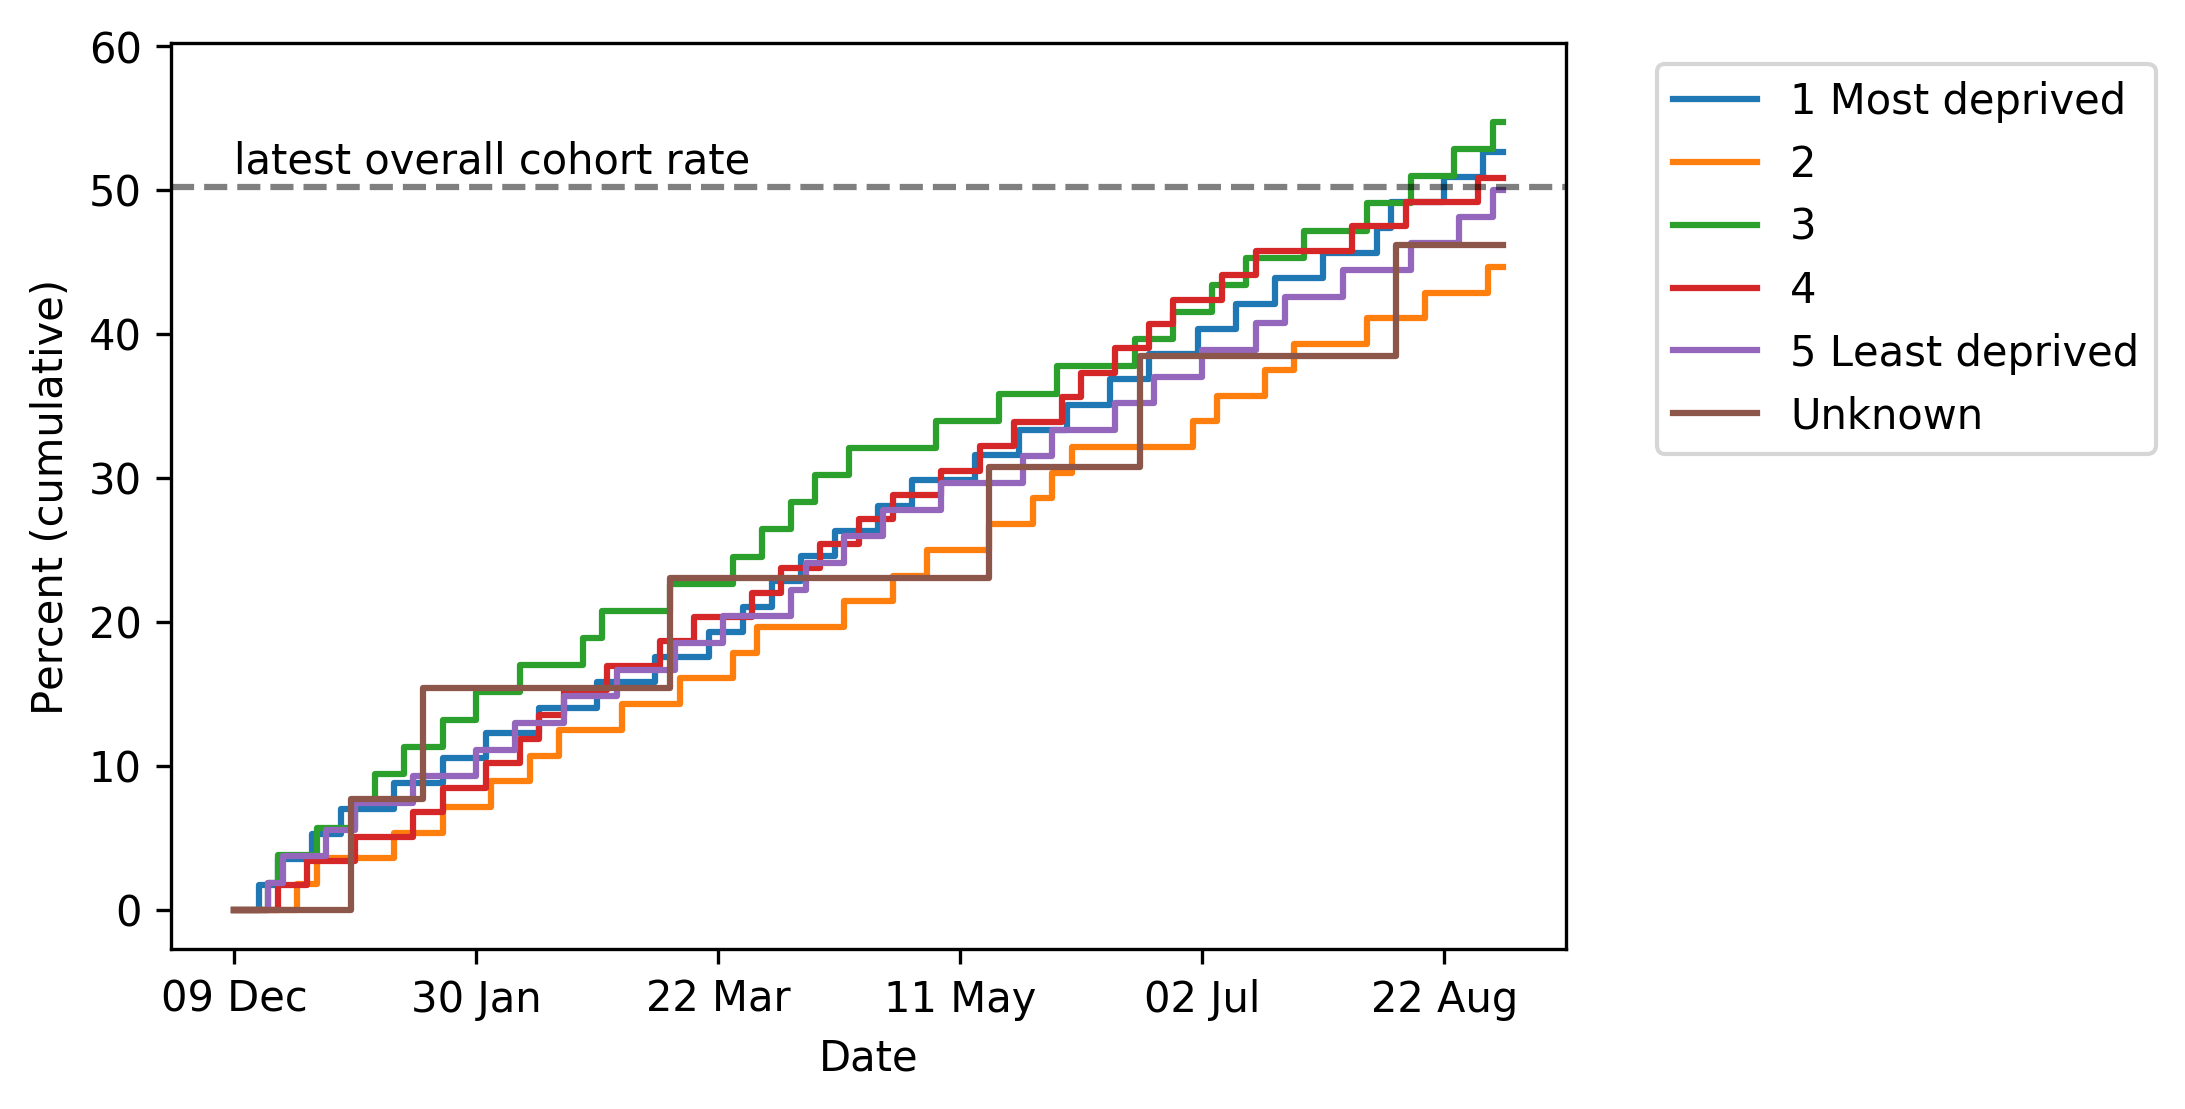

### COVID vaccinations among 80+ population
 ### by BMI

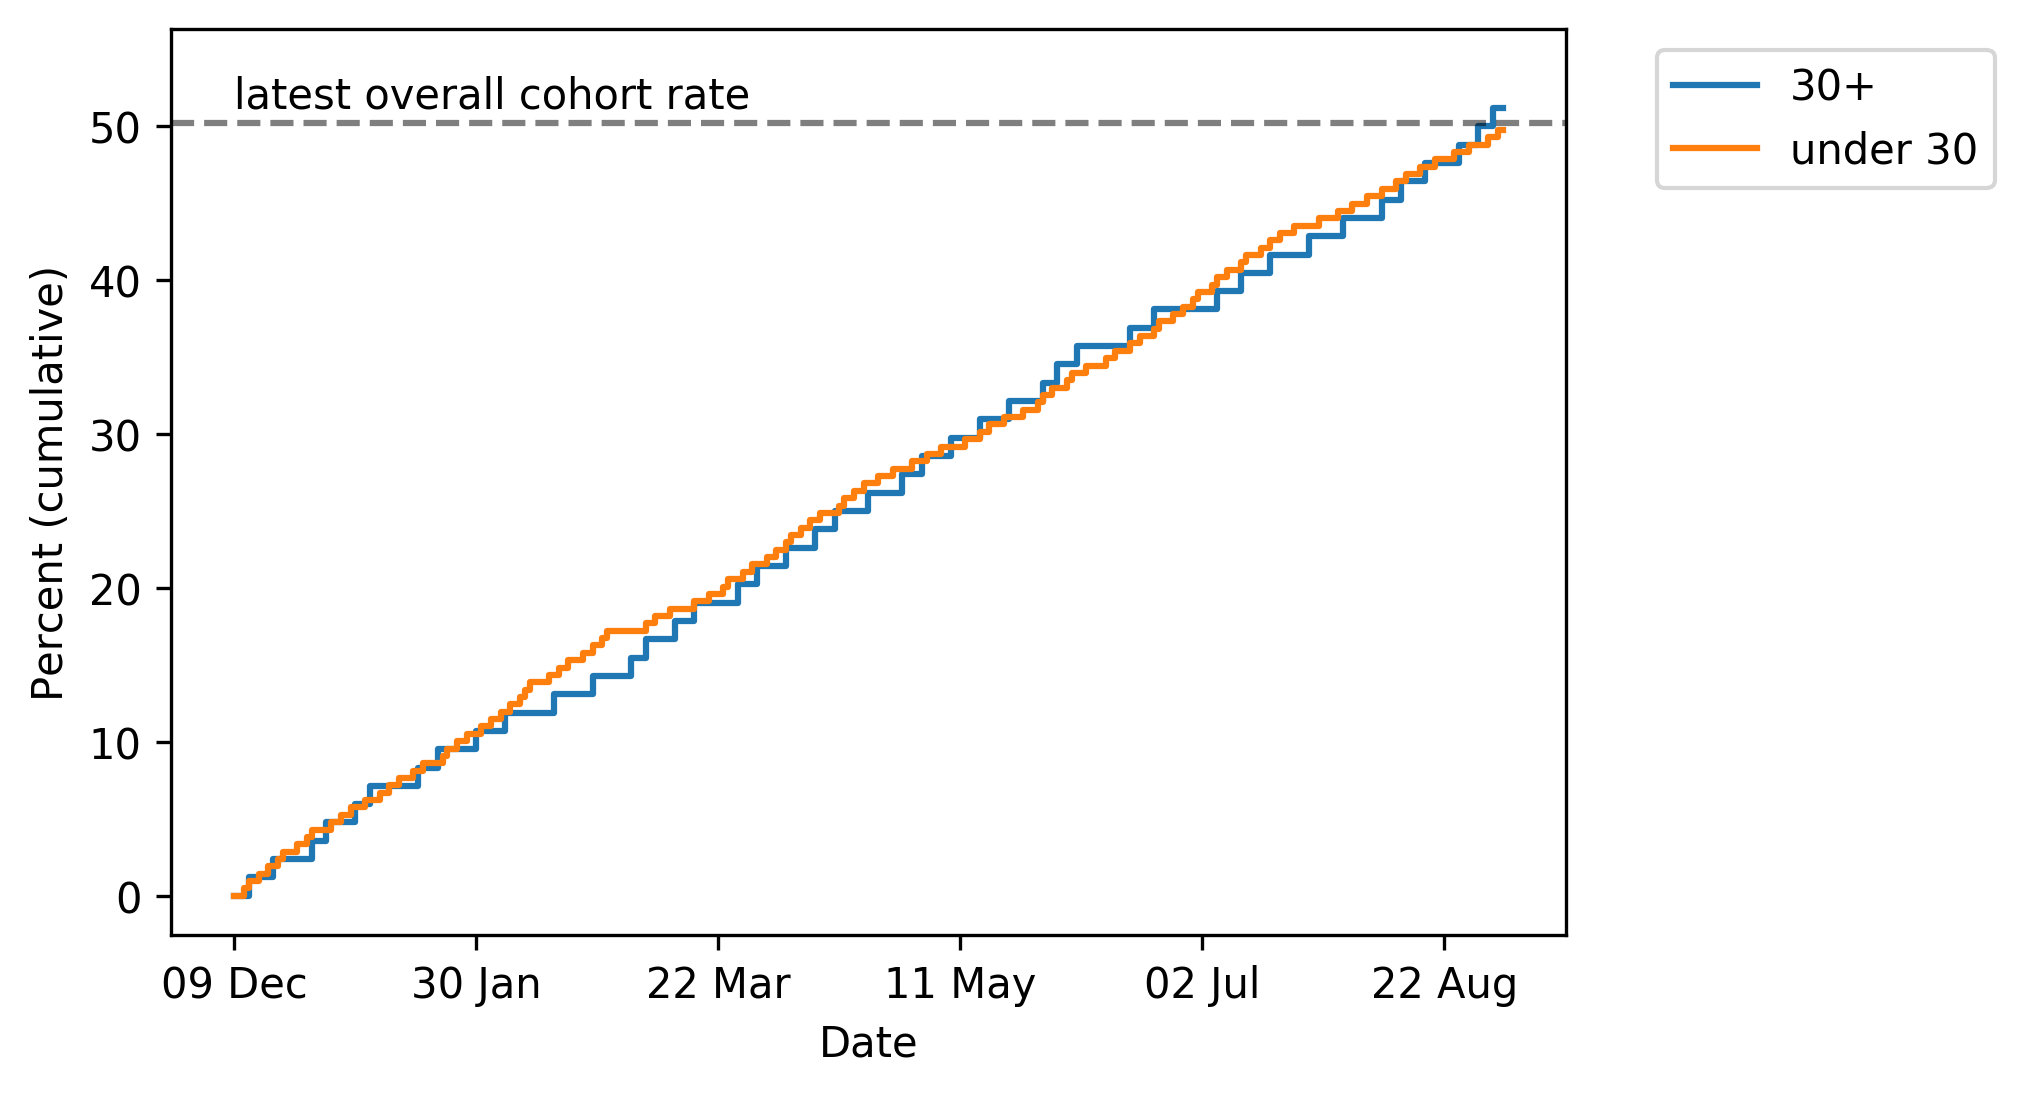

### COVID vaccinations among 80+ population
 ### by Dialysis

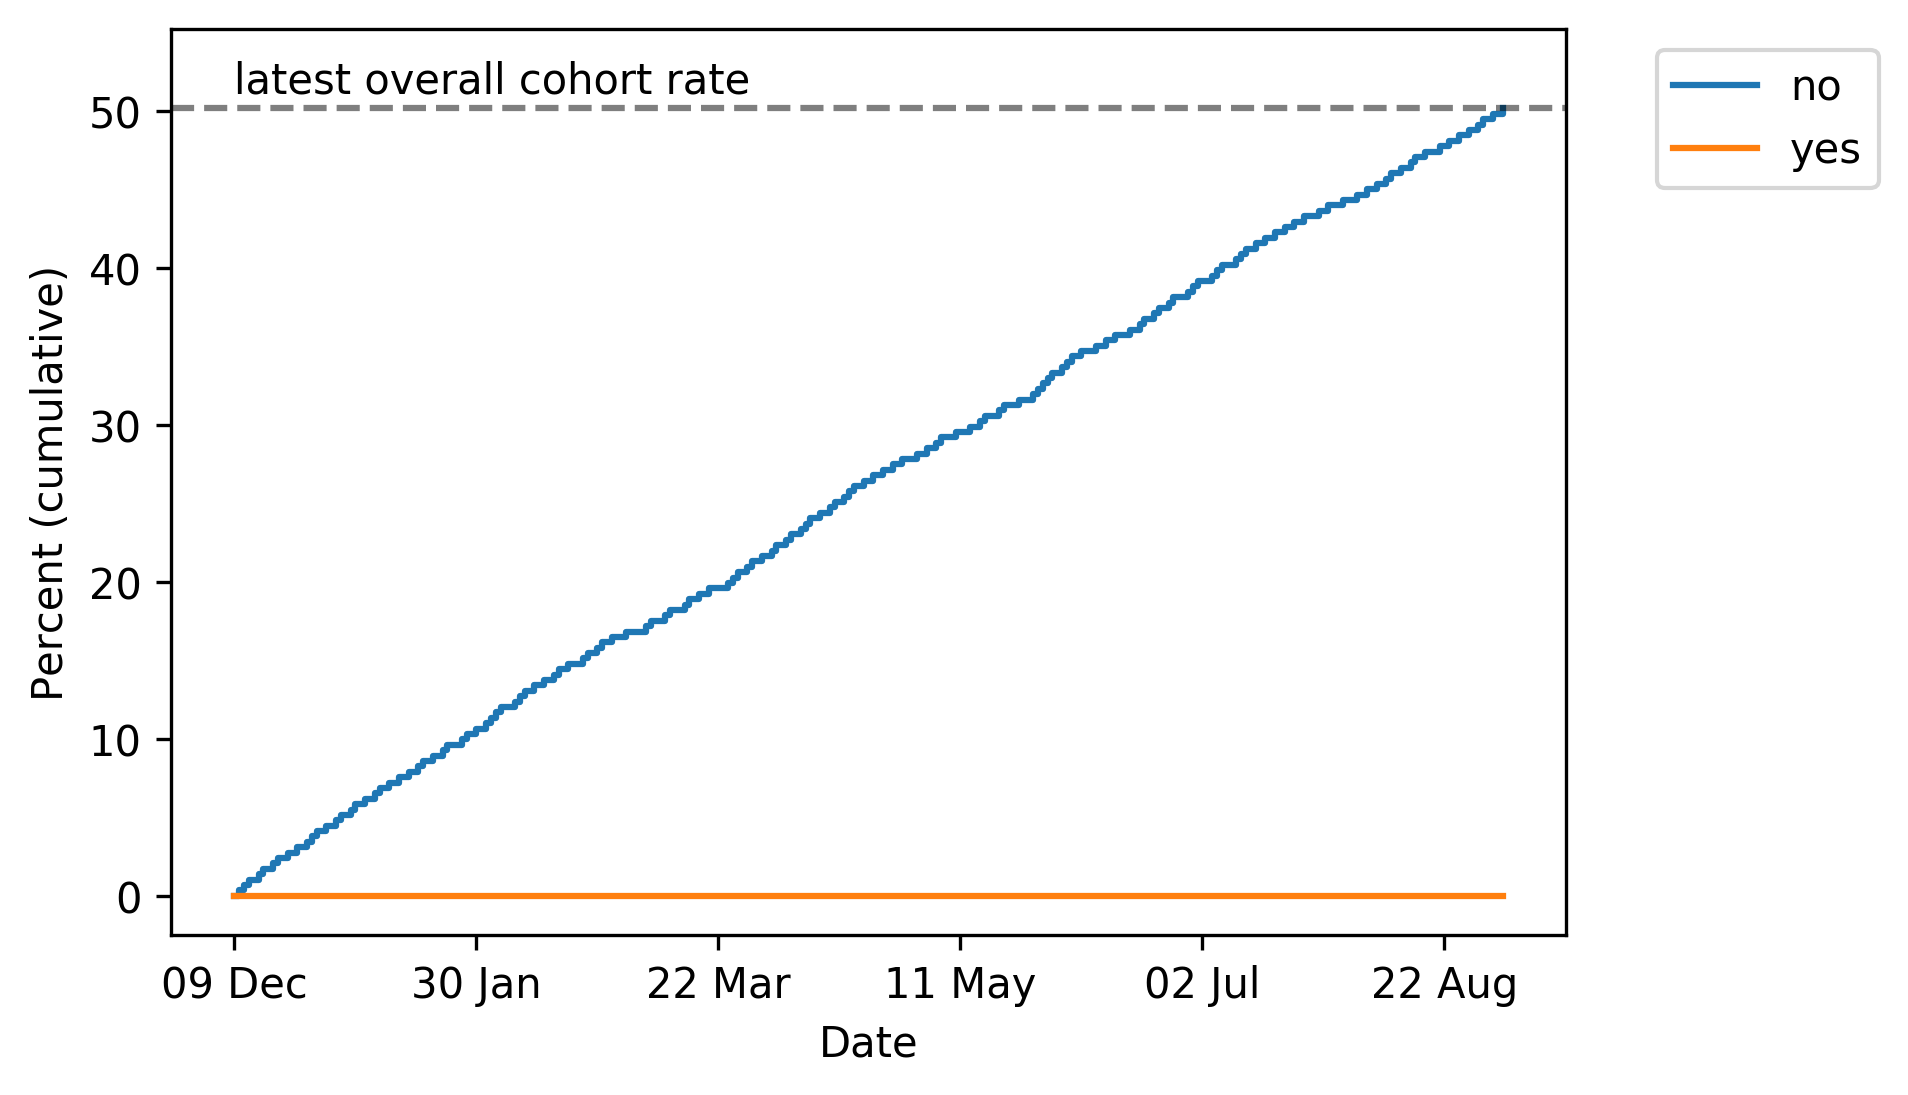

### COVID vaccinations among 80+ population
 ### by Dementia

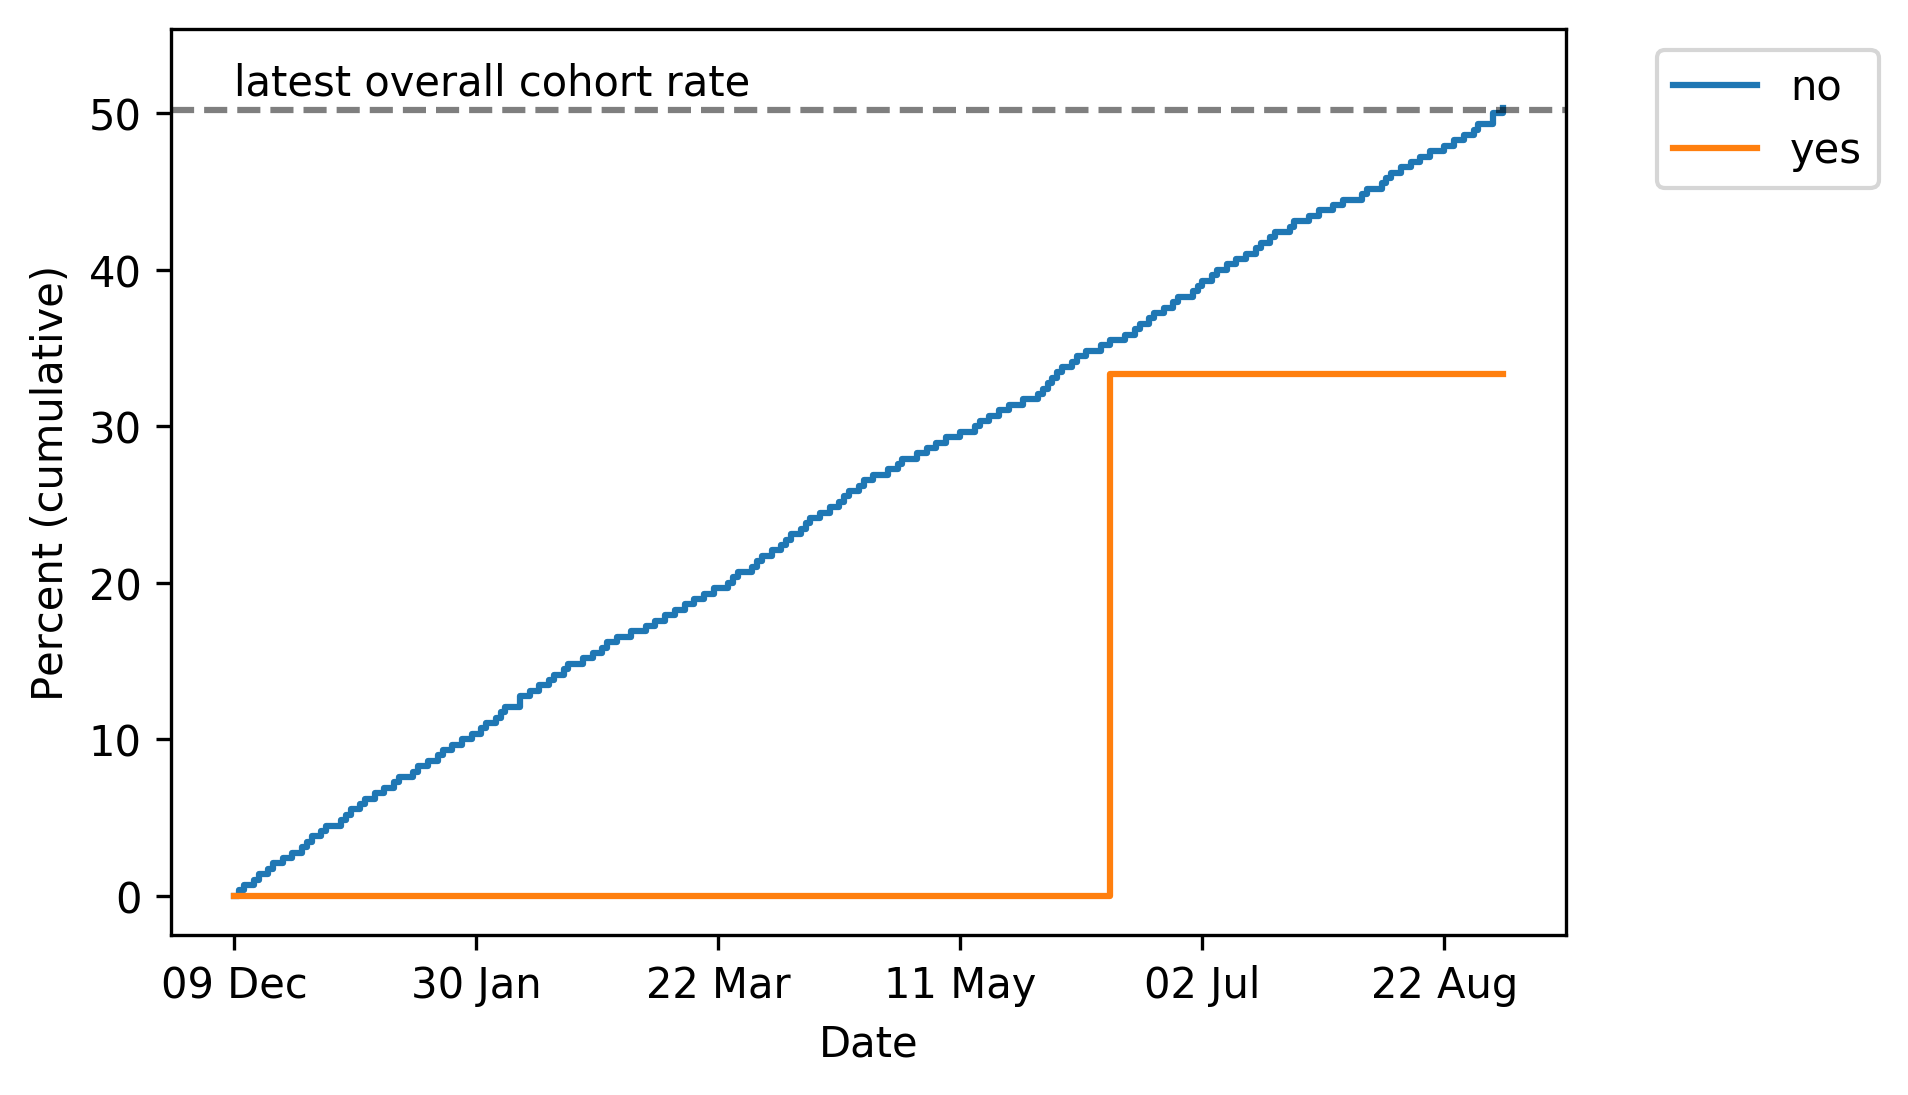

### COVID vaccinations among 80+ population
 ### by Learning disability

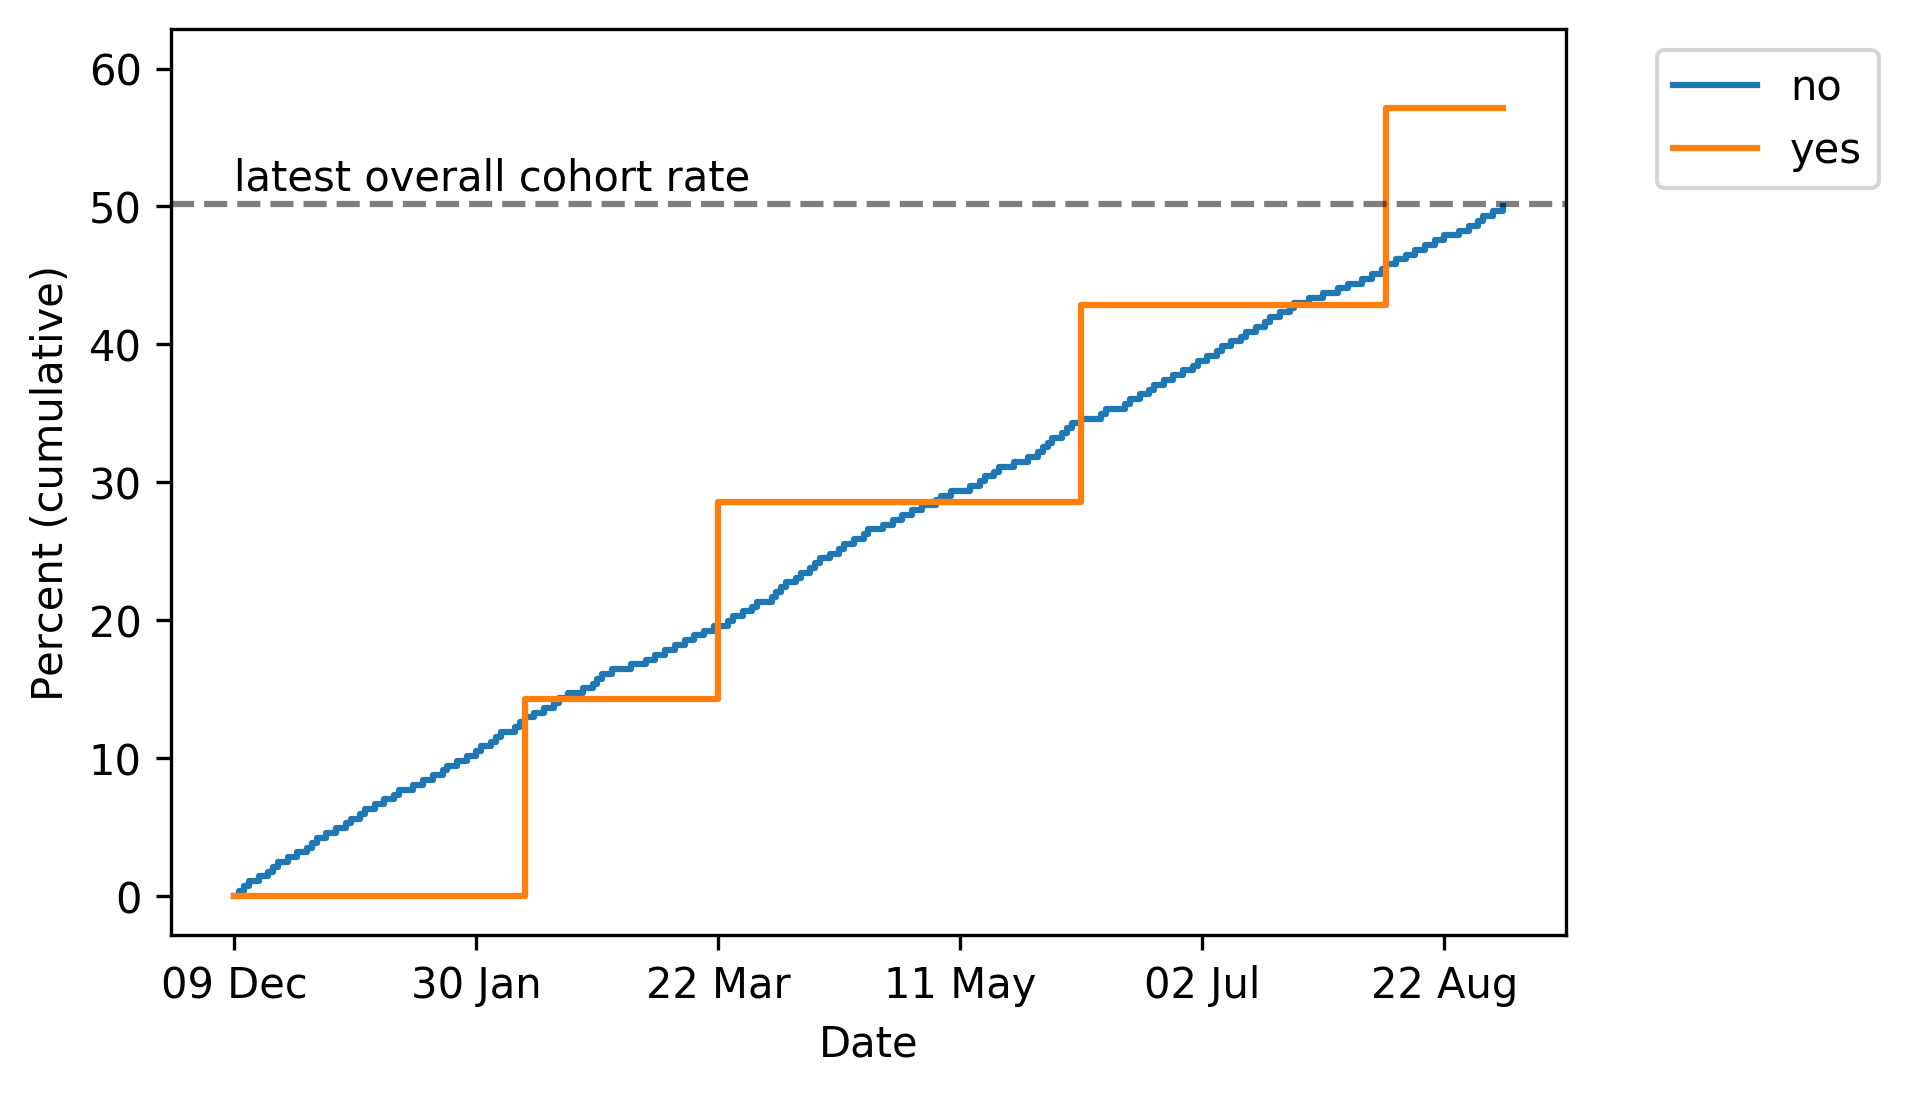

### COVID vaccinations among 80+ population
 ### by Psychosis, schizophrenia, or bipolar

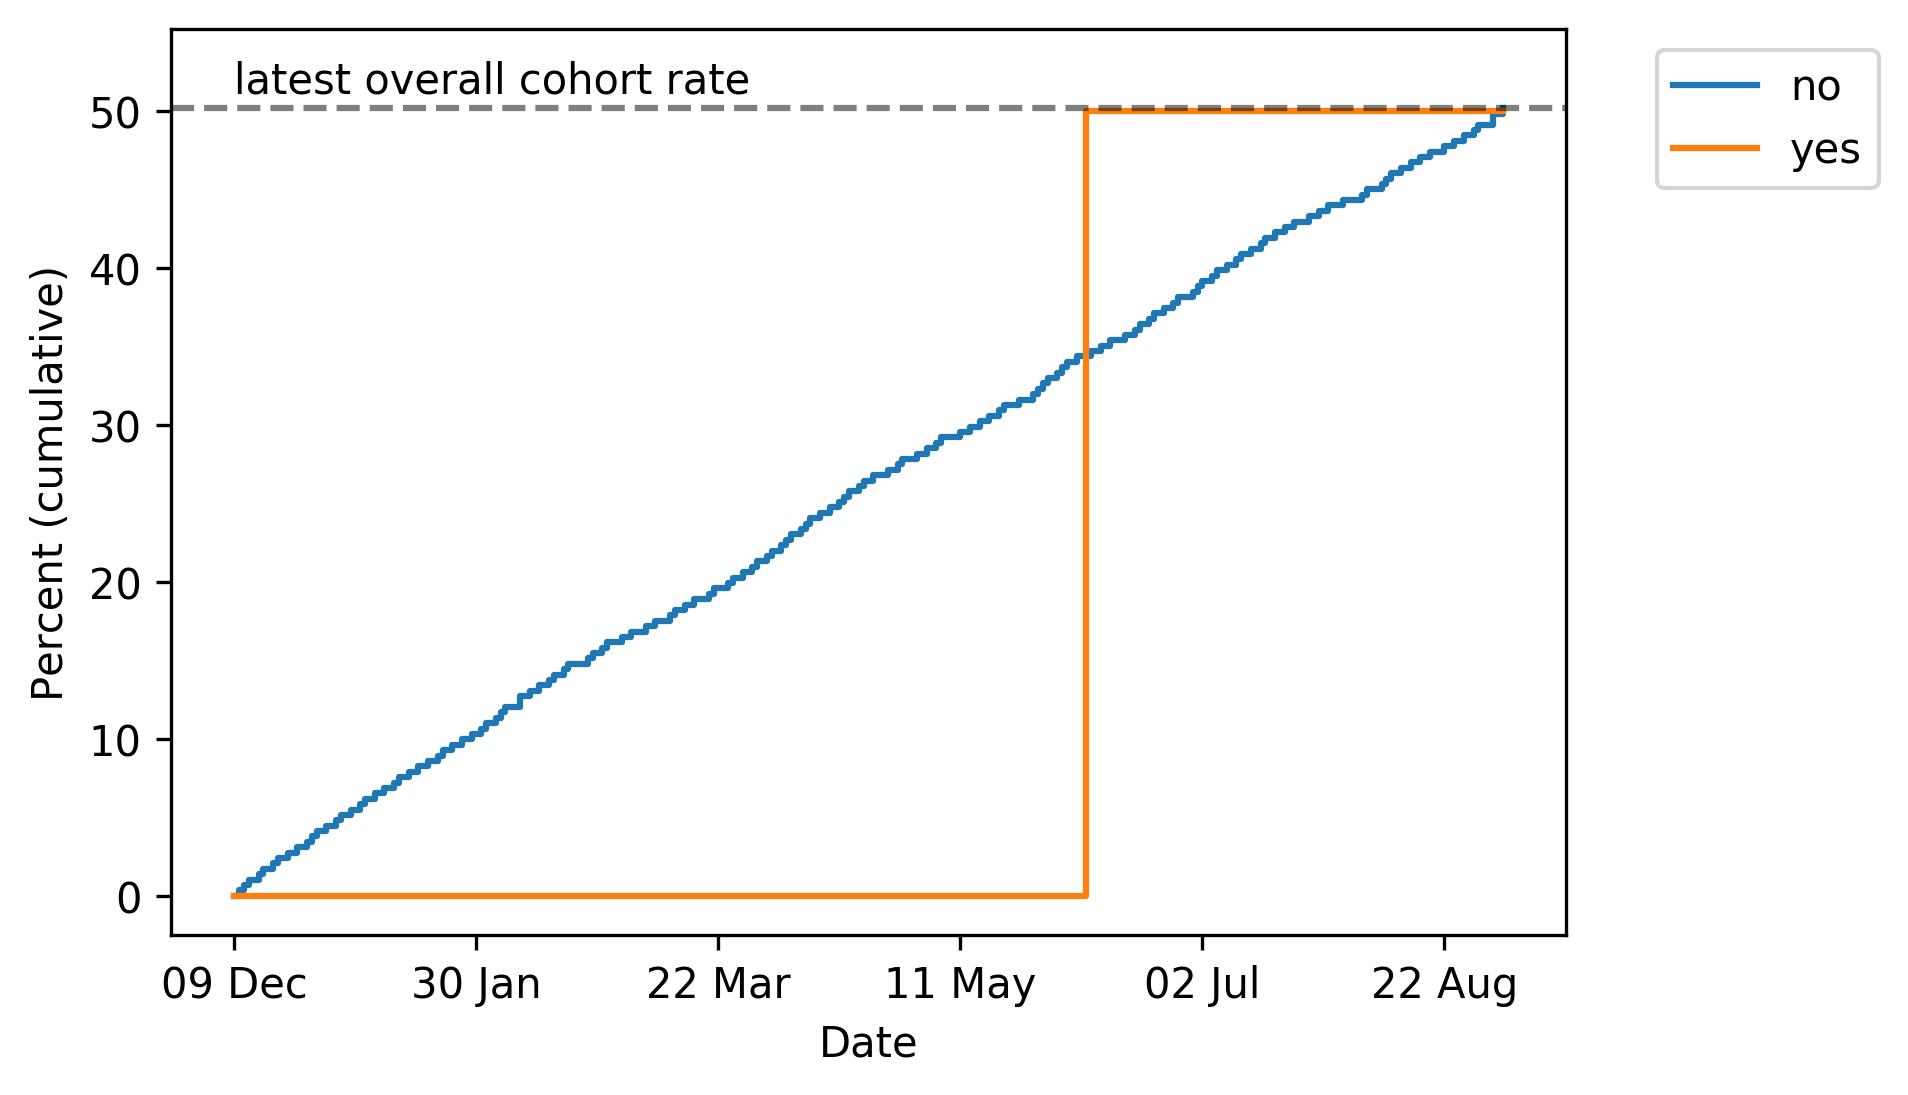

### COVID vaccinations among 80+ population
 ### by SSRI (last 12 months)

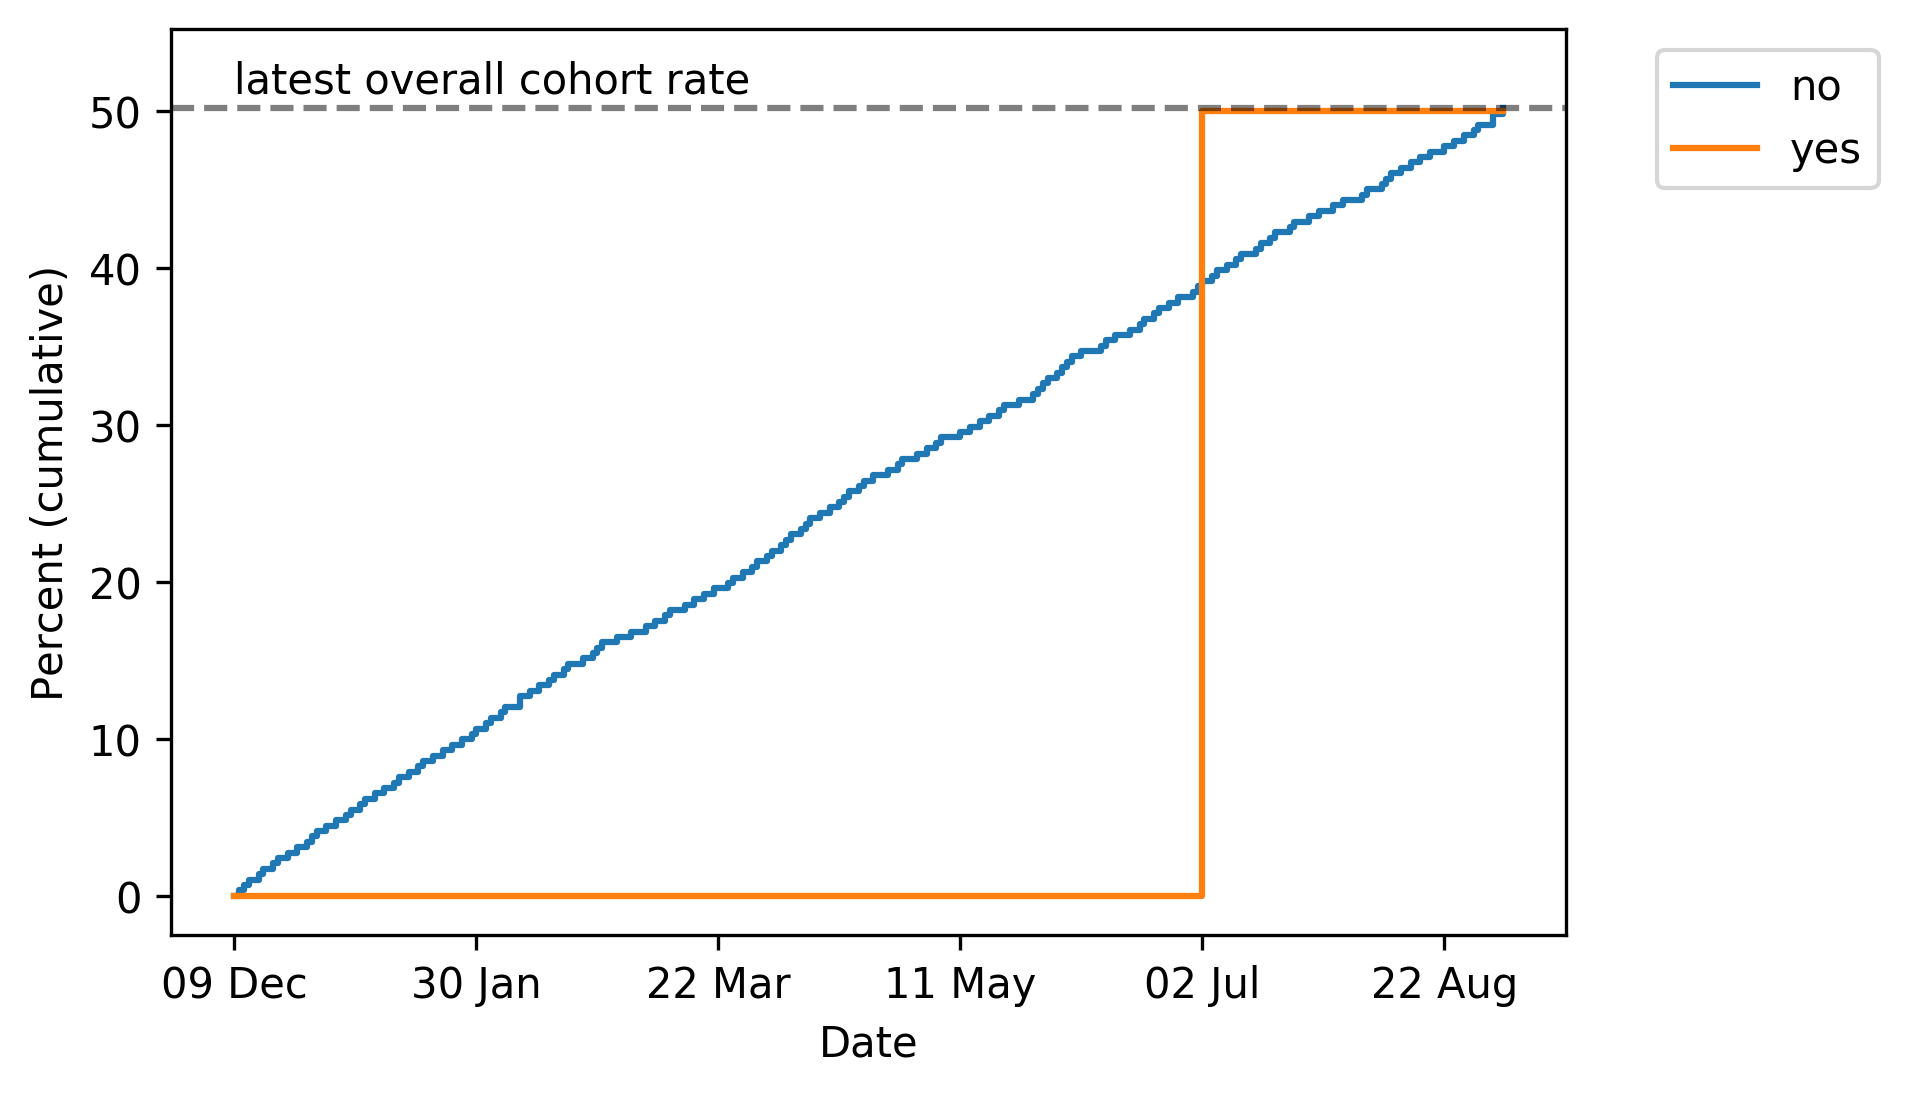

### COVID vaccinations among 80+ population
 ### by Age band

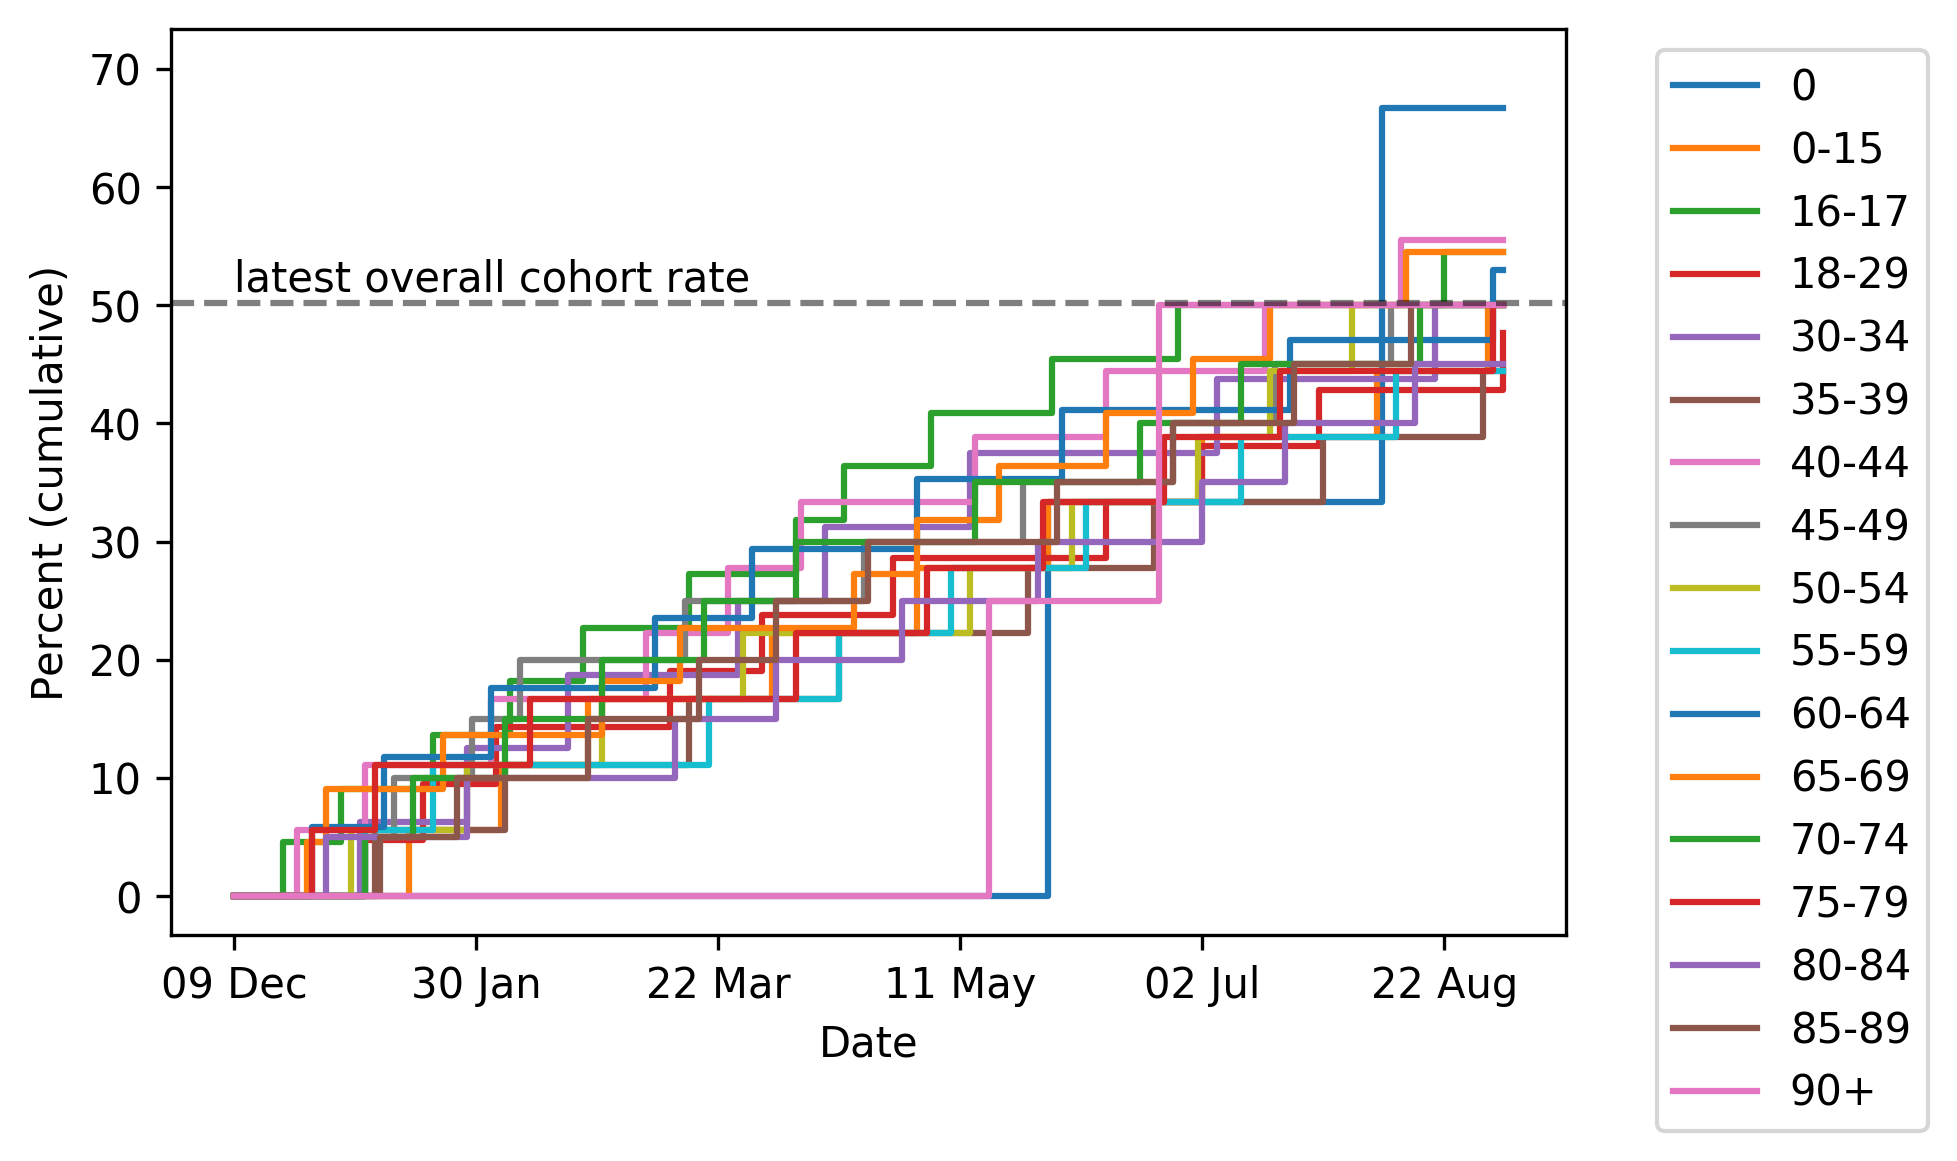

In [4]:
chartlist = find_and_sort_filenames(foldername="figures", file_extension=IMAGE_FORMAT.extension)
   
display(Markdown("## 80+ population"))
for item in chartlist:
    show_chart(item, IMAGE_FORMAT)

# 
## Trends in vaccination rates of **70-79** population according to demographic/clinical features, cumulatively by day. <a name='charts70' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**
    

## 70-79 population

### COVID vaccinations among 70-79 population
 ### by Sex

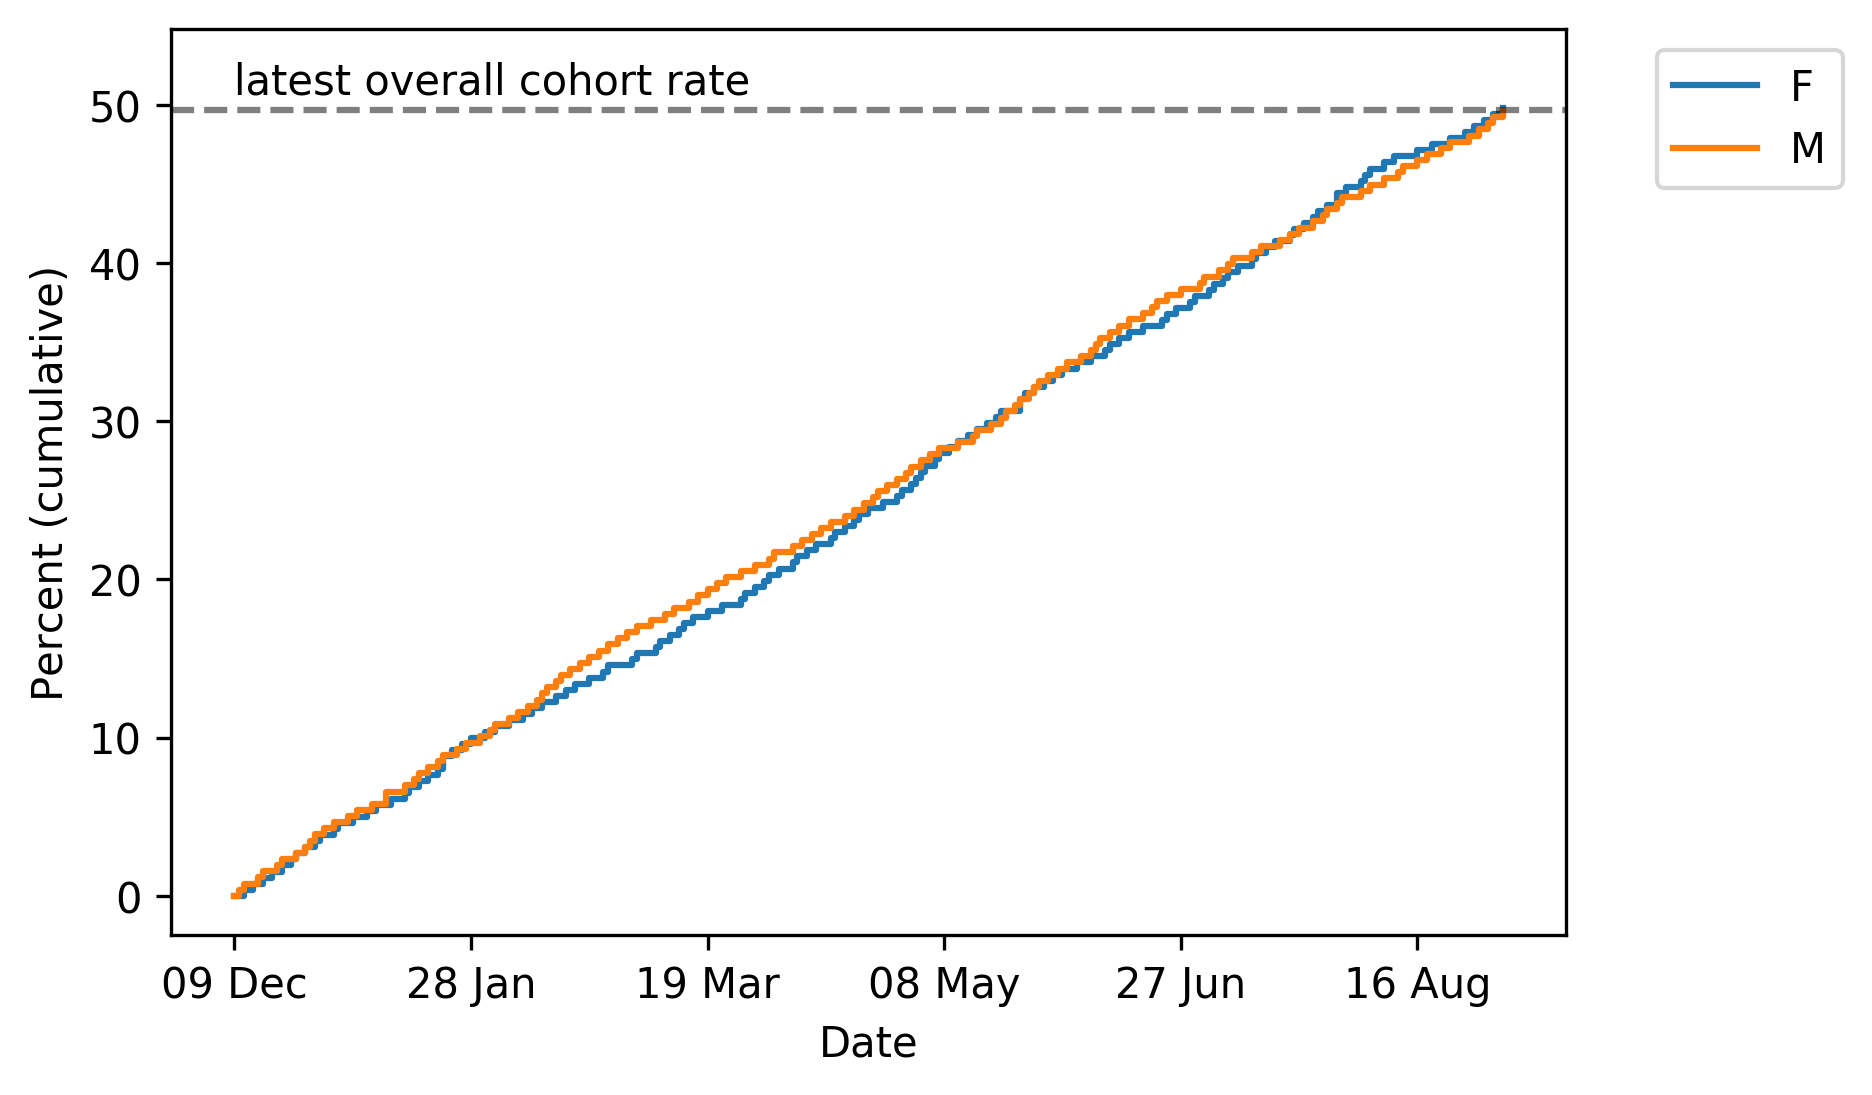

### COVID vaccinations among 70-79 population
 ### by Ethnicity (broad categories)

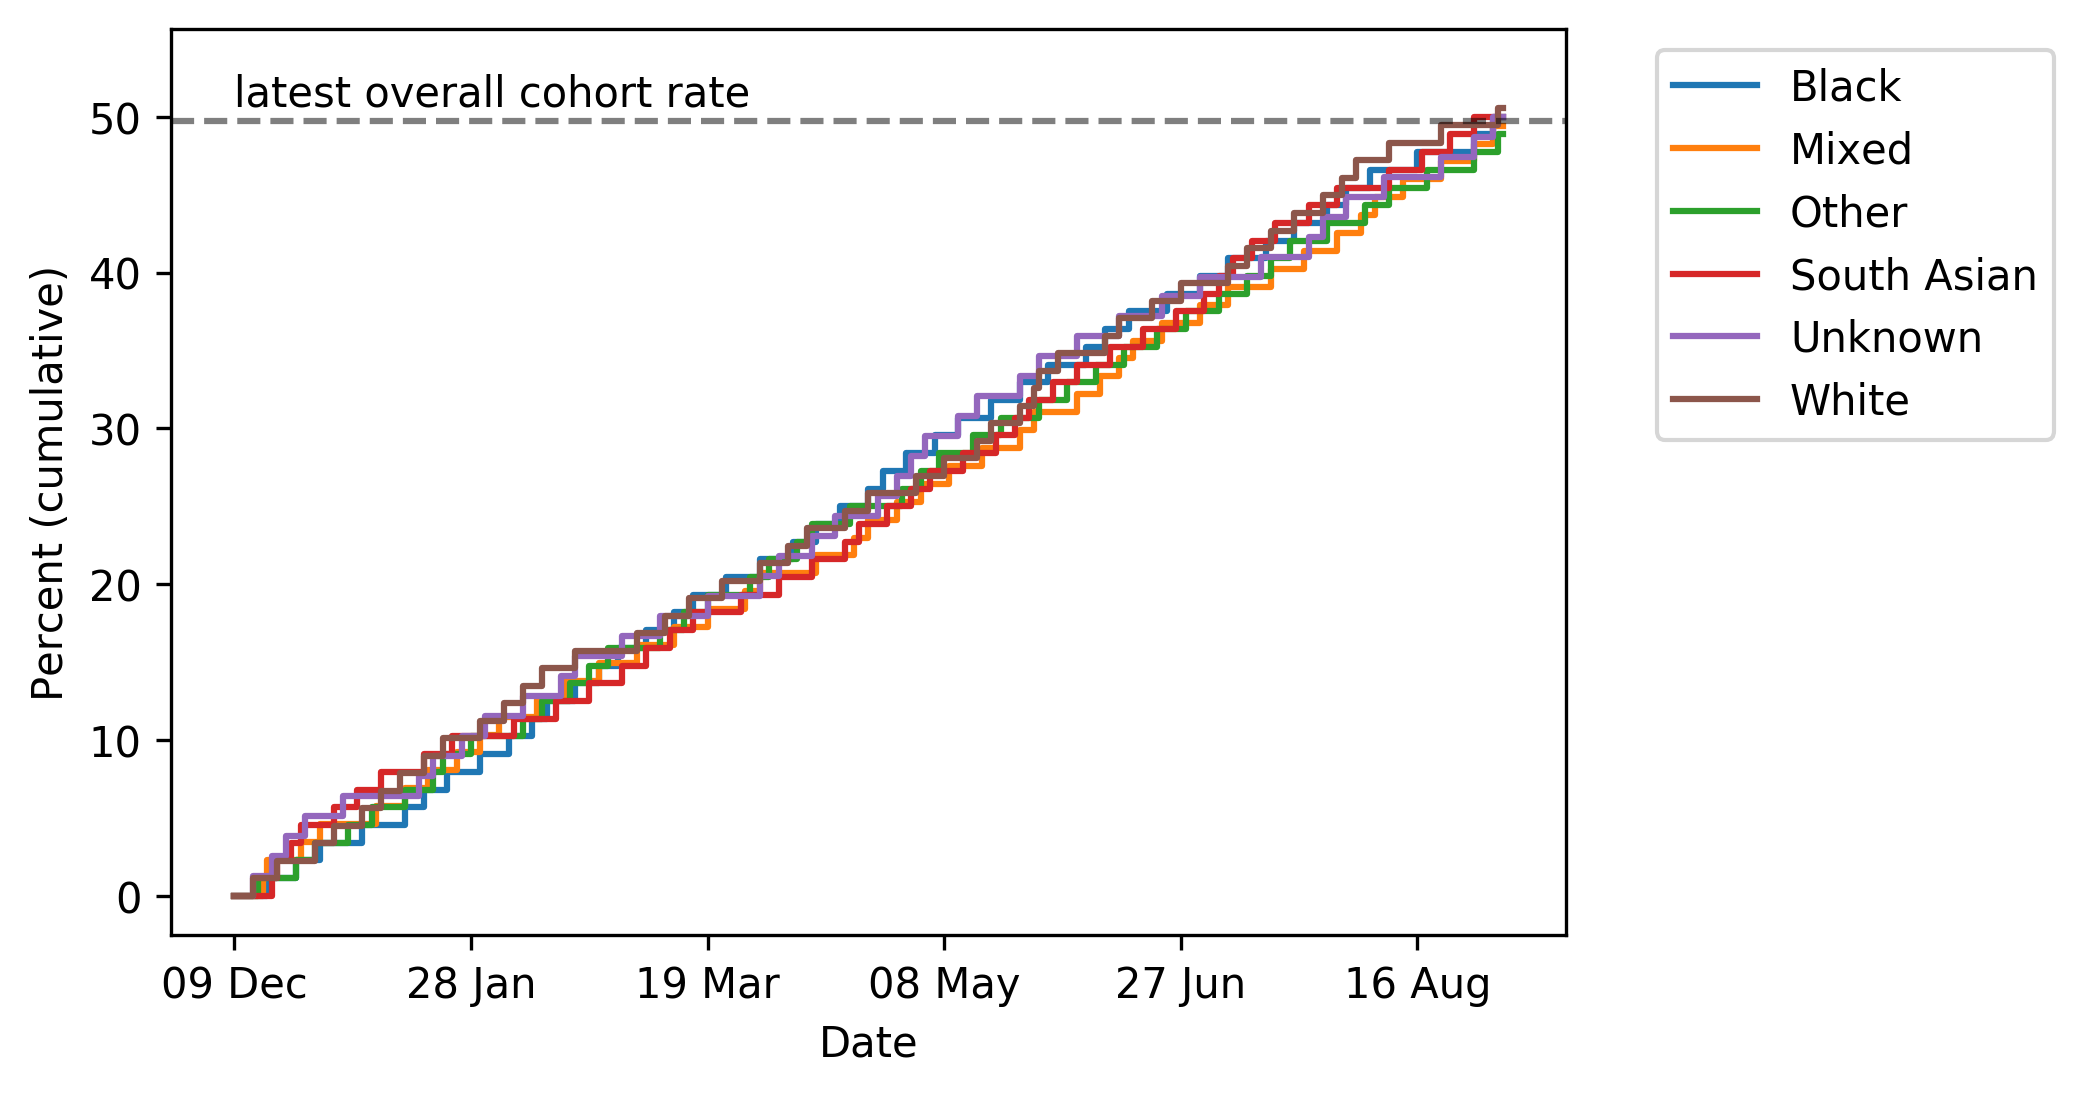

### COVID vaccinations among 70-79 population
 ### by Index of Multiple Deprivation (quintiles)

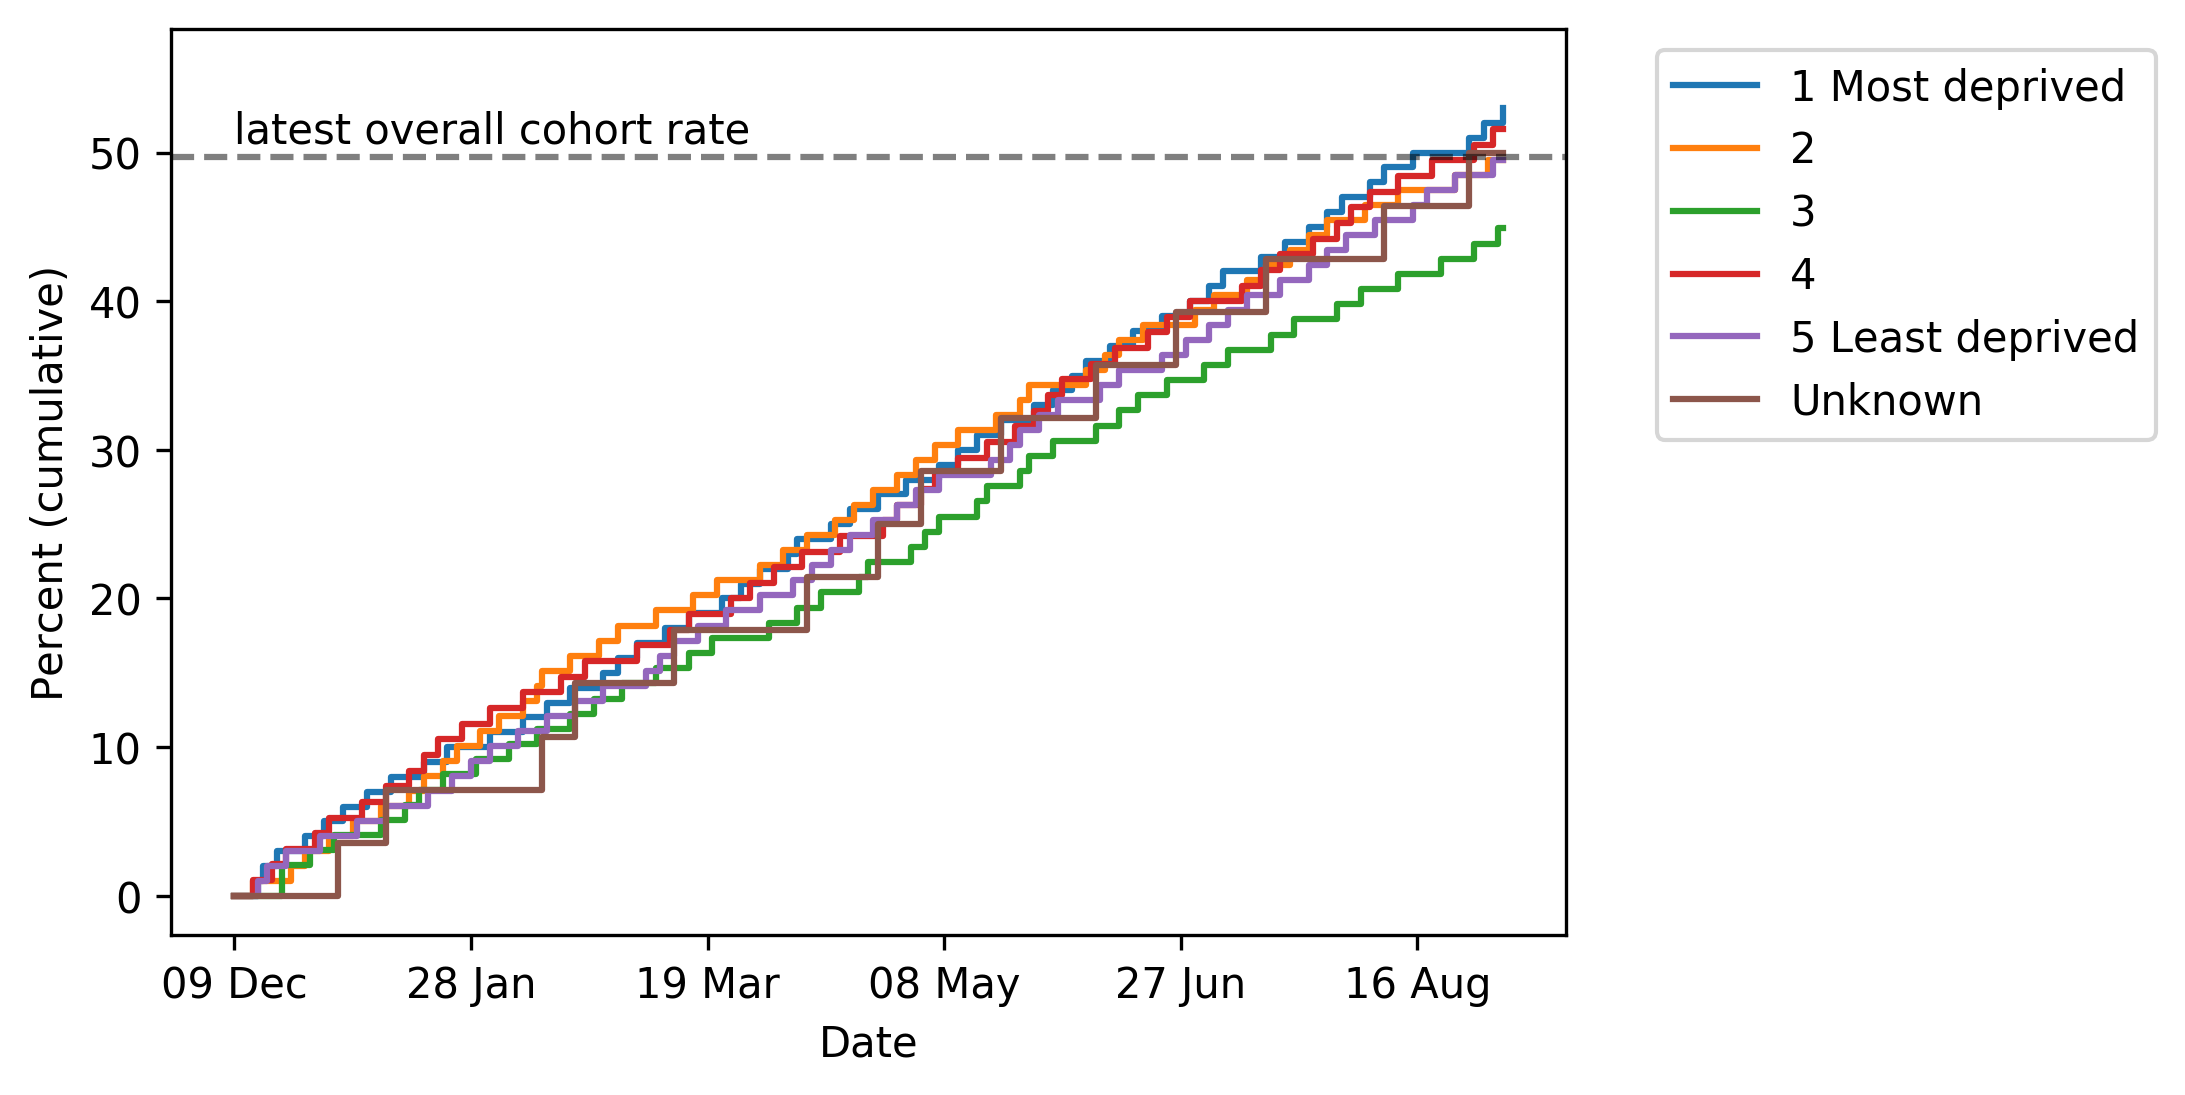

### COVID vaccinations among 70-79 population
 ### by BMI

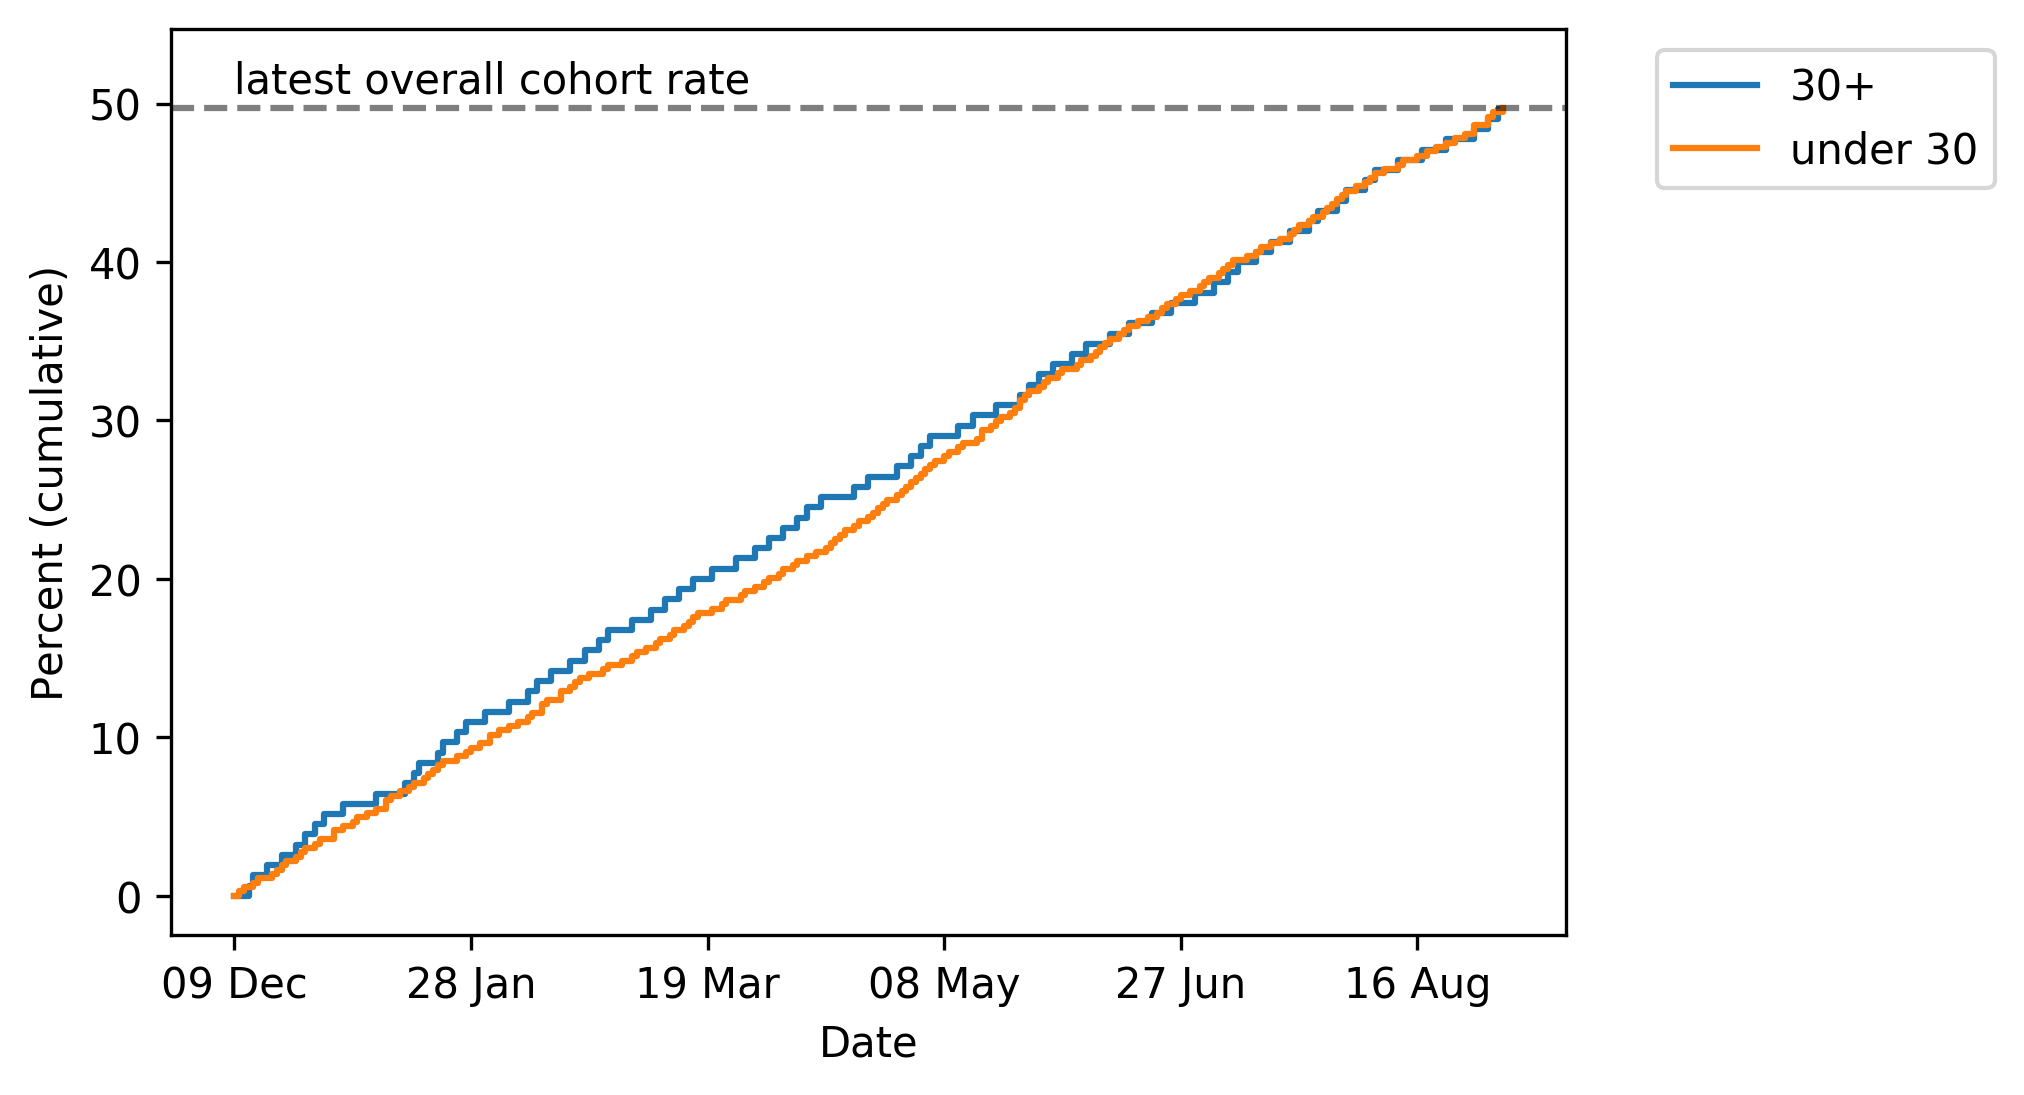

### COVID vaccinations among 70-79 population
 ### by Dialysis

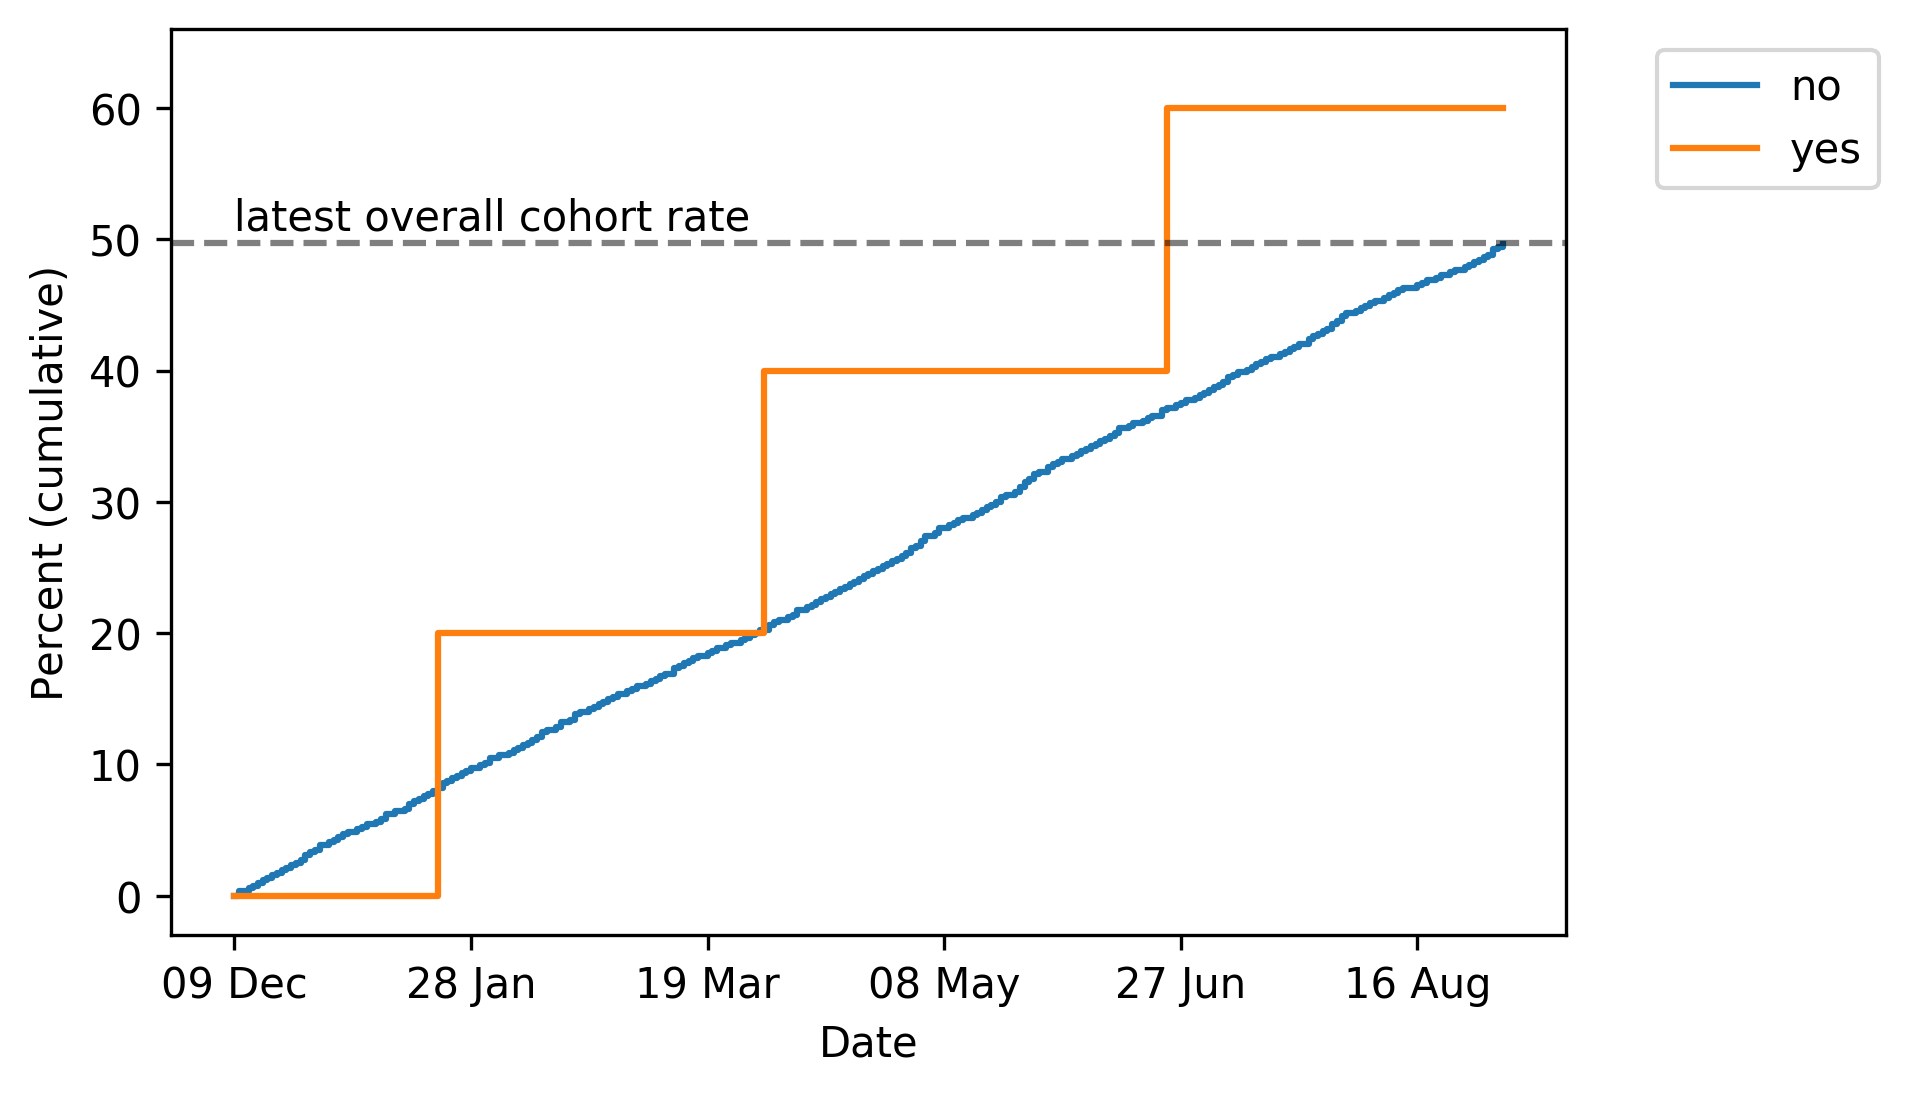

### COVID vaccinations among 70-79 population
 ### by Dementia

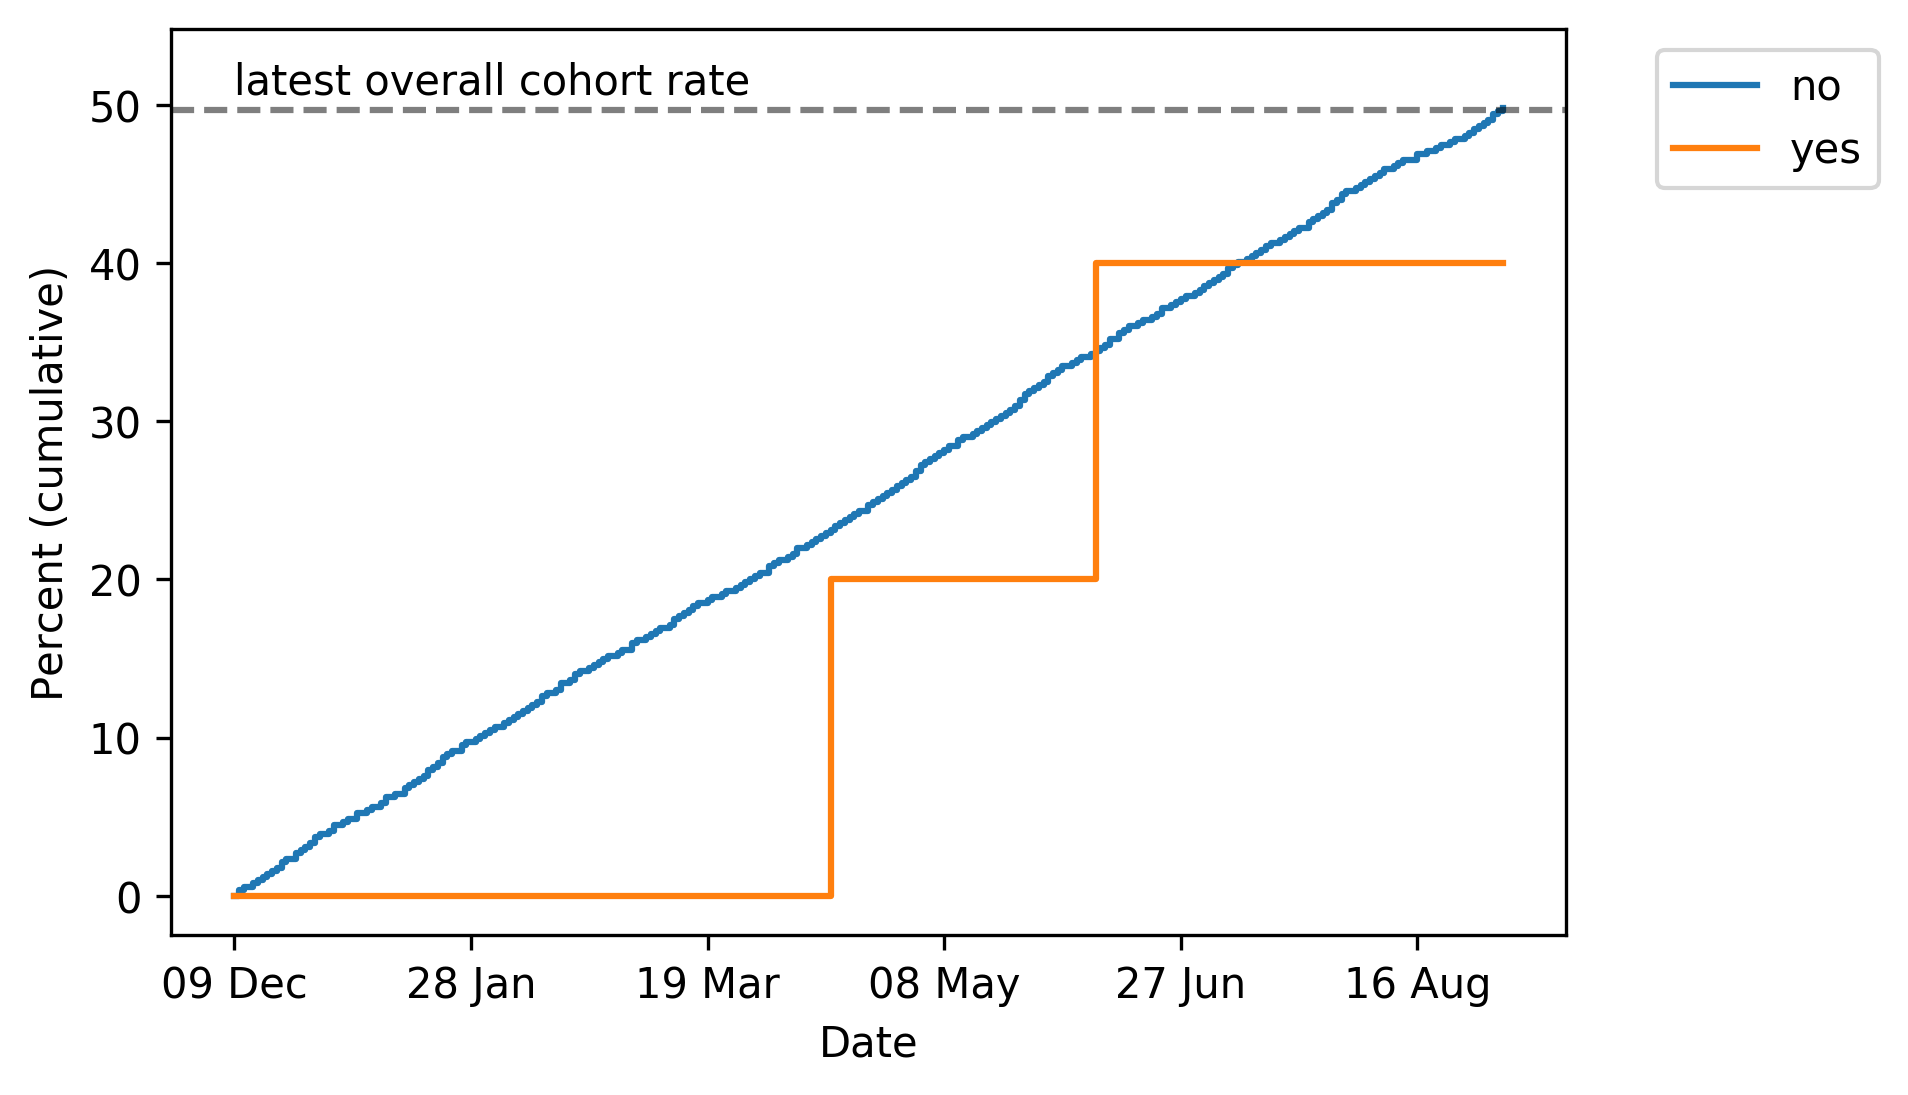

### COVID vaccinations among 70-79 population
 ### by Learning disability

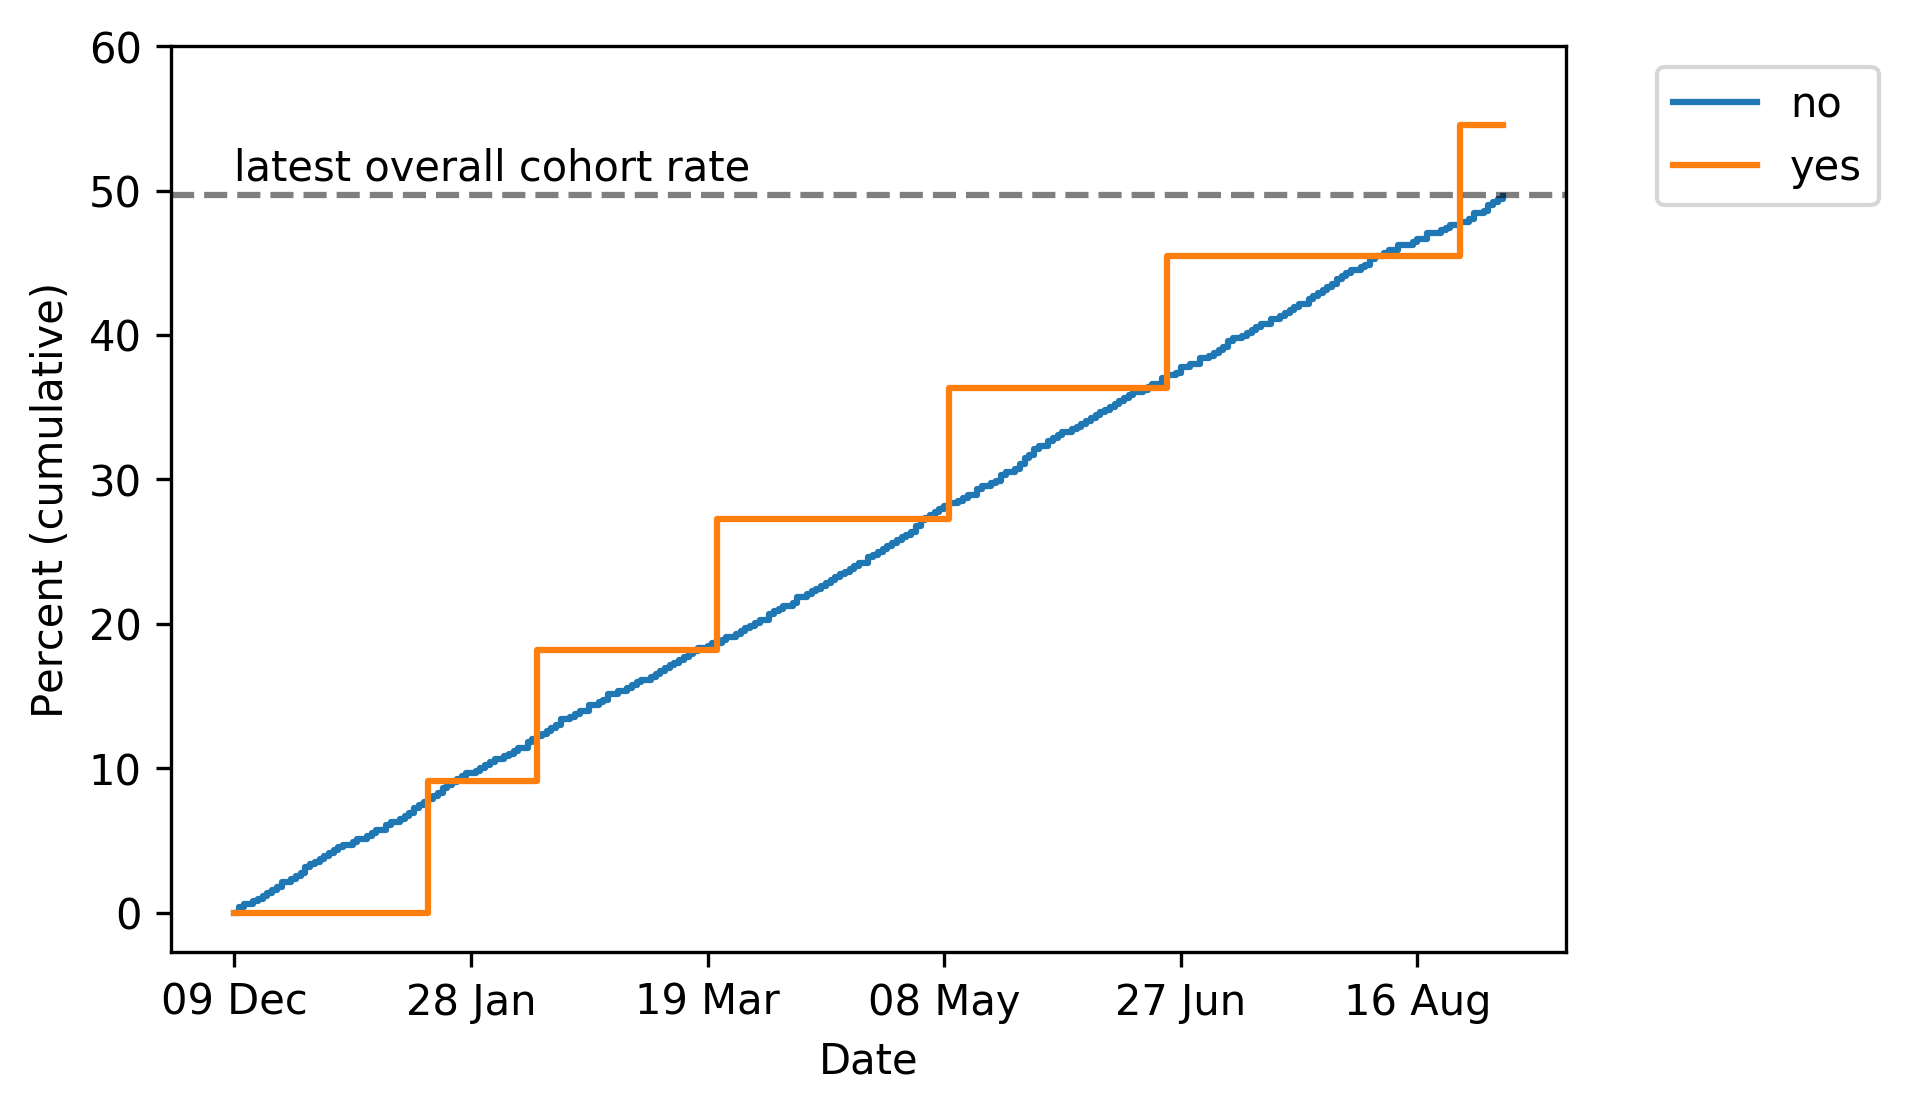

### COVID vaccinations among 70-79 population
 ### by Psychosis, schizophrenia, or bipolar

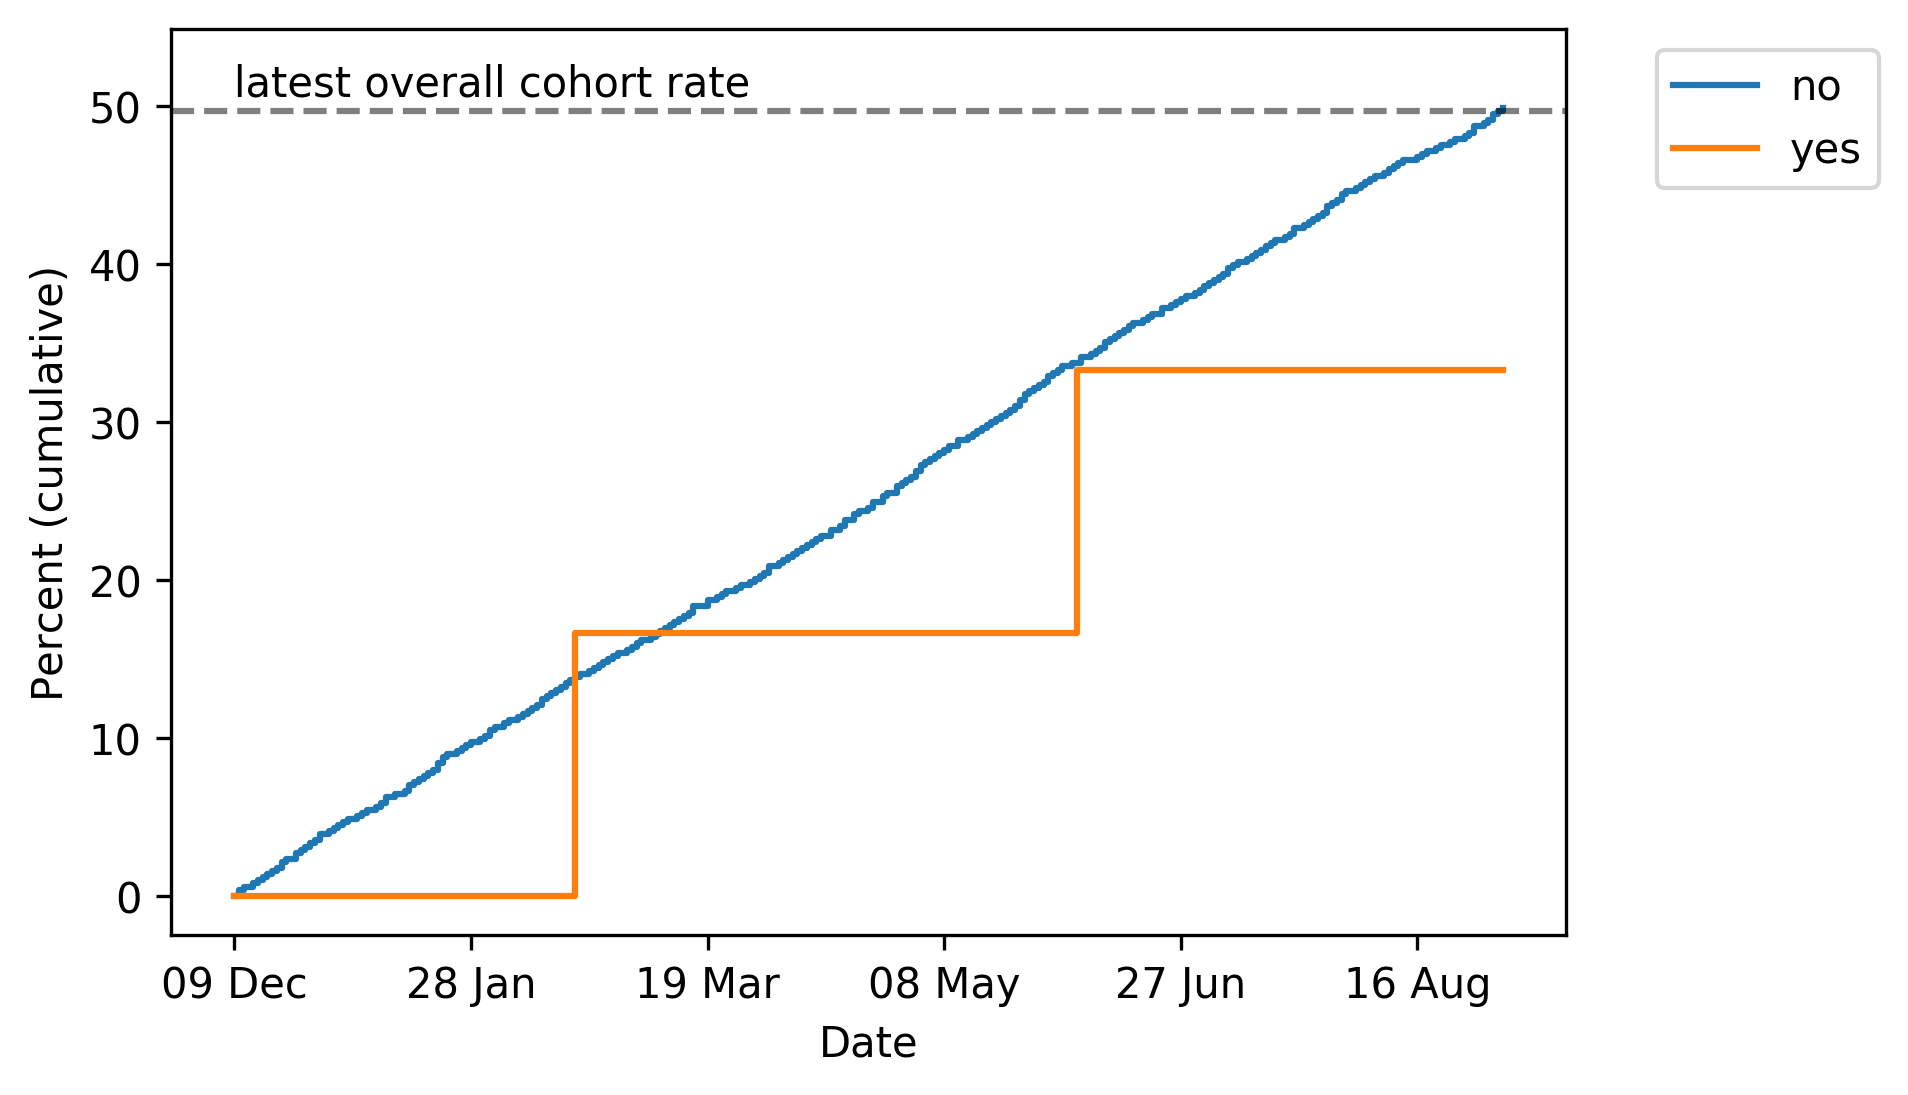

### COVID vaccinations among 70-79 population
 ### by SSRI (last 12 months)

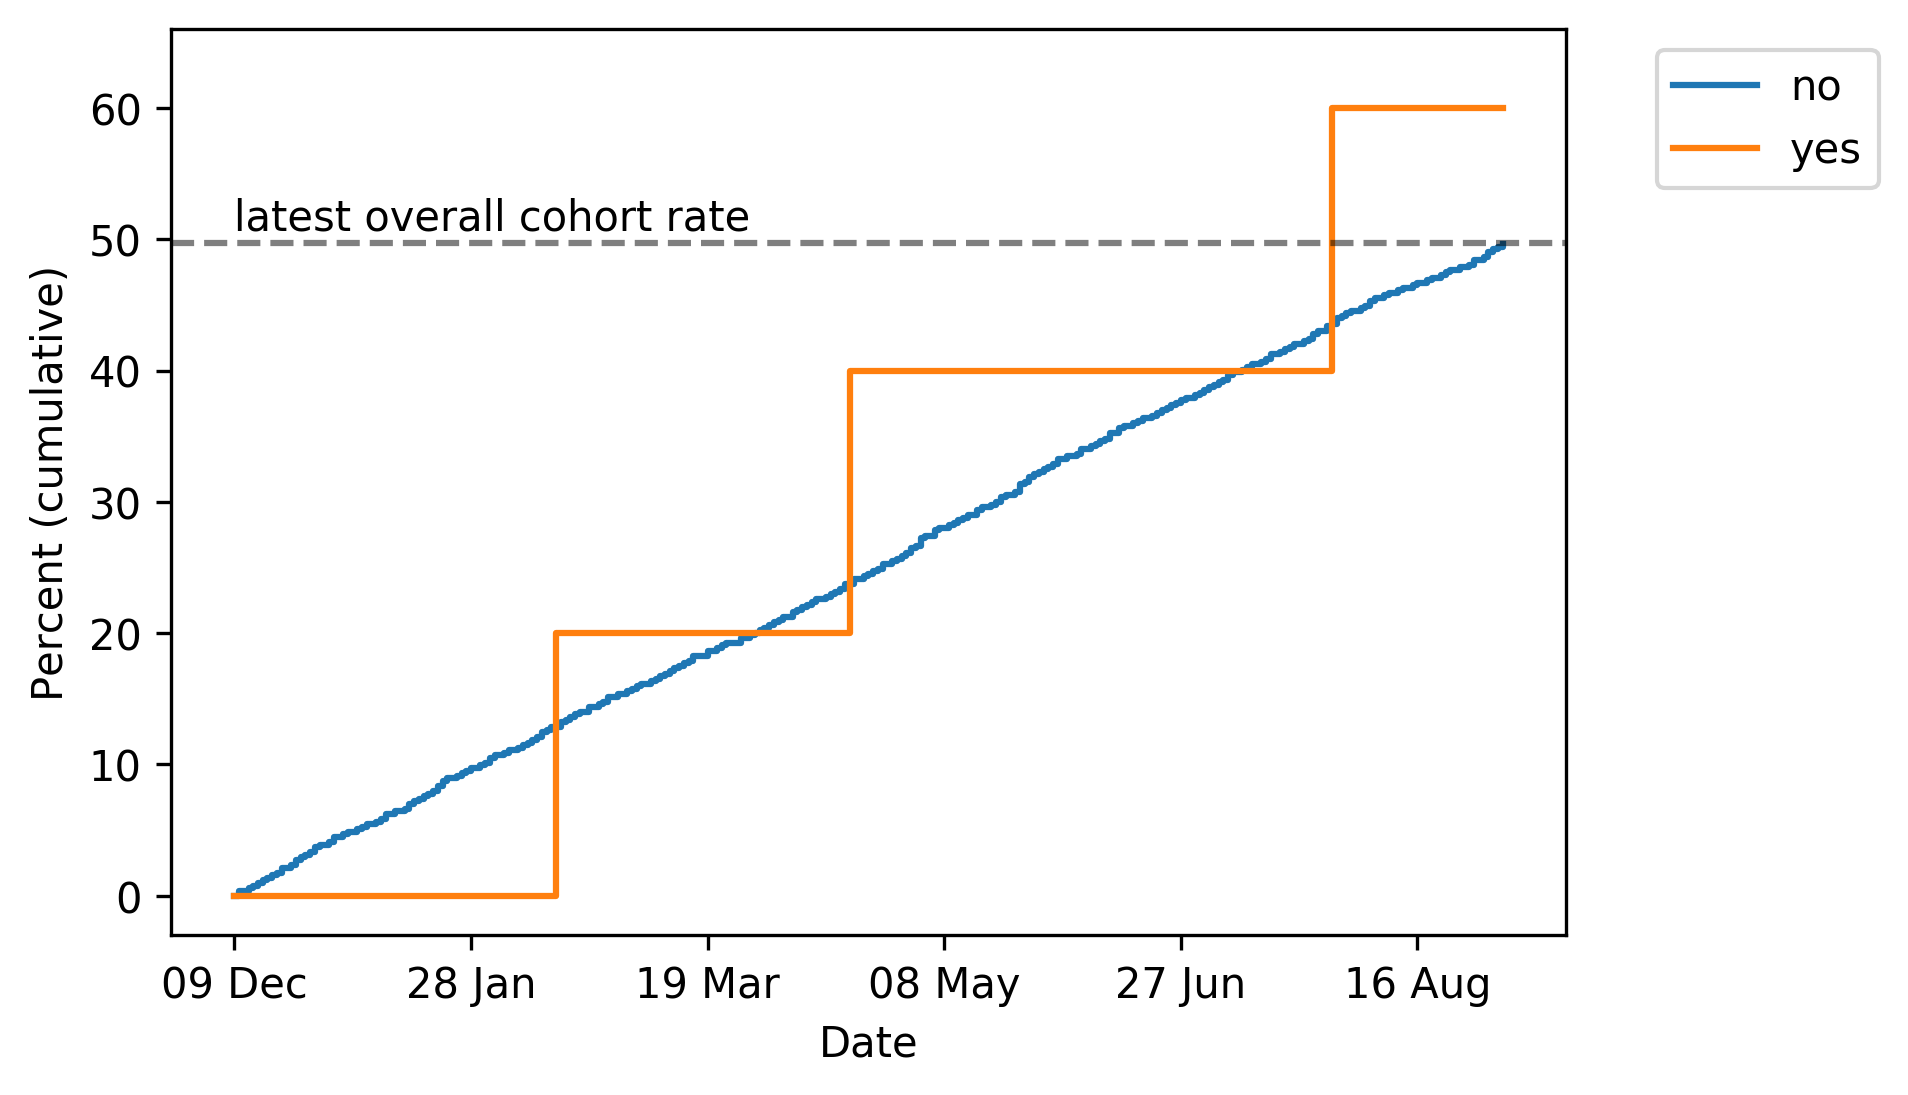

### COVID vaccinations among 70-79 population
 ### by Age band

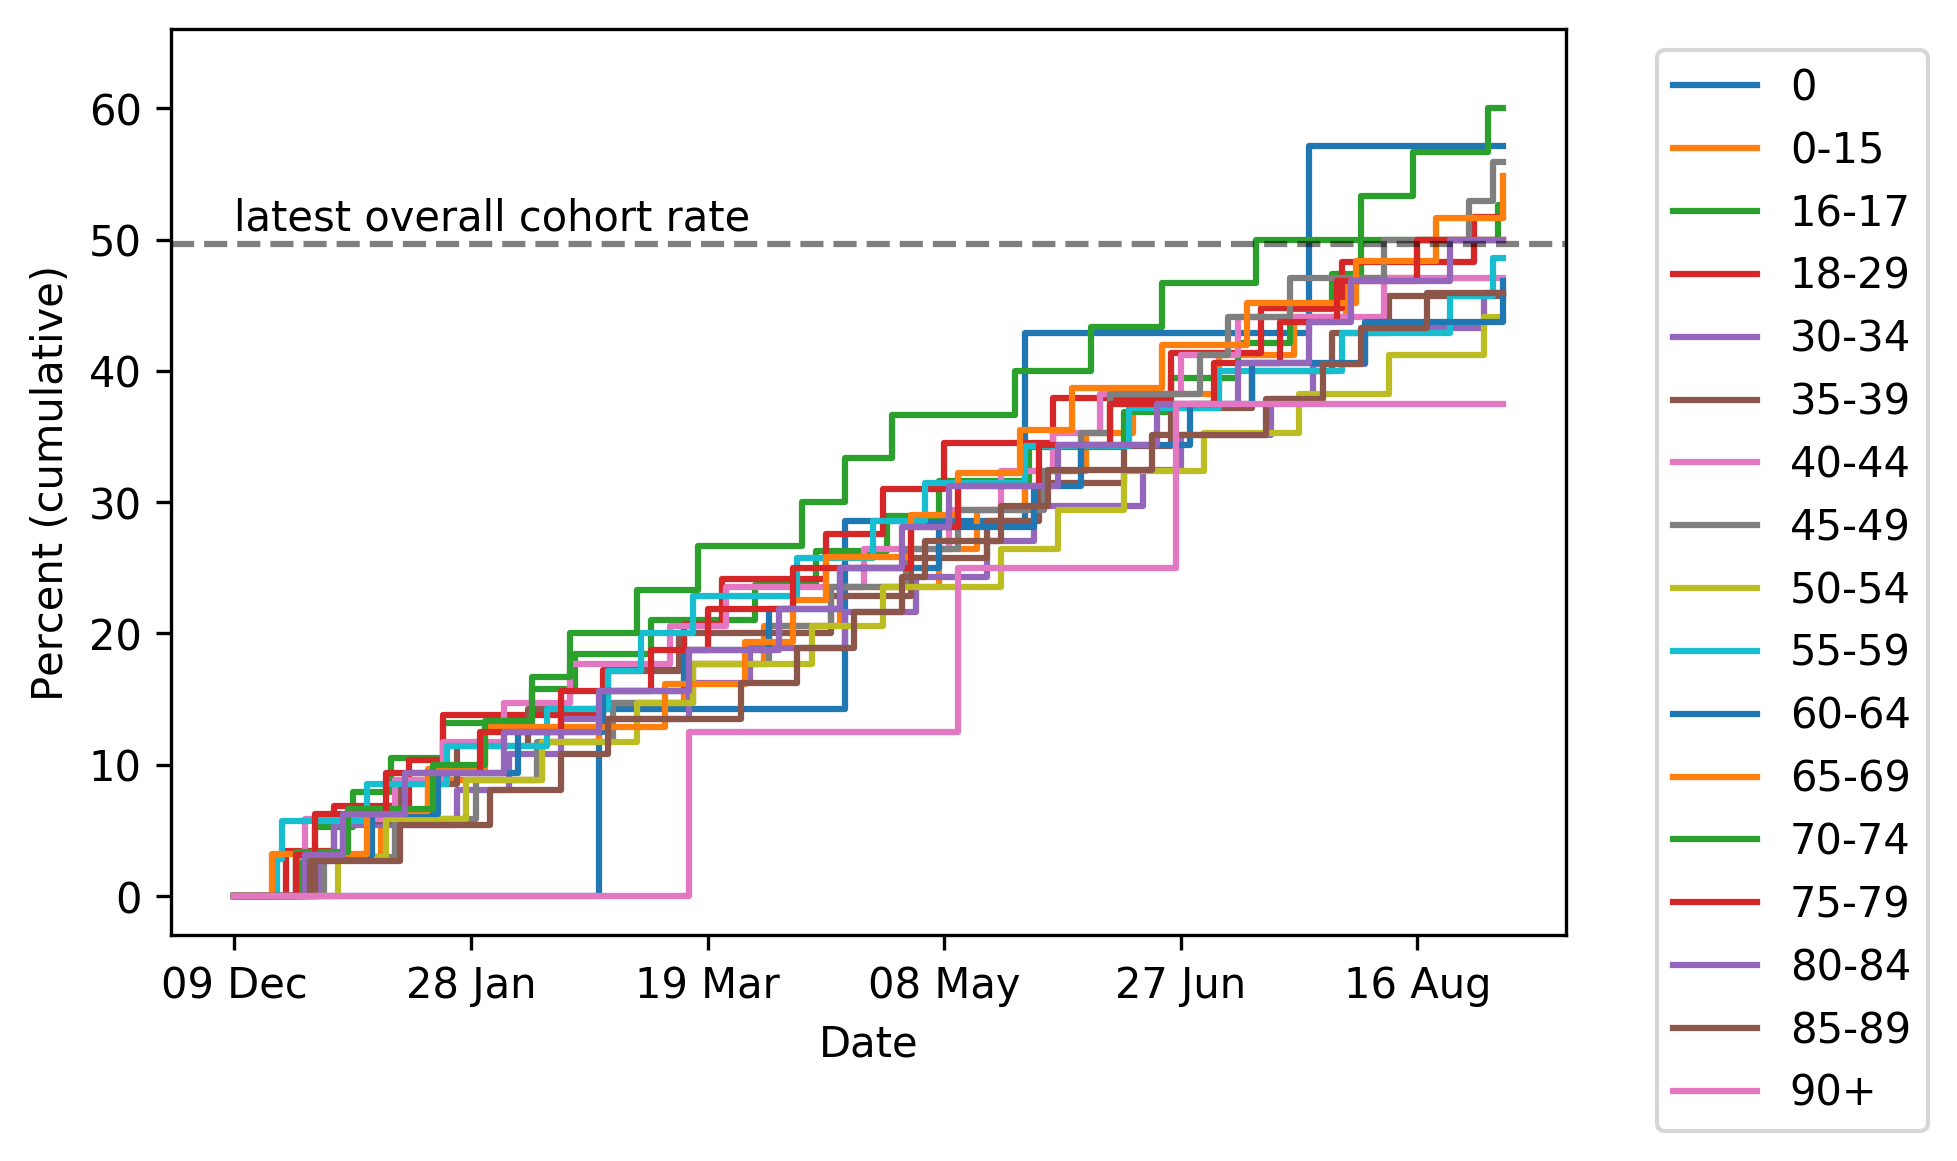

In [5]:
display(Markdown("## 70-79 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="70-79", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of **shielding** population according to demographic/clinical features, cumulatively by day. <a name='charts_shield' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## Shielding population (aged 16-69)

### COVID vaccinations among shielding (aged 16-69) population
 ### by newly shielded since feb 15

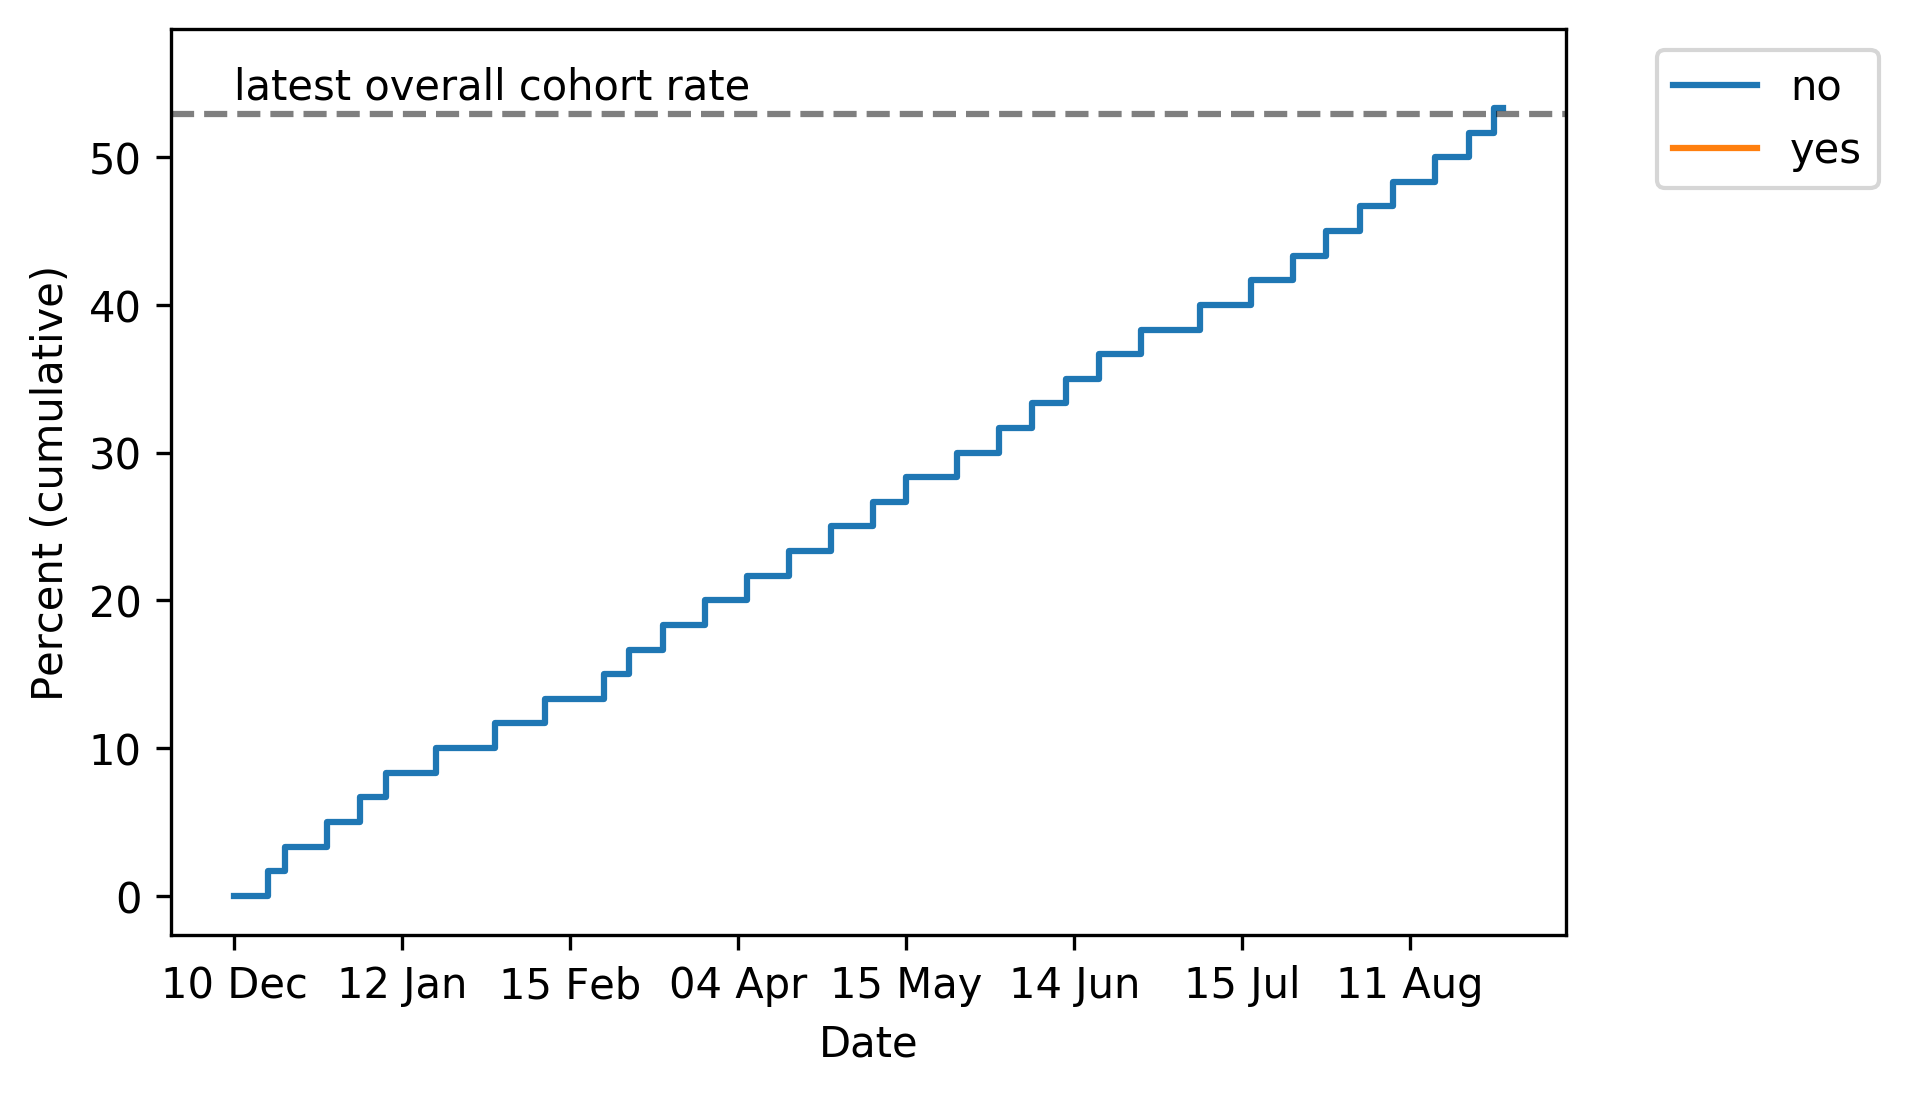

### COVID vaccinations among shielding (aged 16-69) population
 ### by Age band

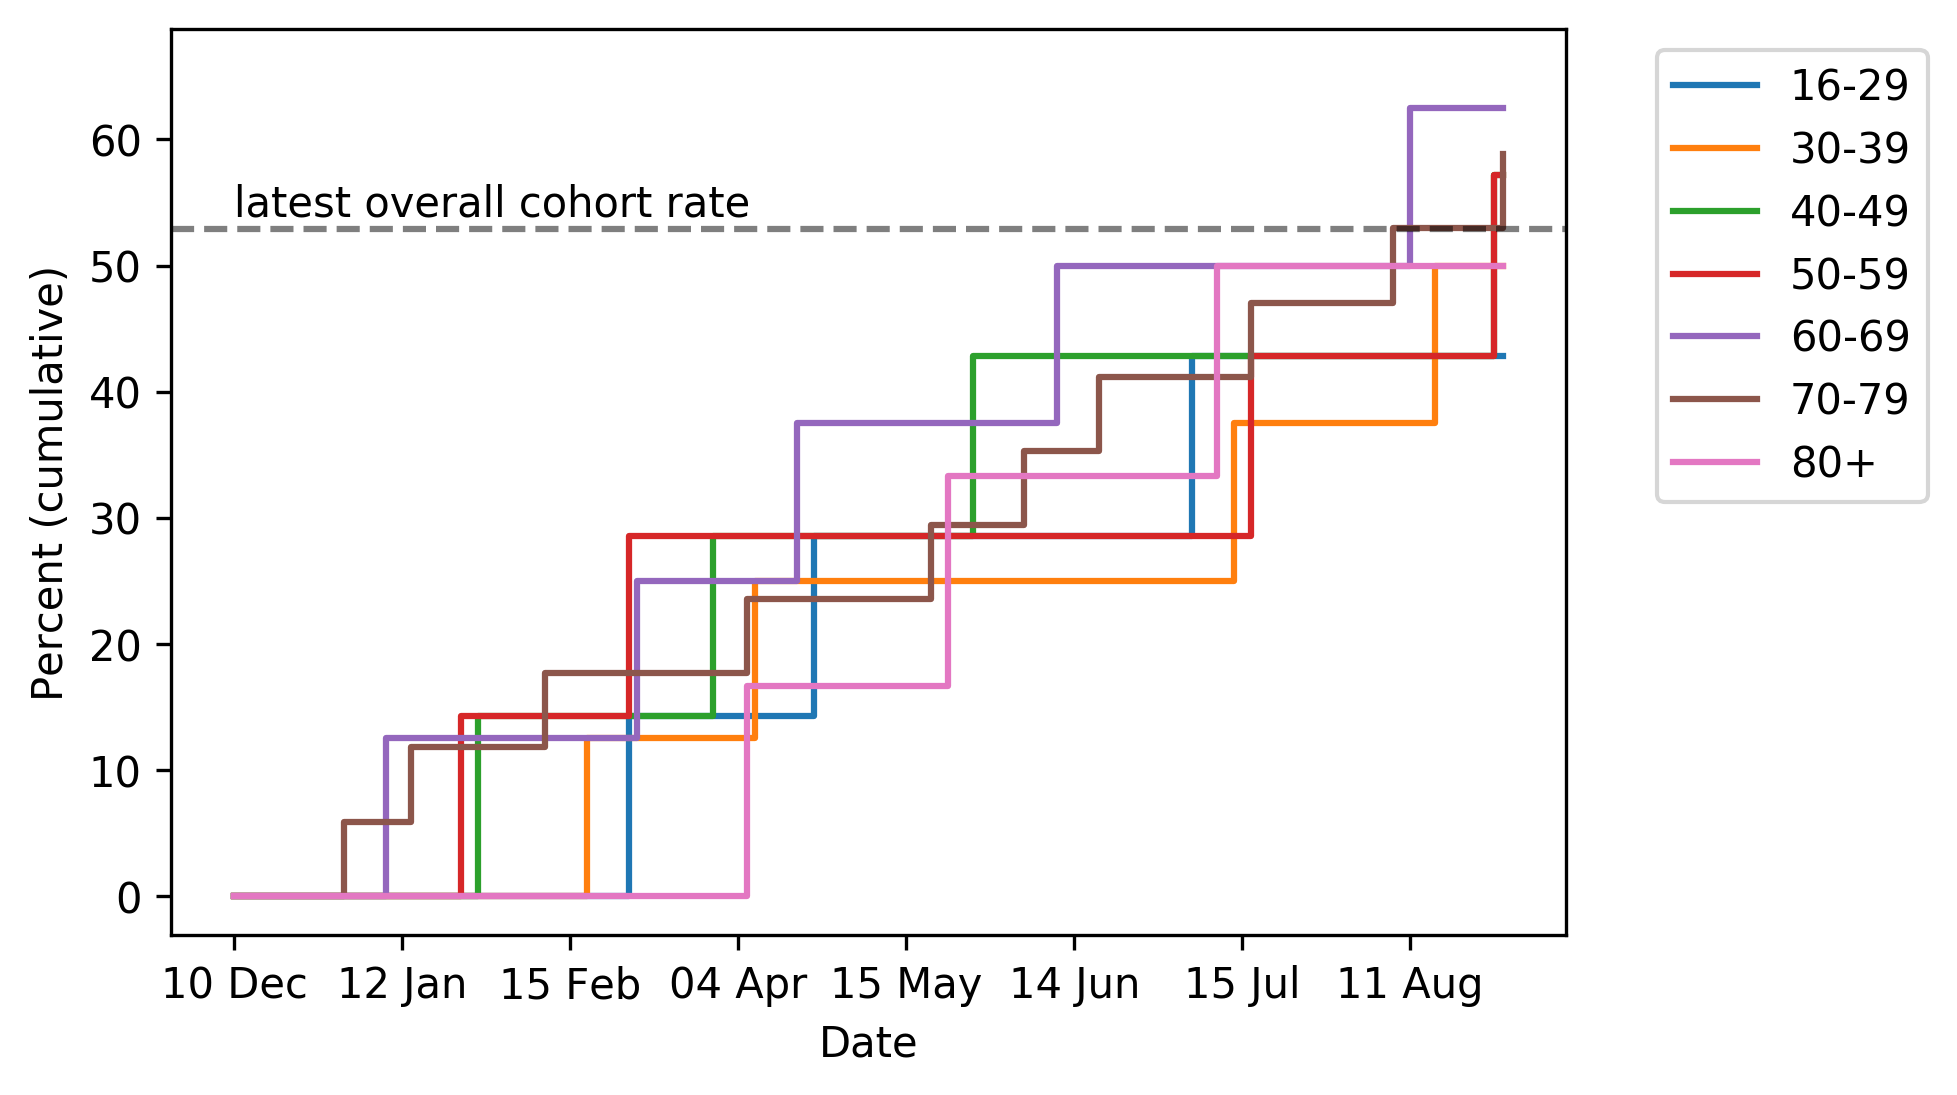

### COVID vaccinations among shielding (aged 16-69) population
 ### by Sex

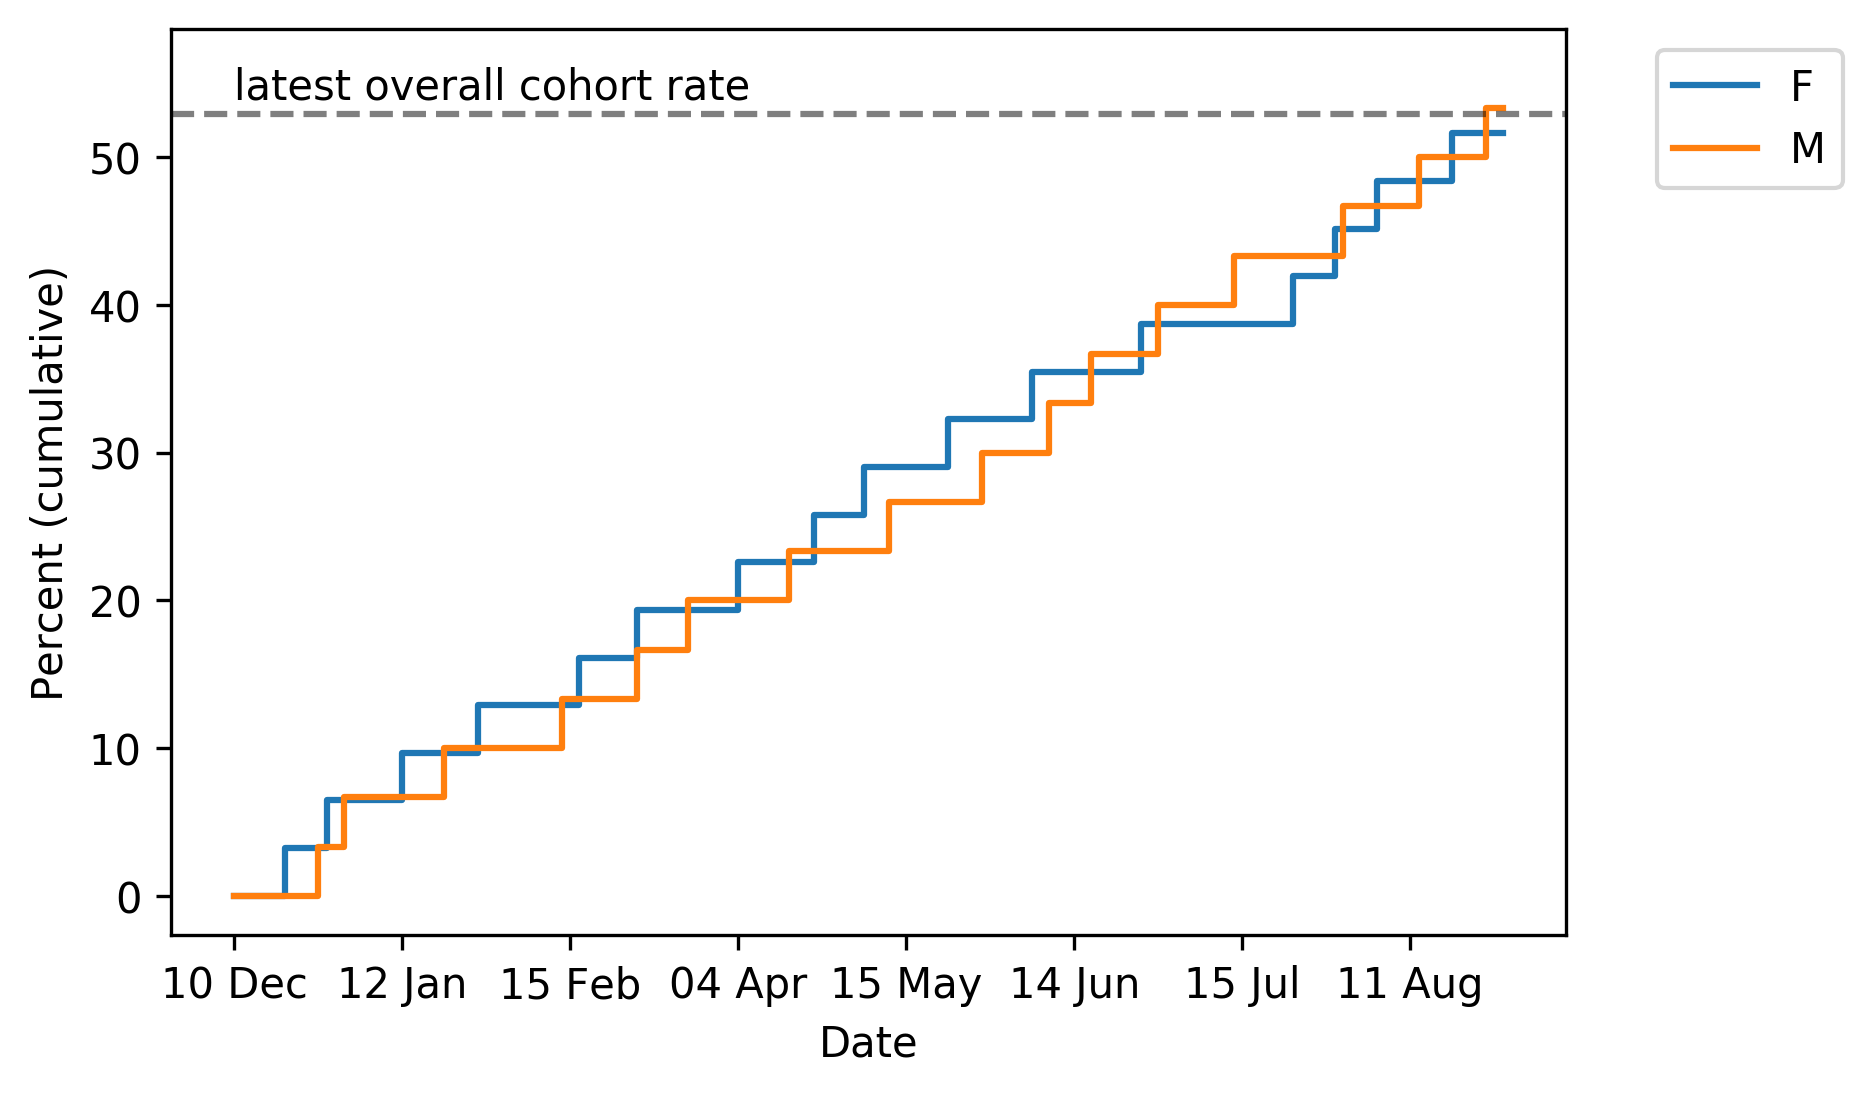

### COVID vaccinations among shielding (aged 16-69) population
 ### by Ethnicity (broad categories)

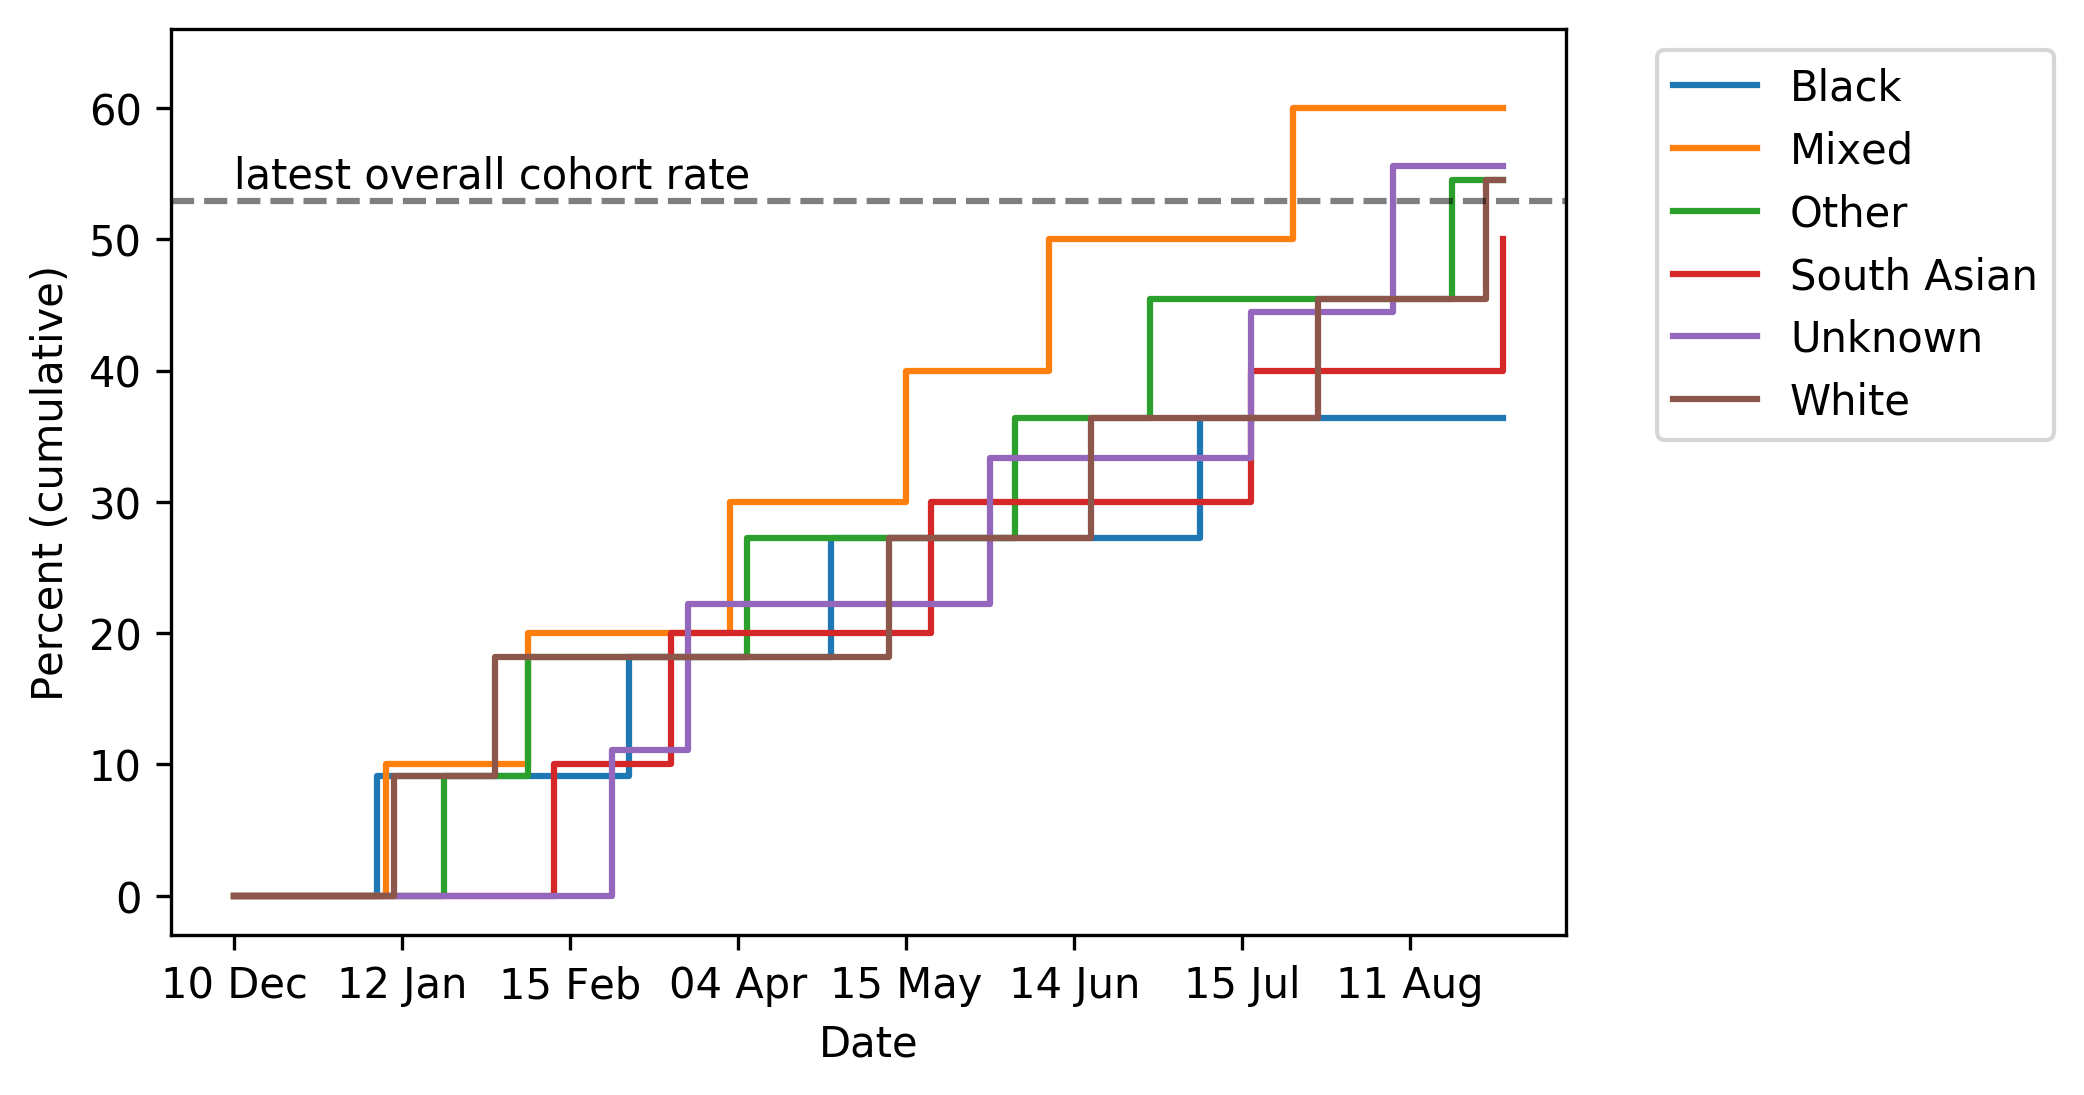

### COVID vaccinations among shielding (aged 16-69) population
 ### by Index of Multiple Deprivation (quintiles)

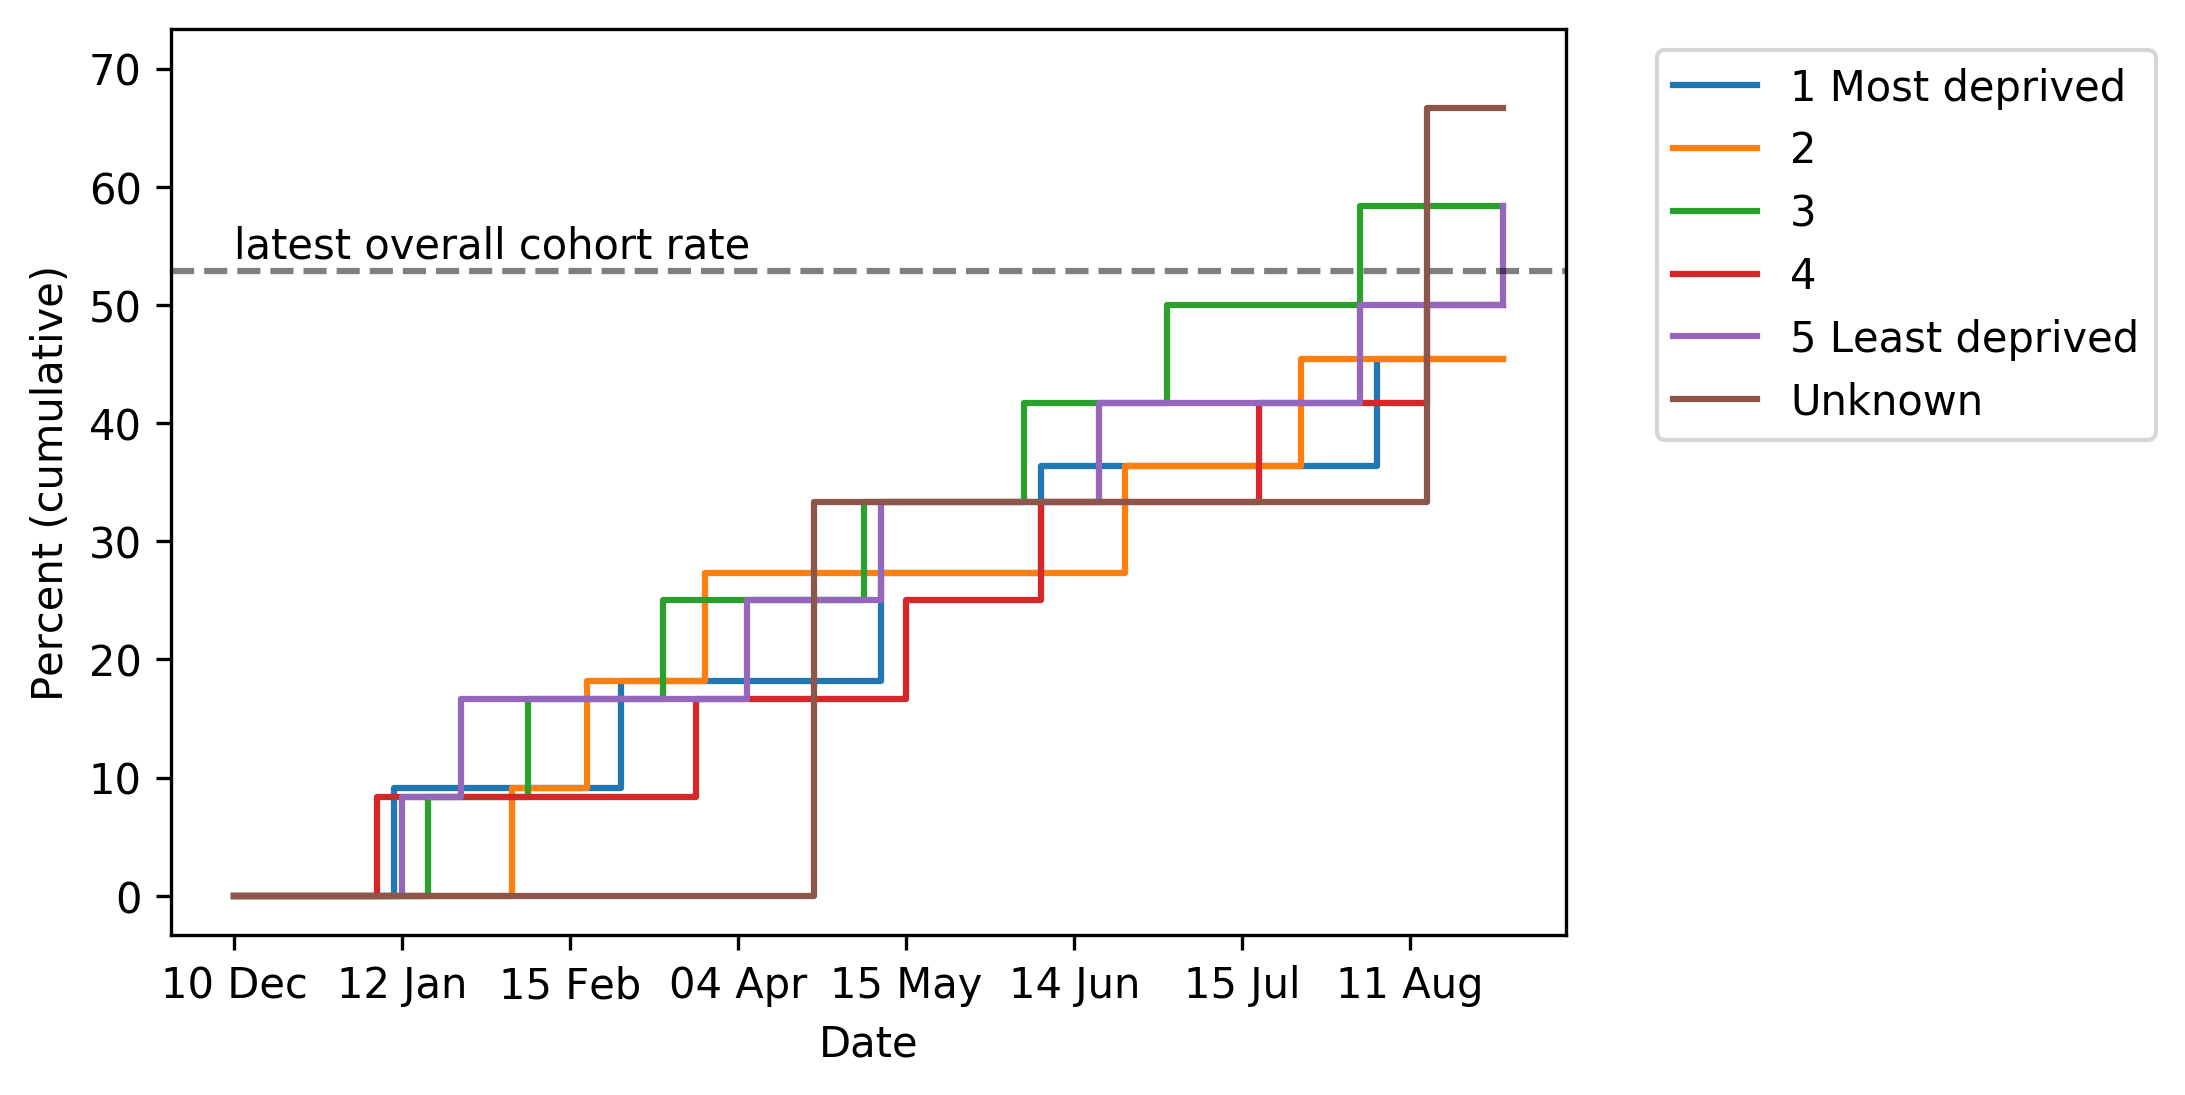

### COVID vaccinations among shielding (aged 16-69) population
 ### by Learning disability

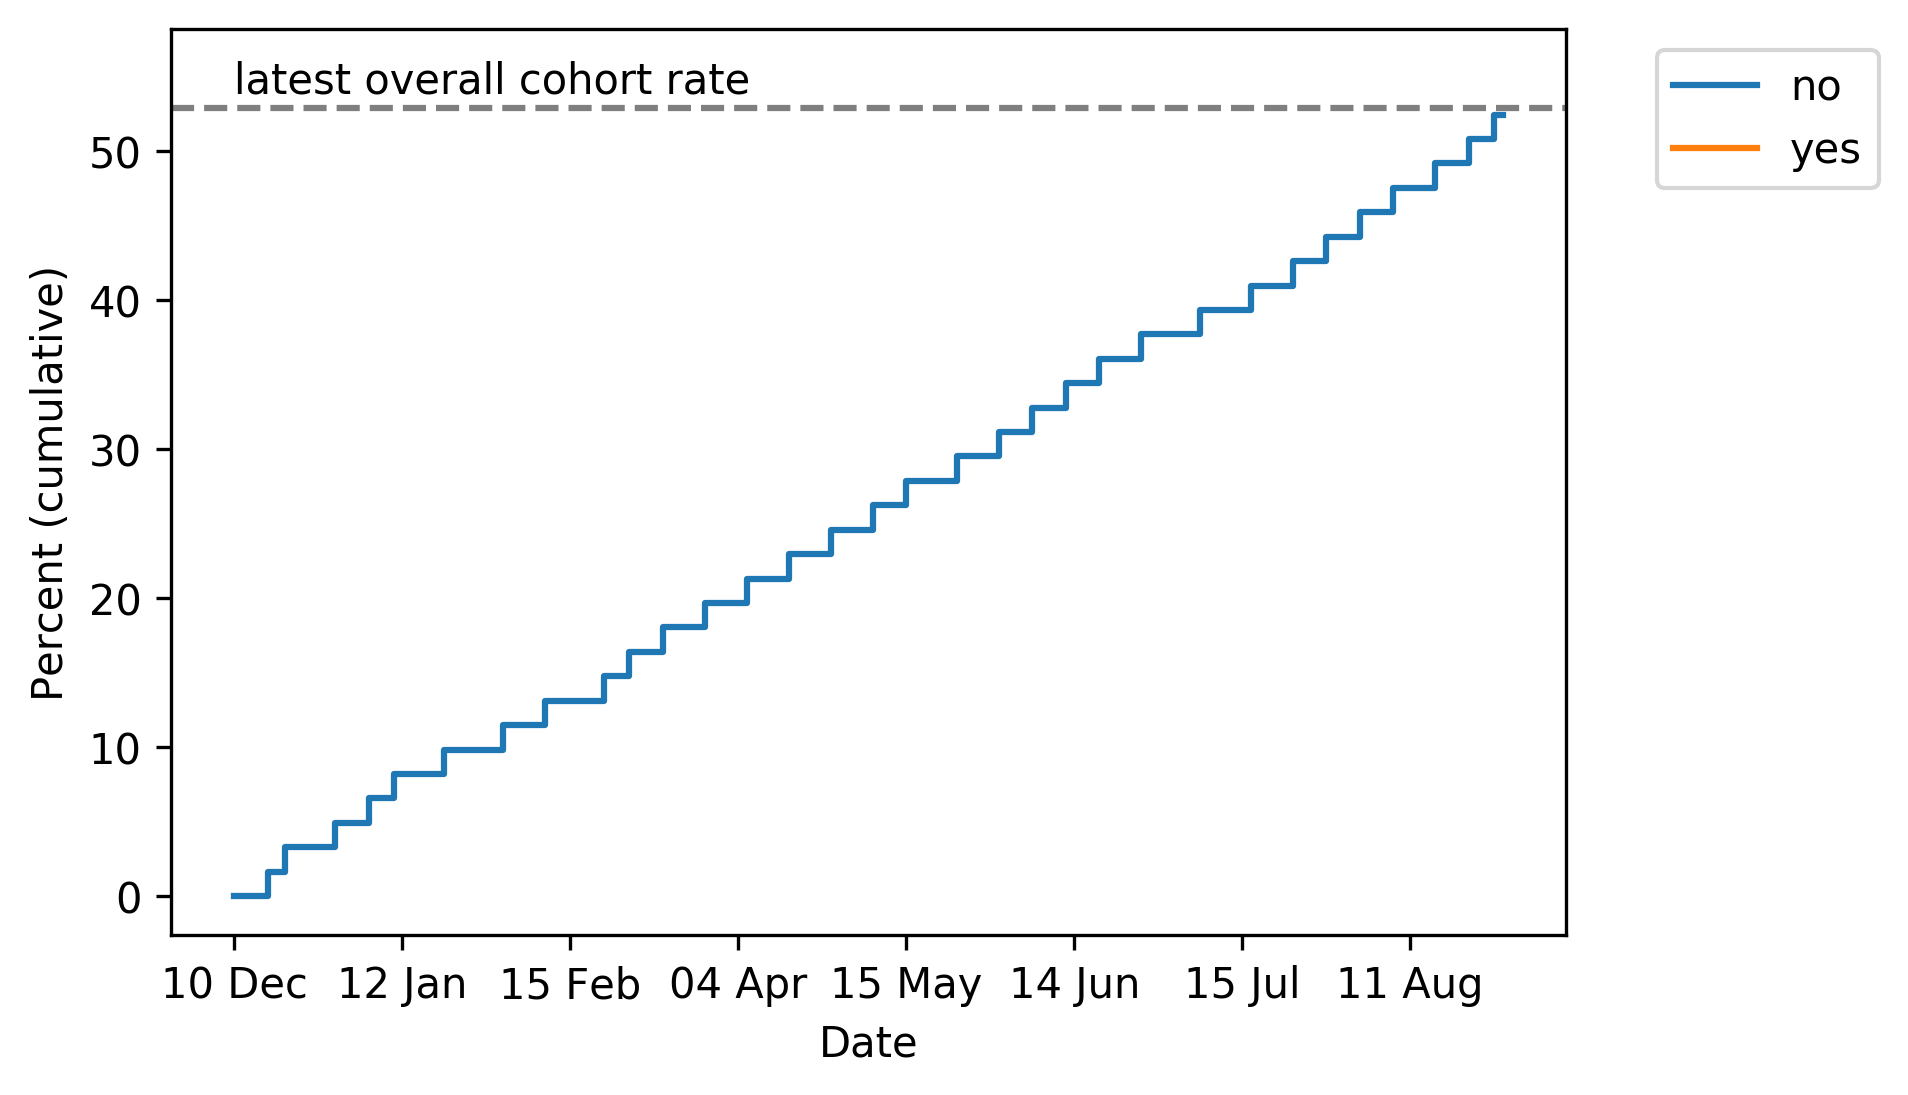

In [6]:
display(Markdown("## Shielding population (aged 16-69)"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="shielding (aged 16-69)", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 65-69 population according to demographic/clinical features, cumulatively by day. <a name='charts65' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 65-69 population

### COVID vaccinations among 65-69 population
 ### by Sex

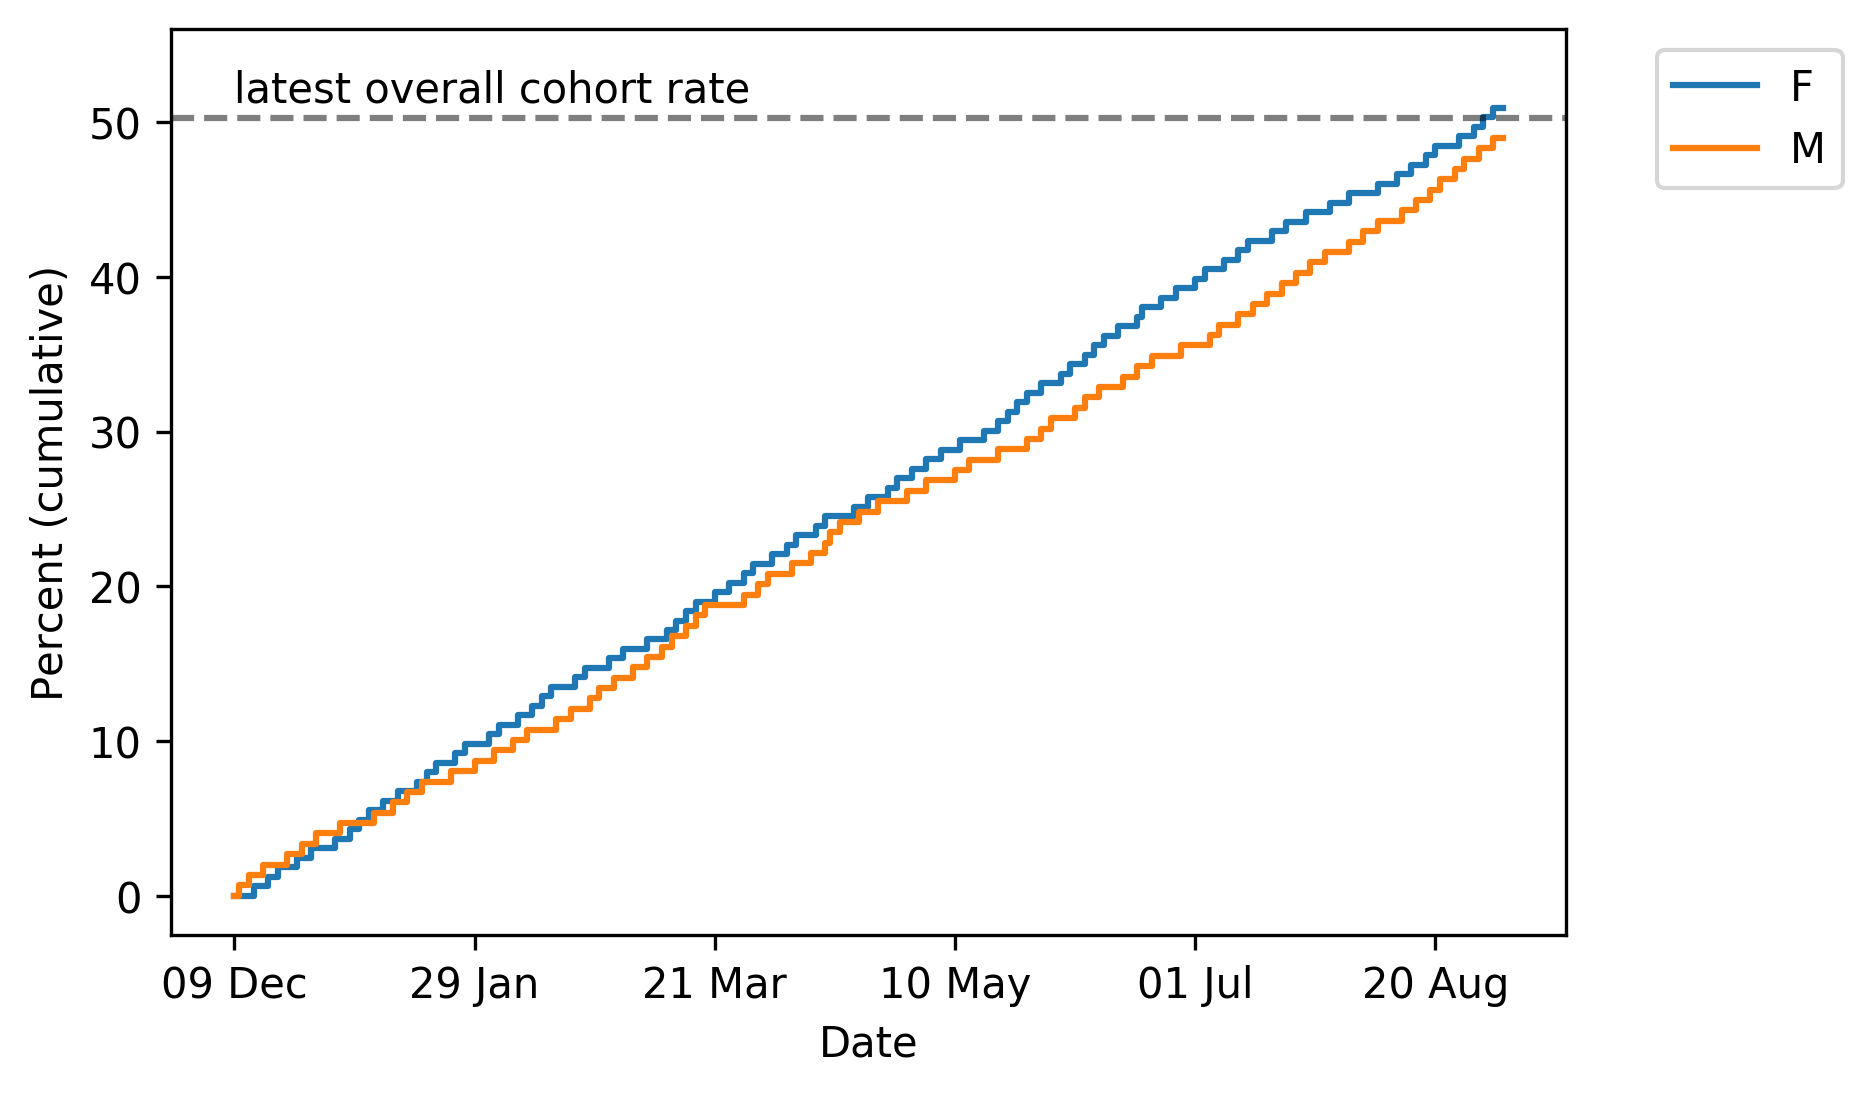

### COVID vaccinations among 65-69 population
 ### by Ethnicity (broad categories)

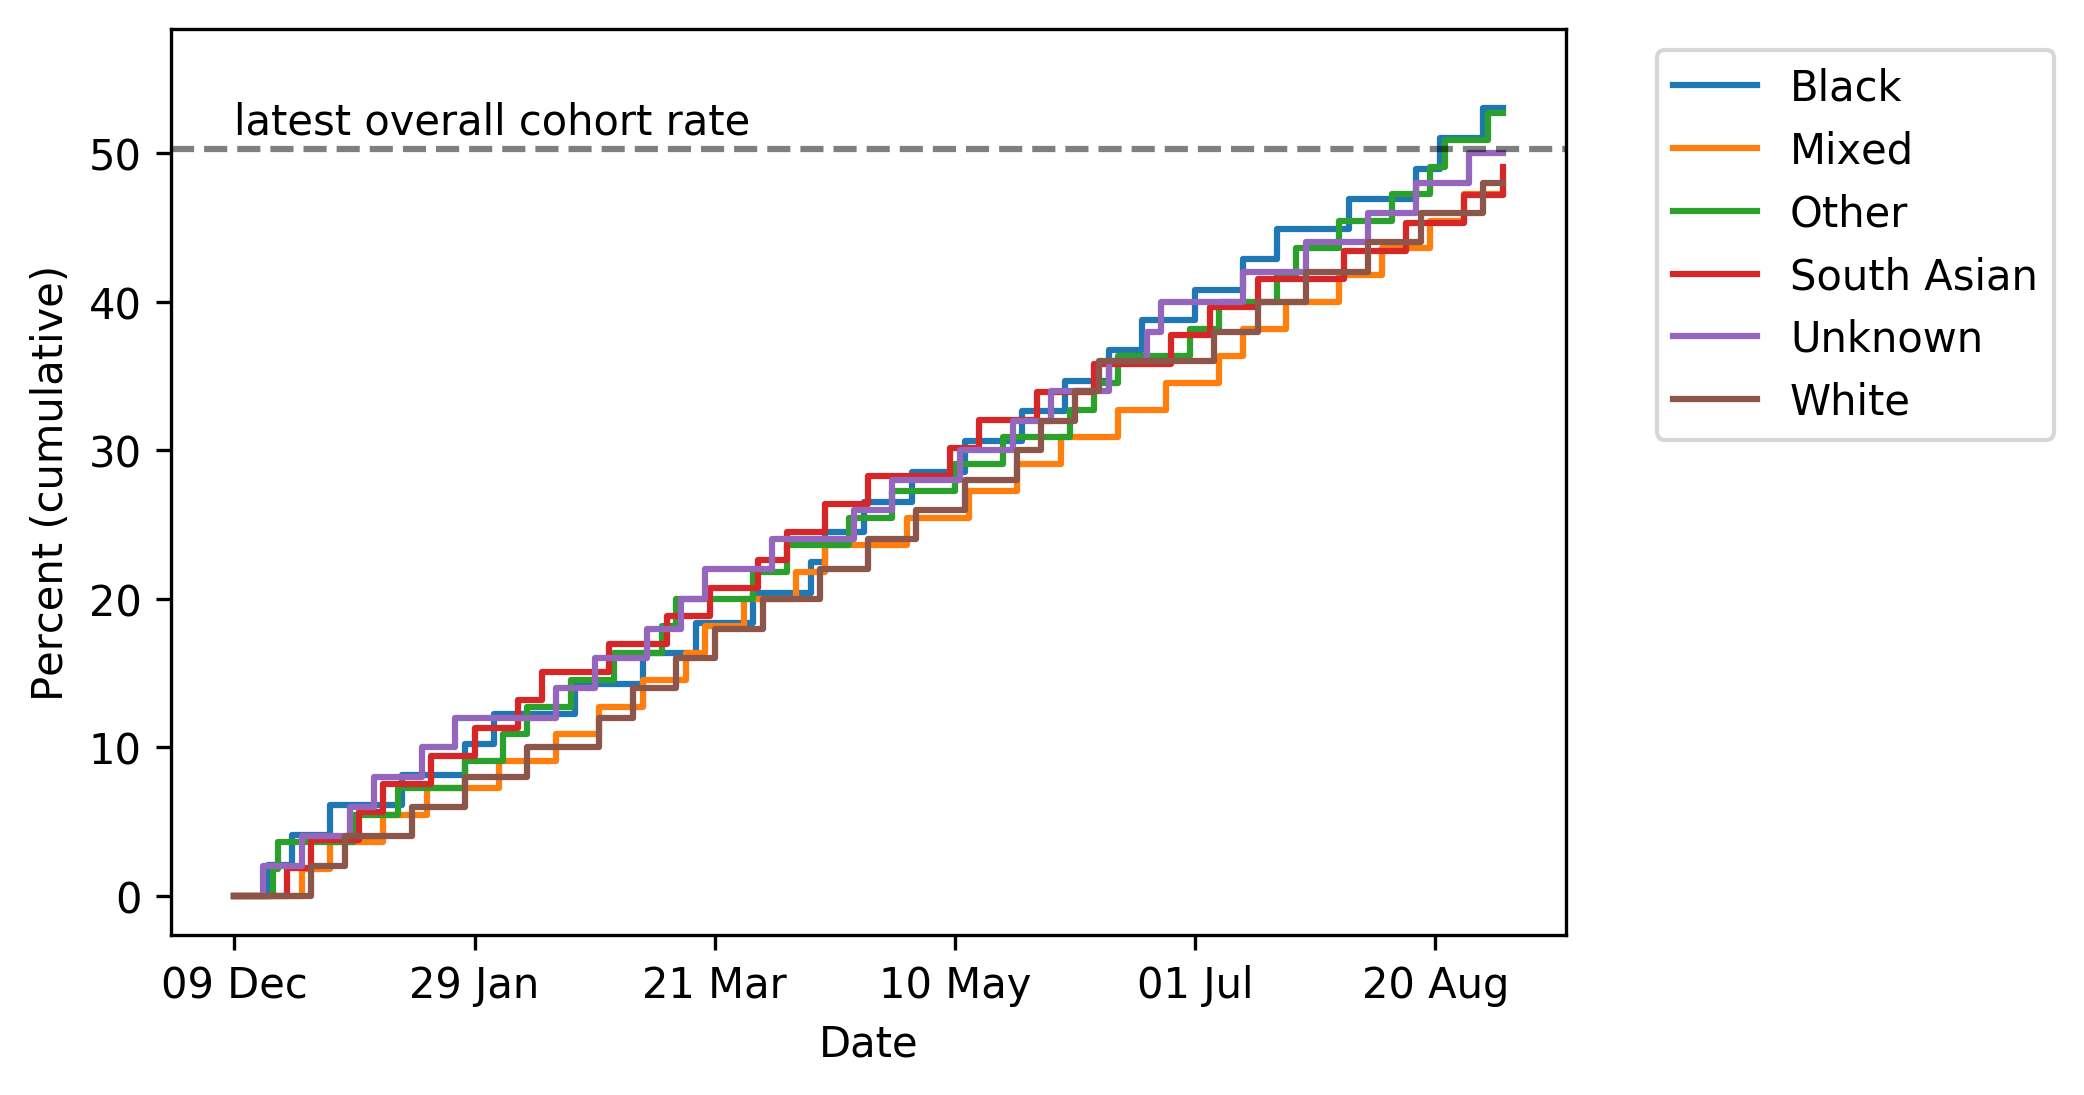

### COVID vaccinations among 65-69 population
 ### by Index of Multiple Deprivation (quintiles)

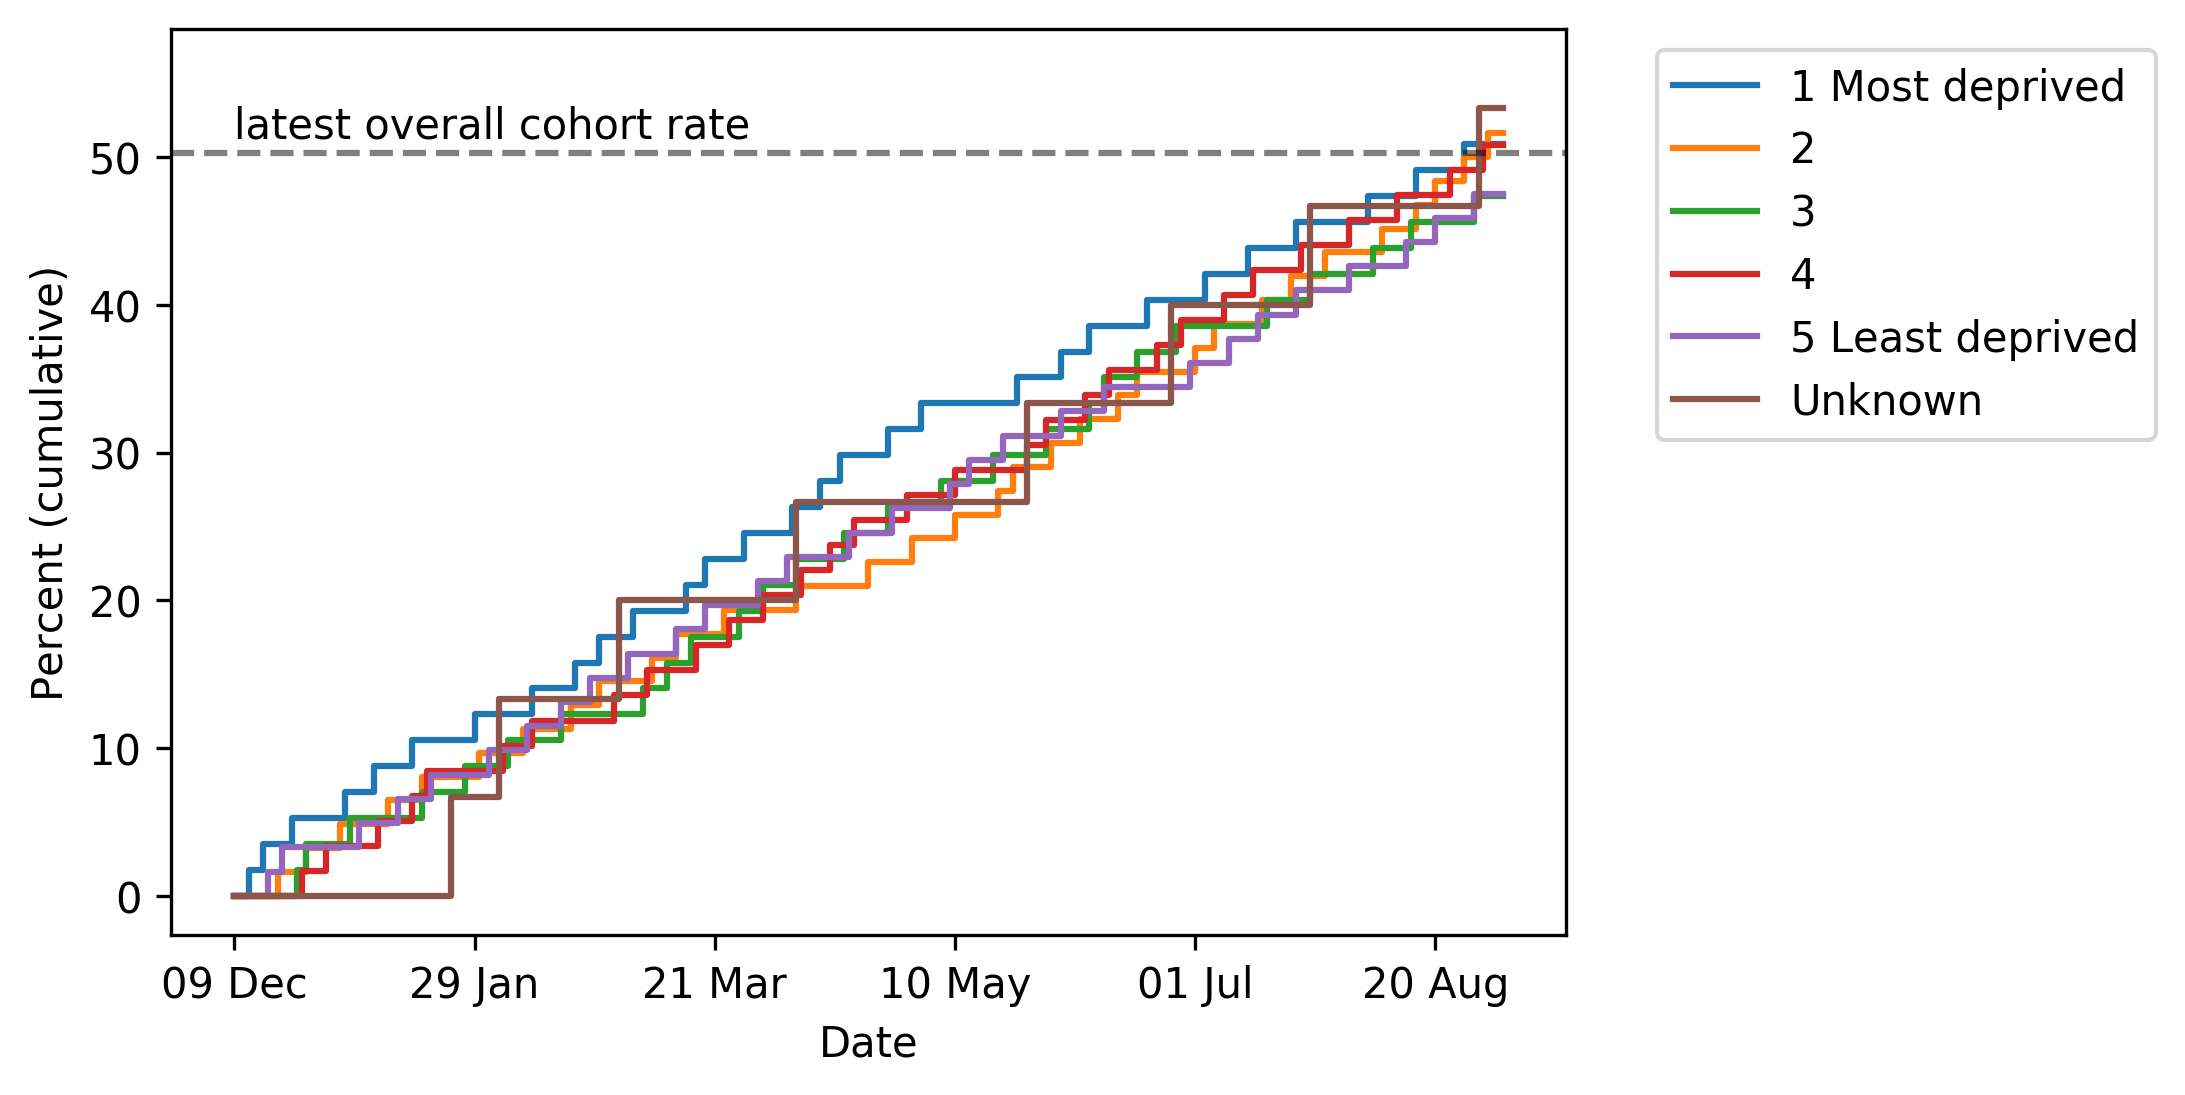

### COVID vaccinations among 65-69 population
 ### by BMI

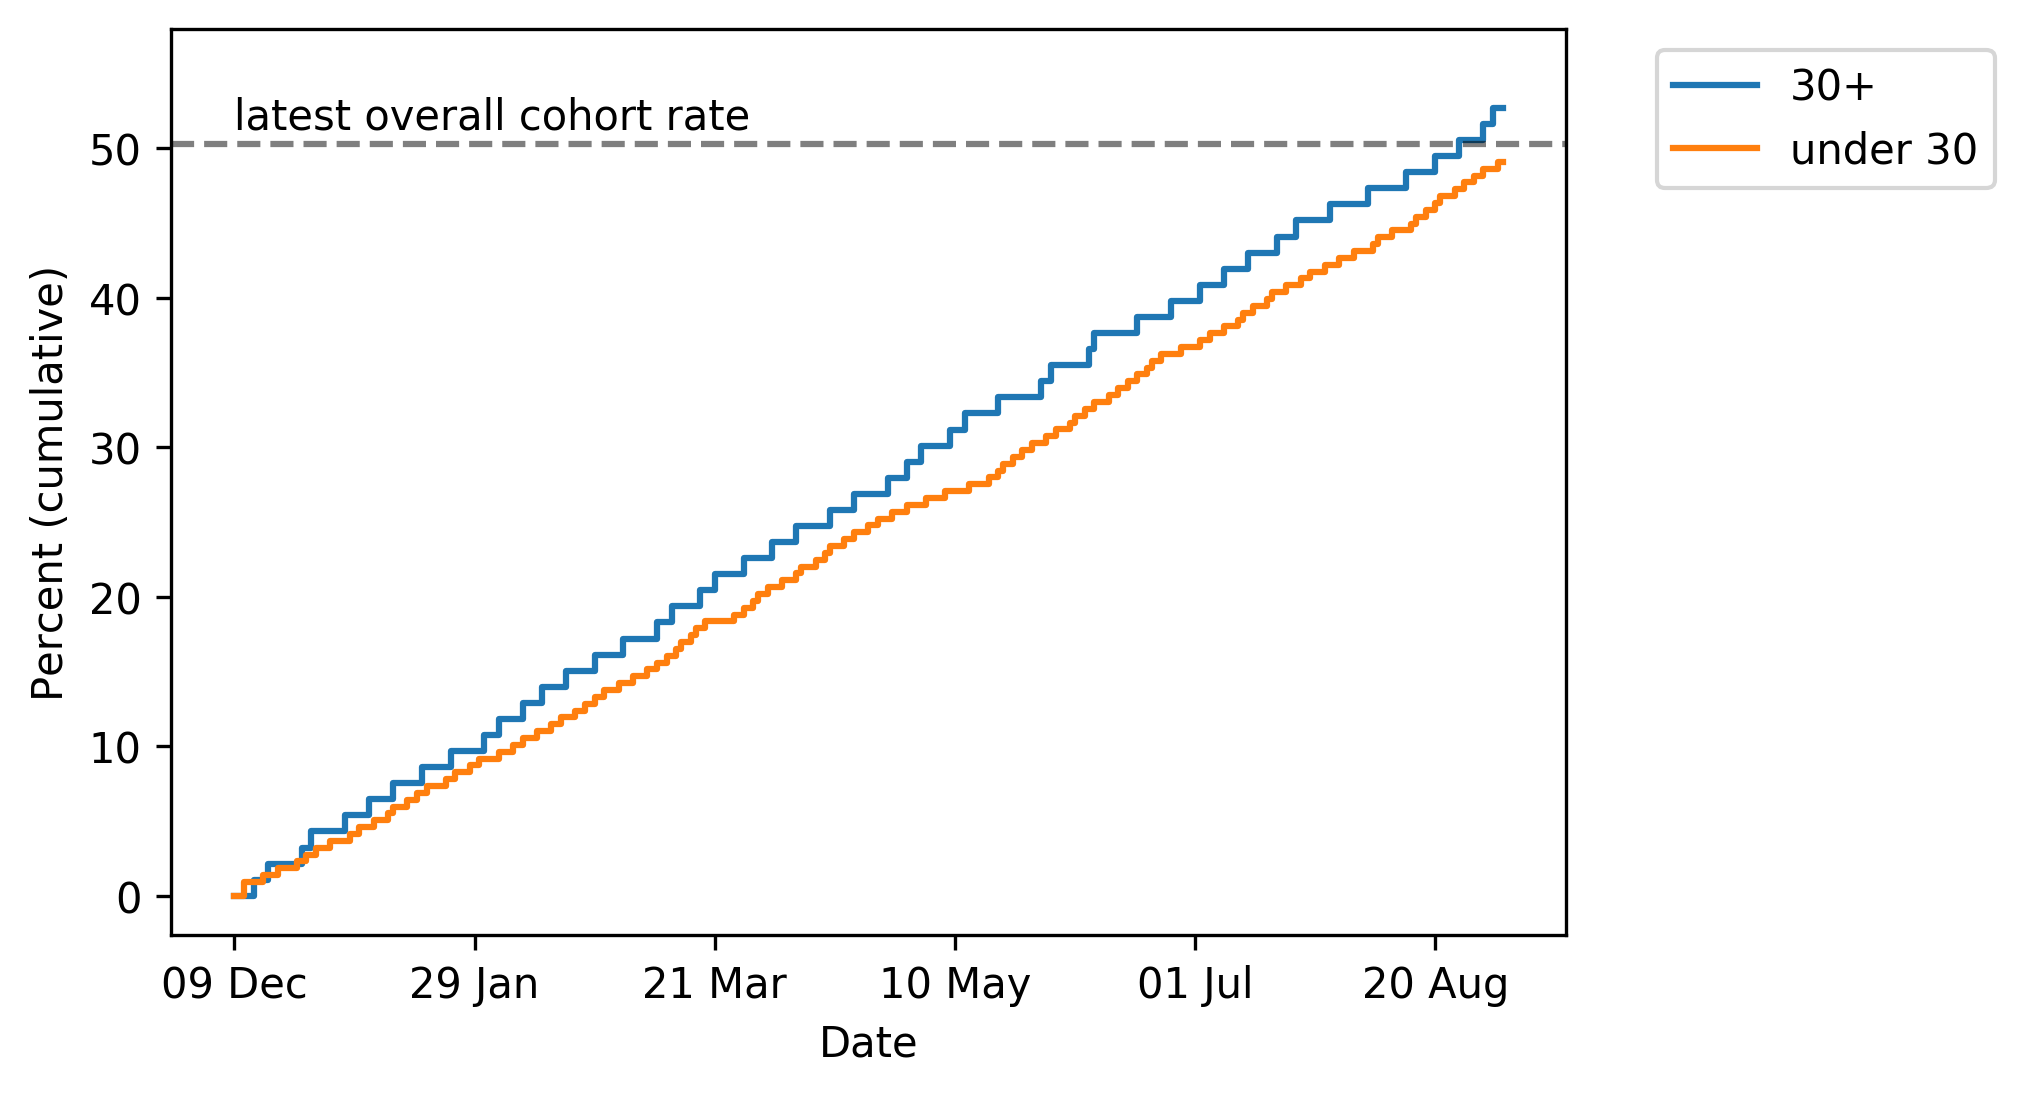

### COVID vaccinations among 65-69 population
 ### by Dementia

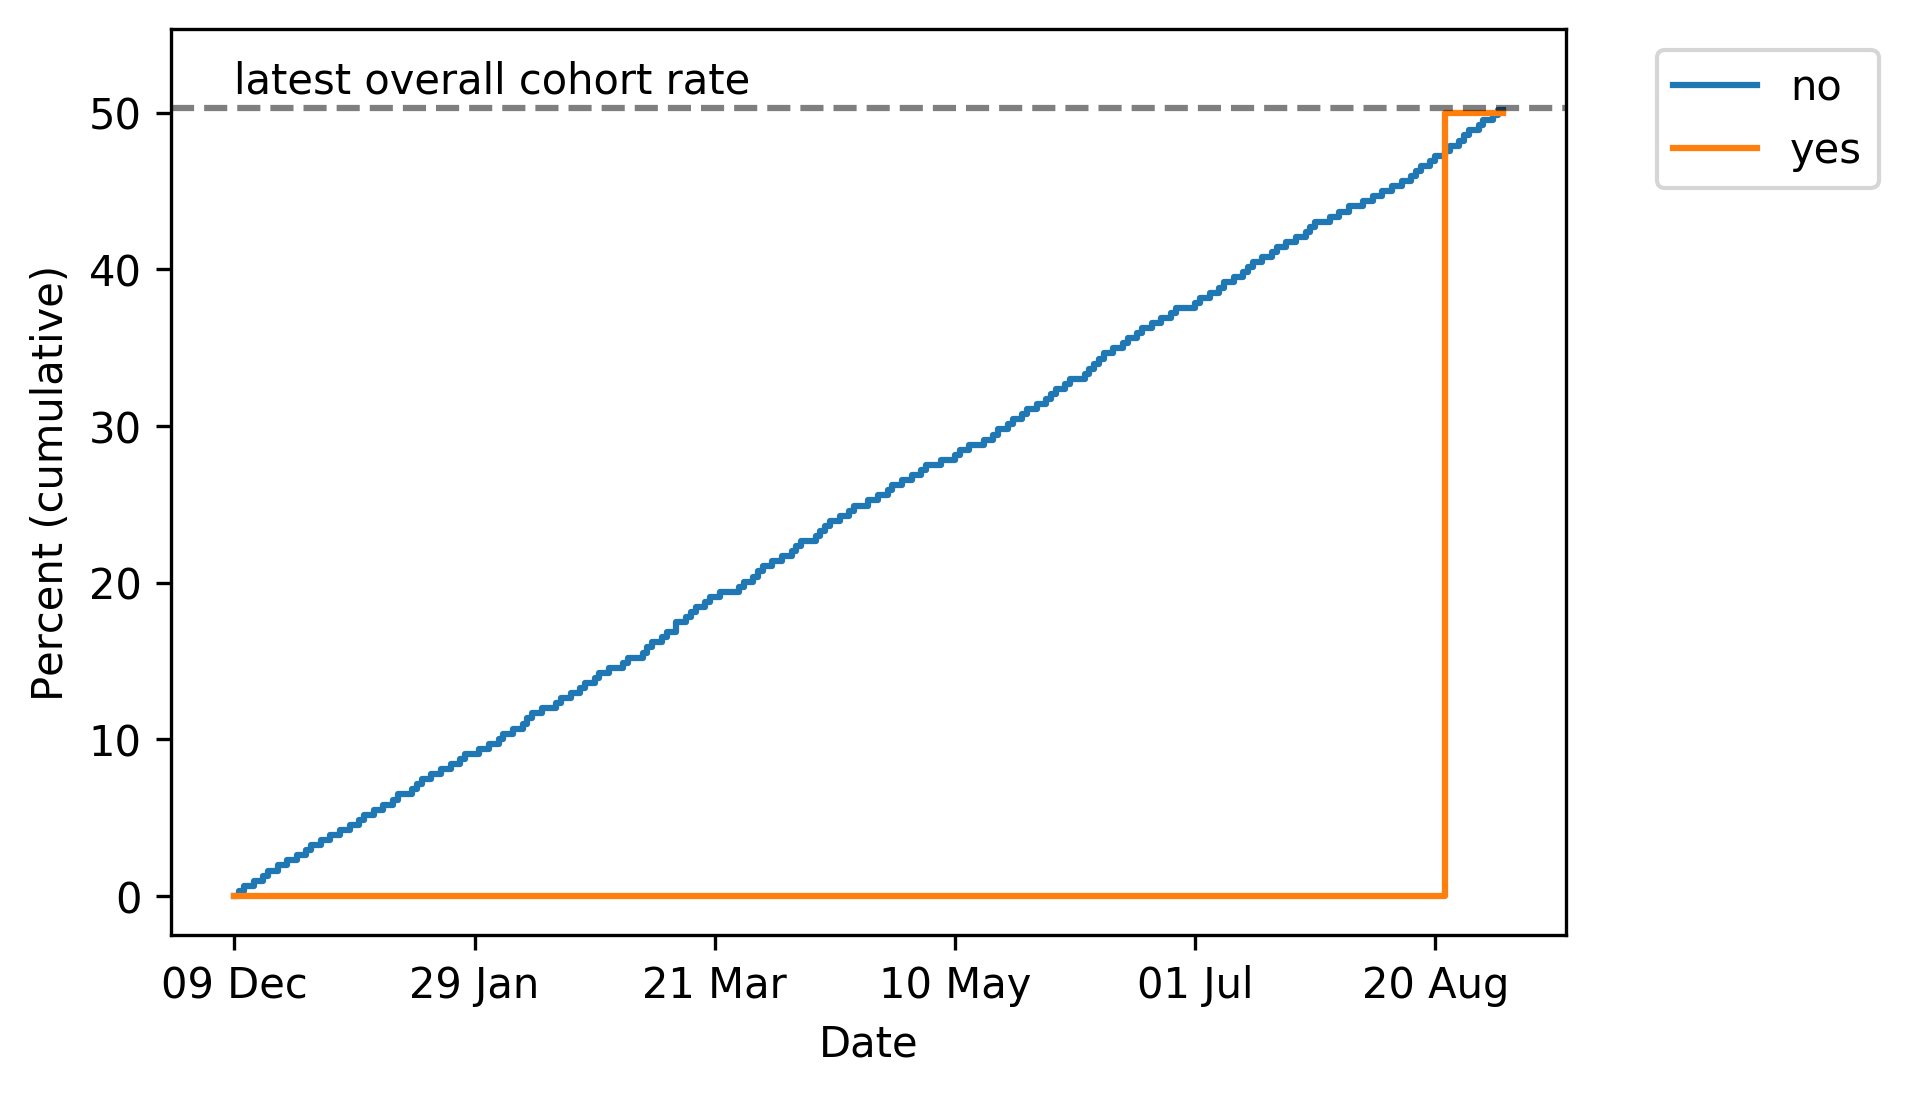

### COVID vaccinations among 65-69 population
 ### by Learning disability

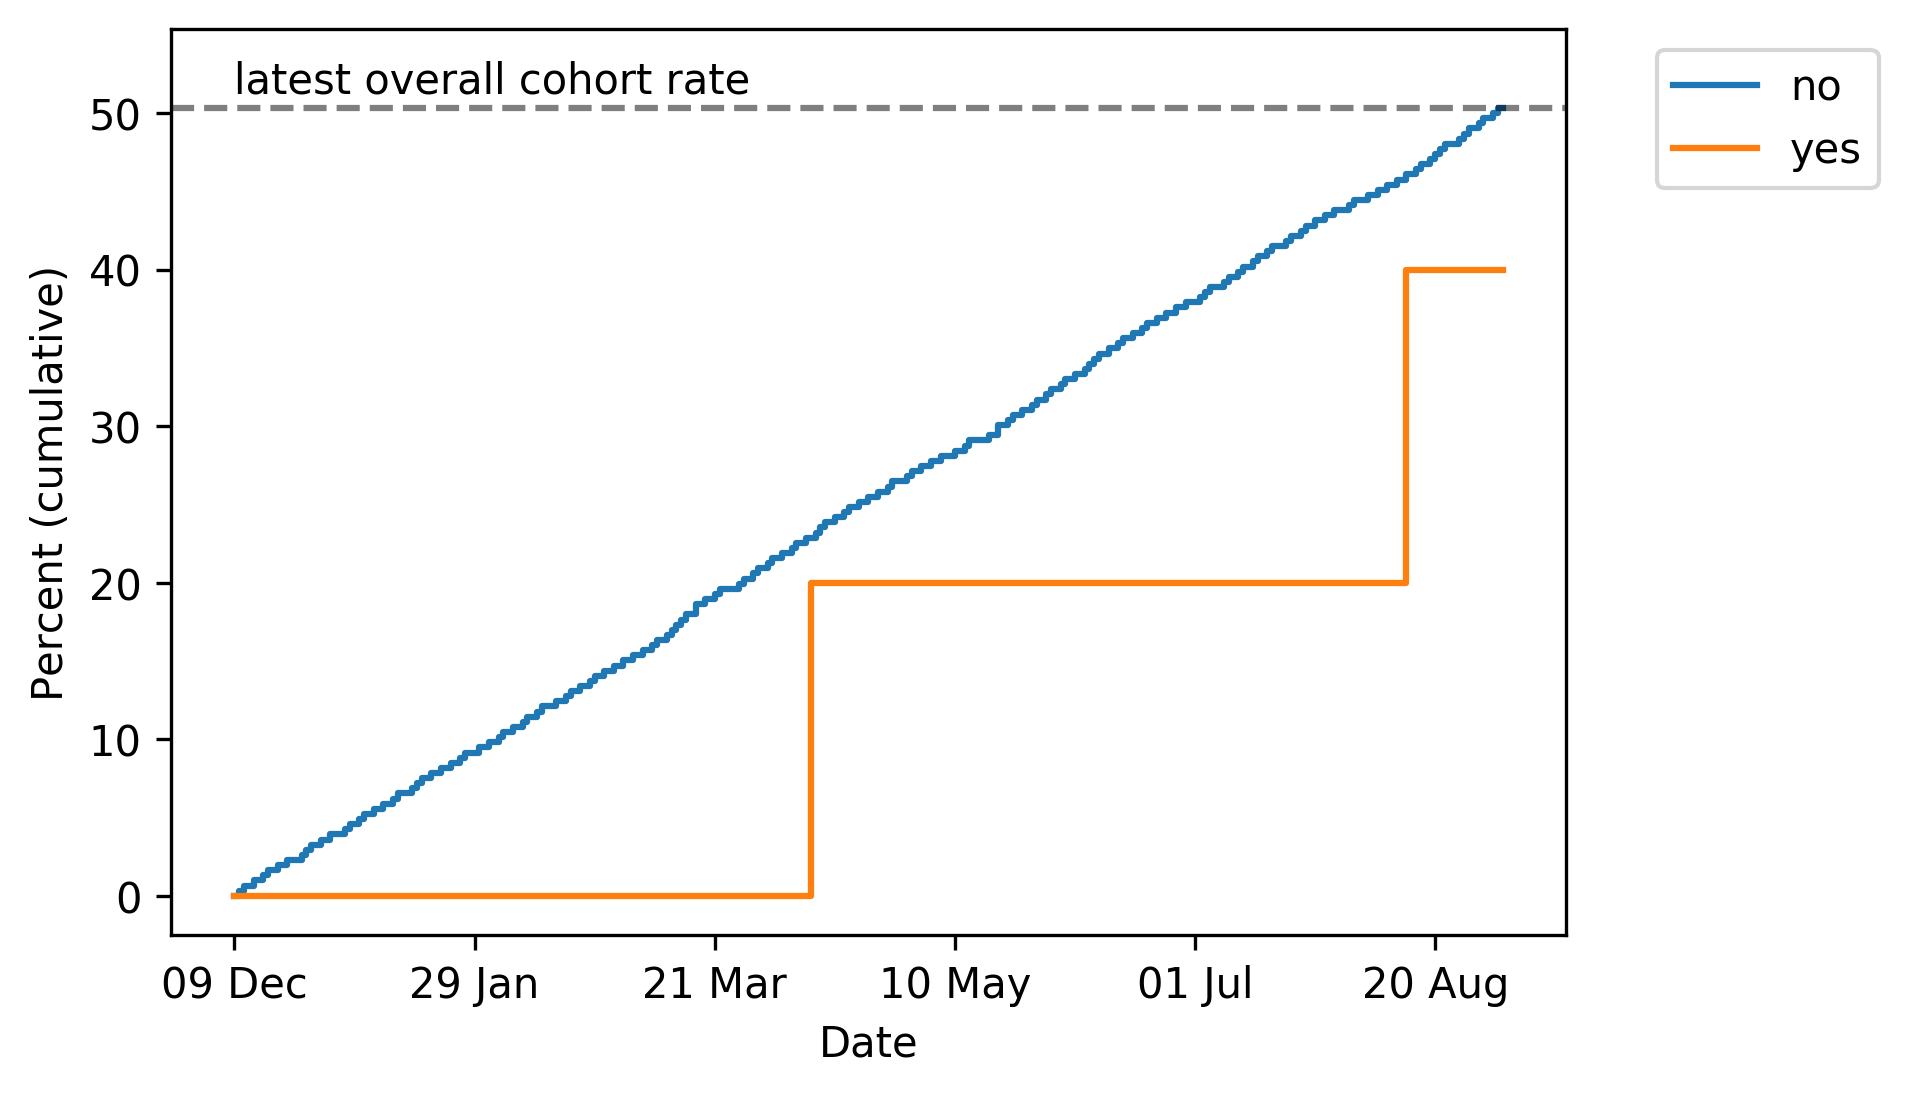

### COVID vaccinations among 65-69 population
 ### by Psychosis, schizophrenia, or bipolar

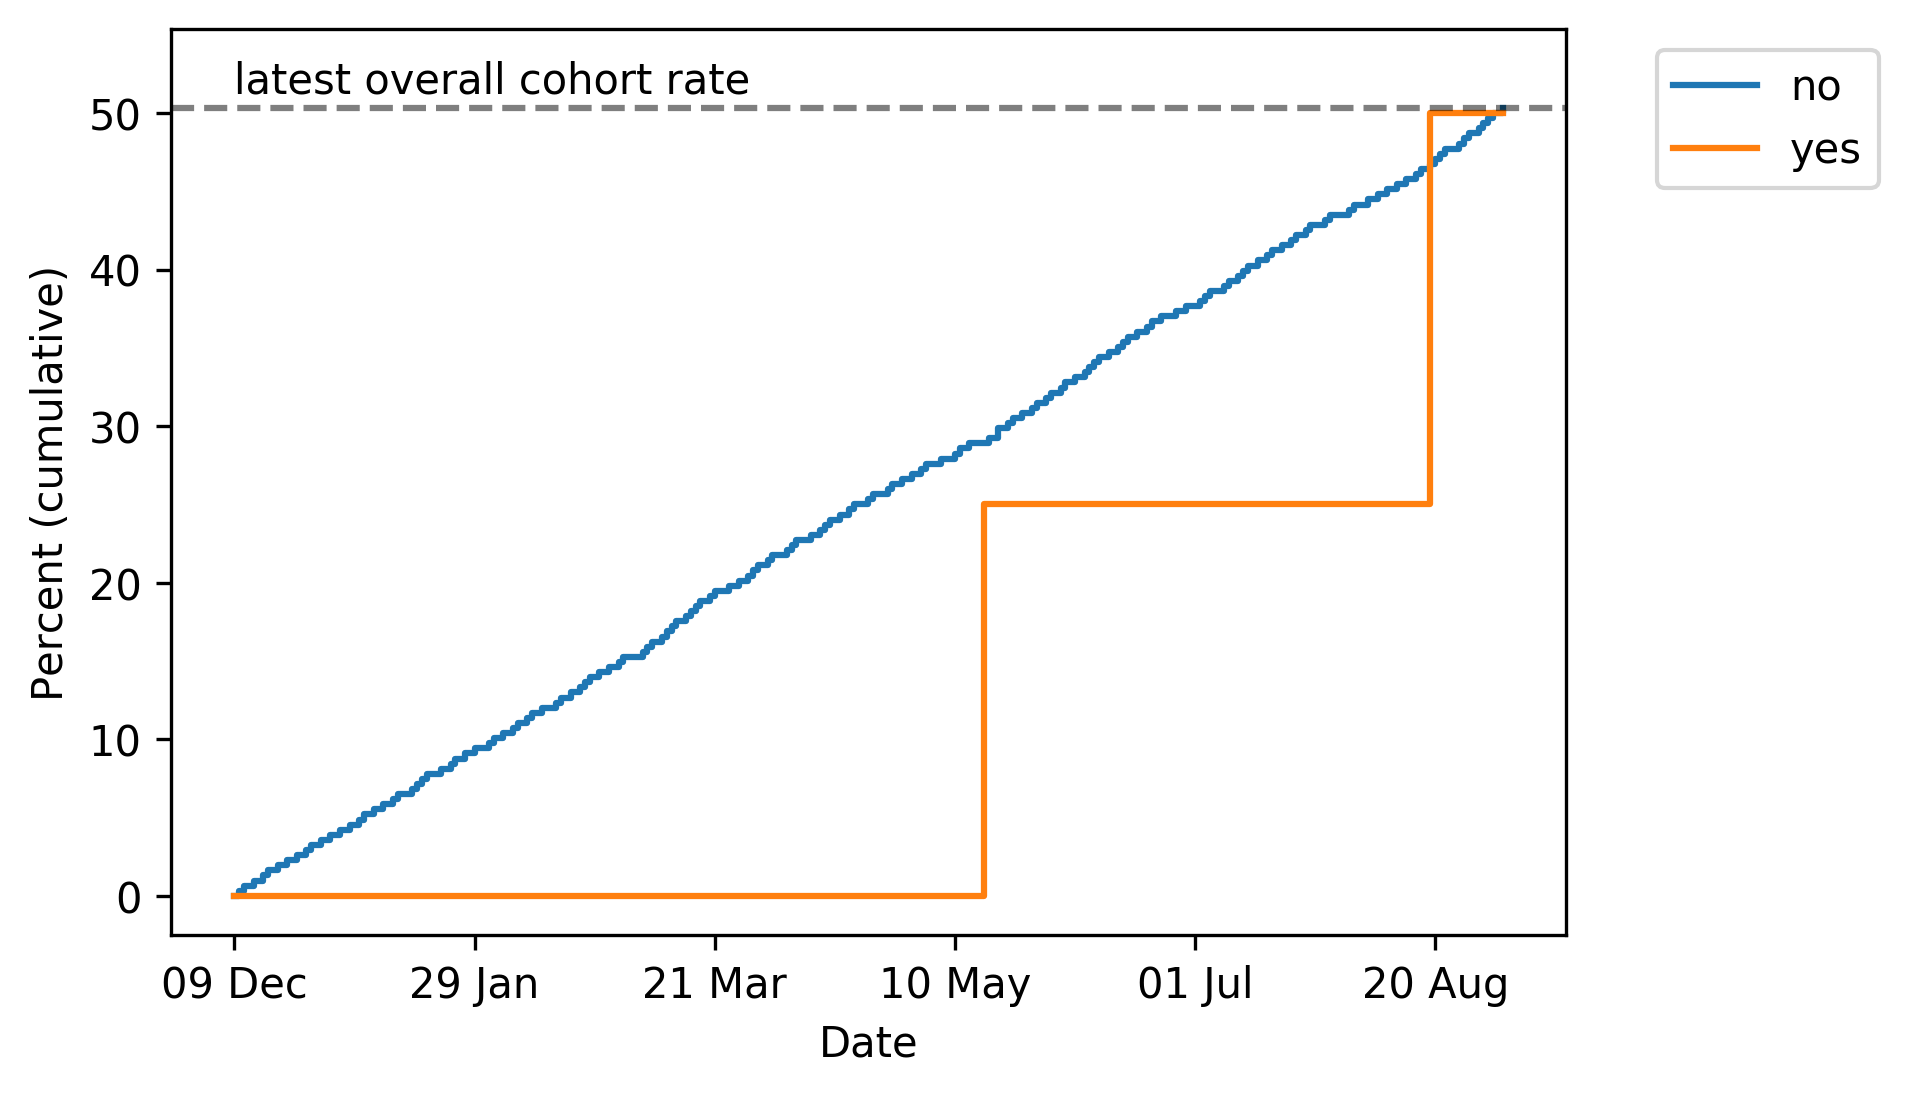

### COVID vaccinations among 65-69 population
 ### by SSRI (last 12 months)

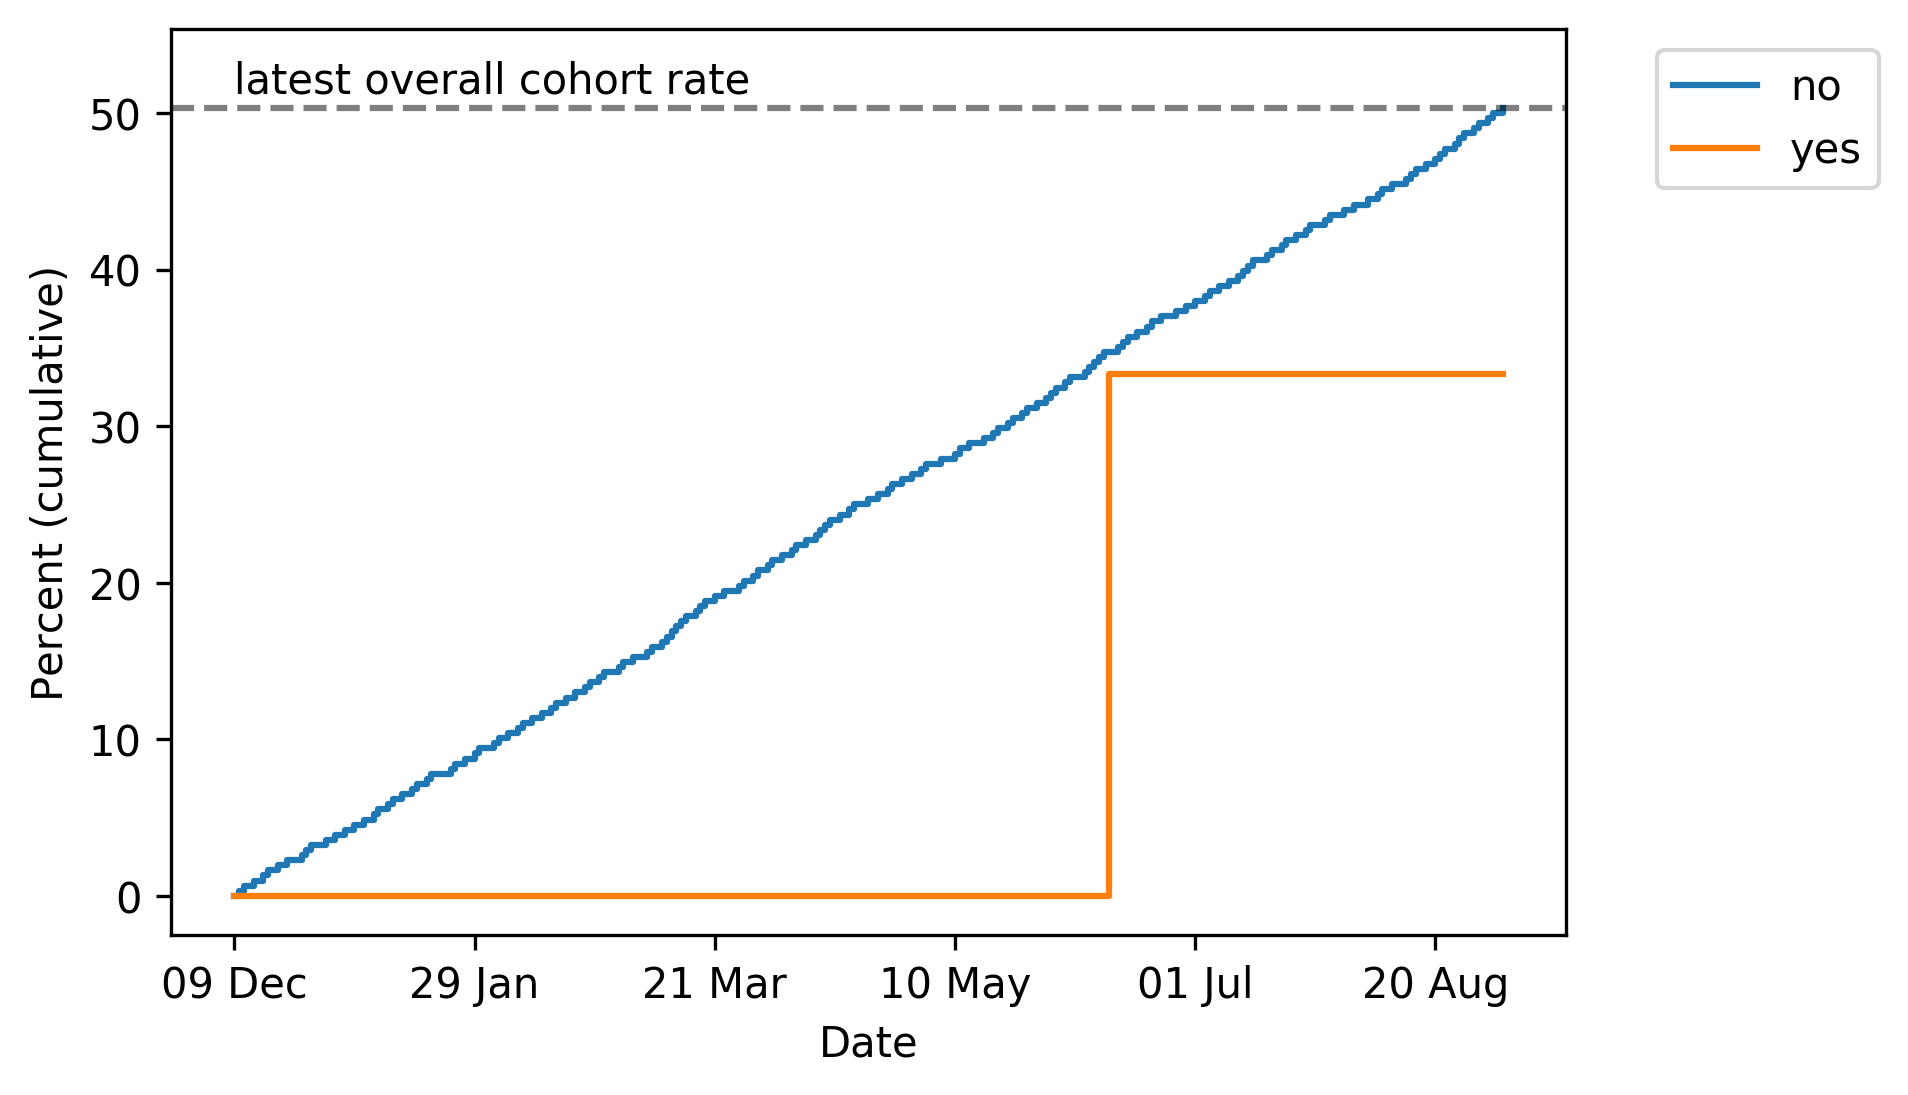

In [7]:
display(Markdown("## 65-69 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="65-69", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 60-64 population according to demographic/clinical features, cumulatively by day. <a name='charts60' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**


## 60-64 population

### COVID vaccinations among 60-64 population
 ### by Sex

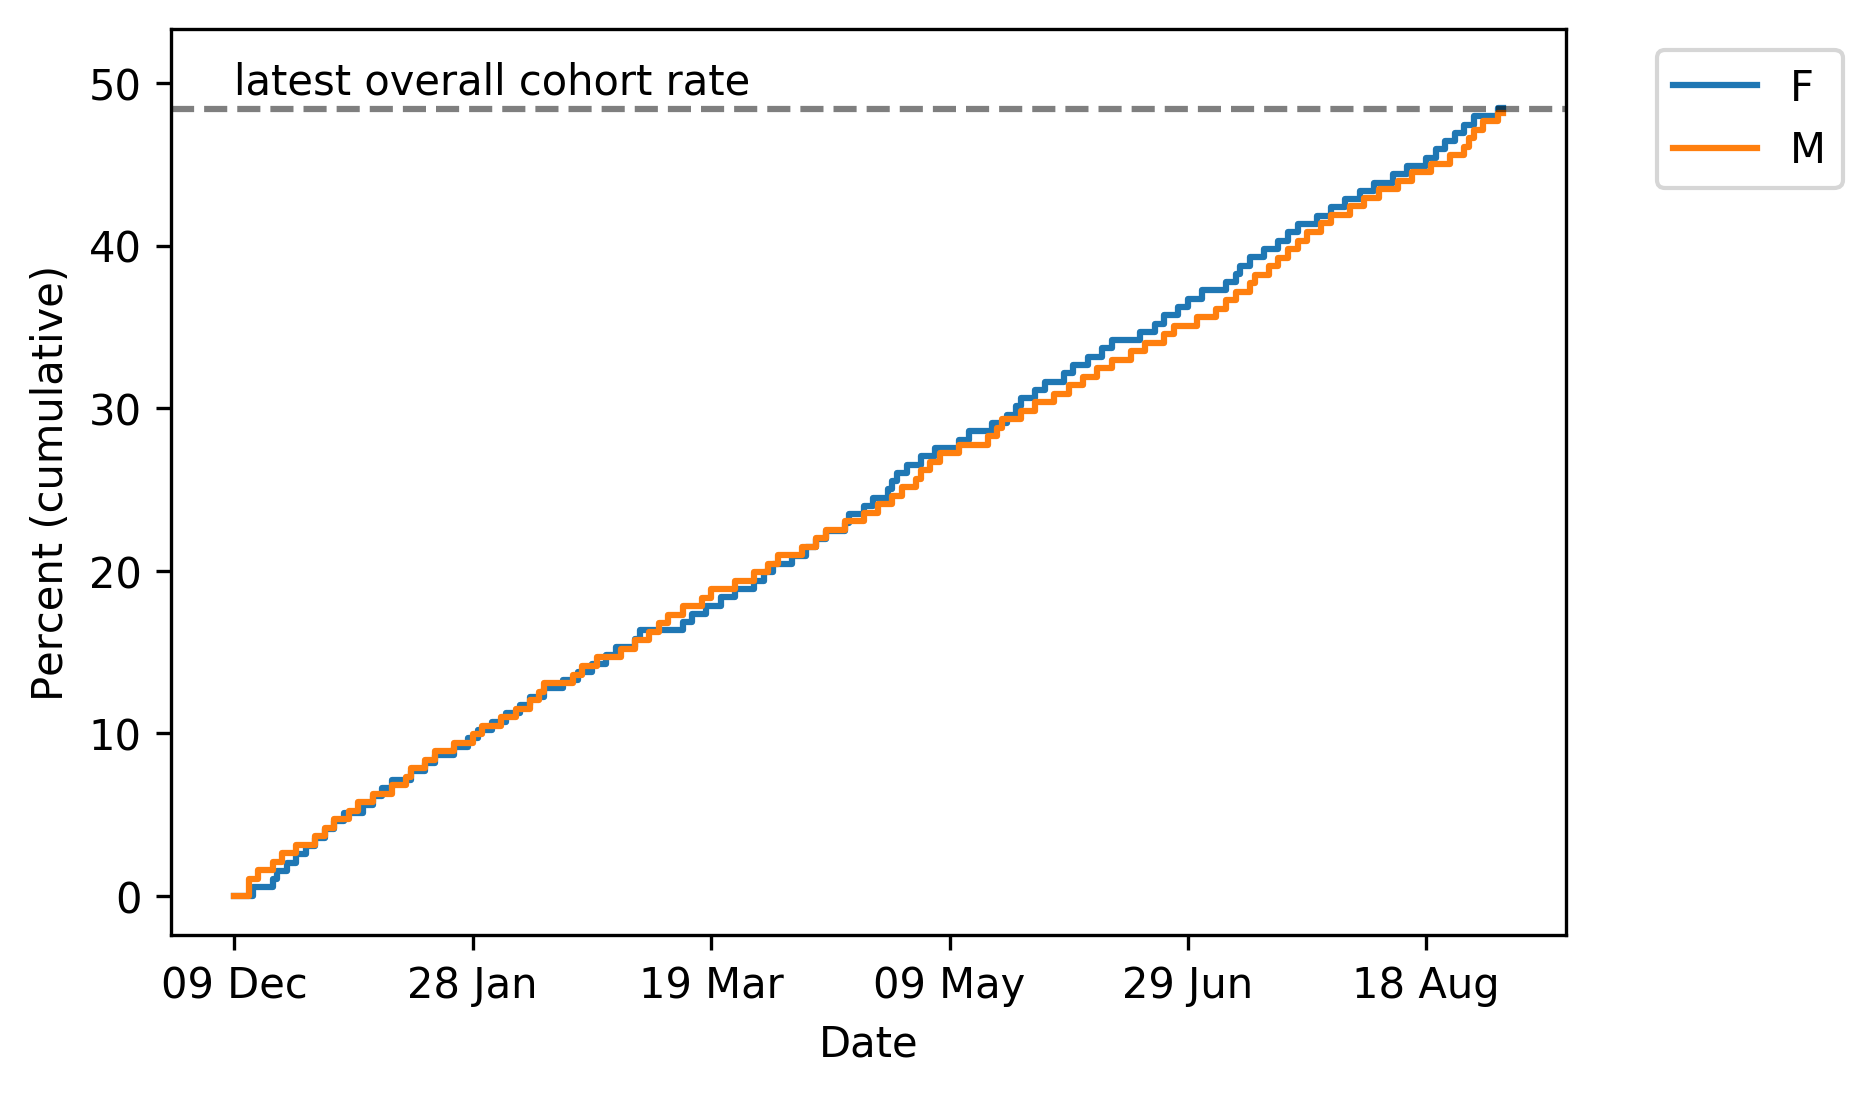

### COVID vaccinations among 60-64 population
 ### by Ethnicity (broad categories)

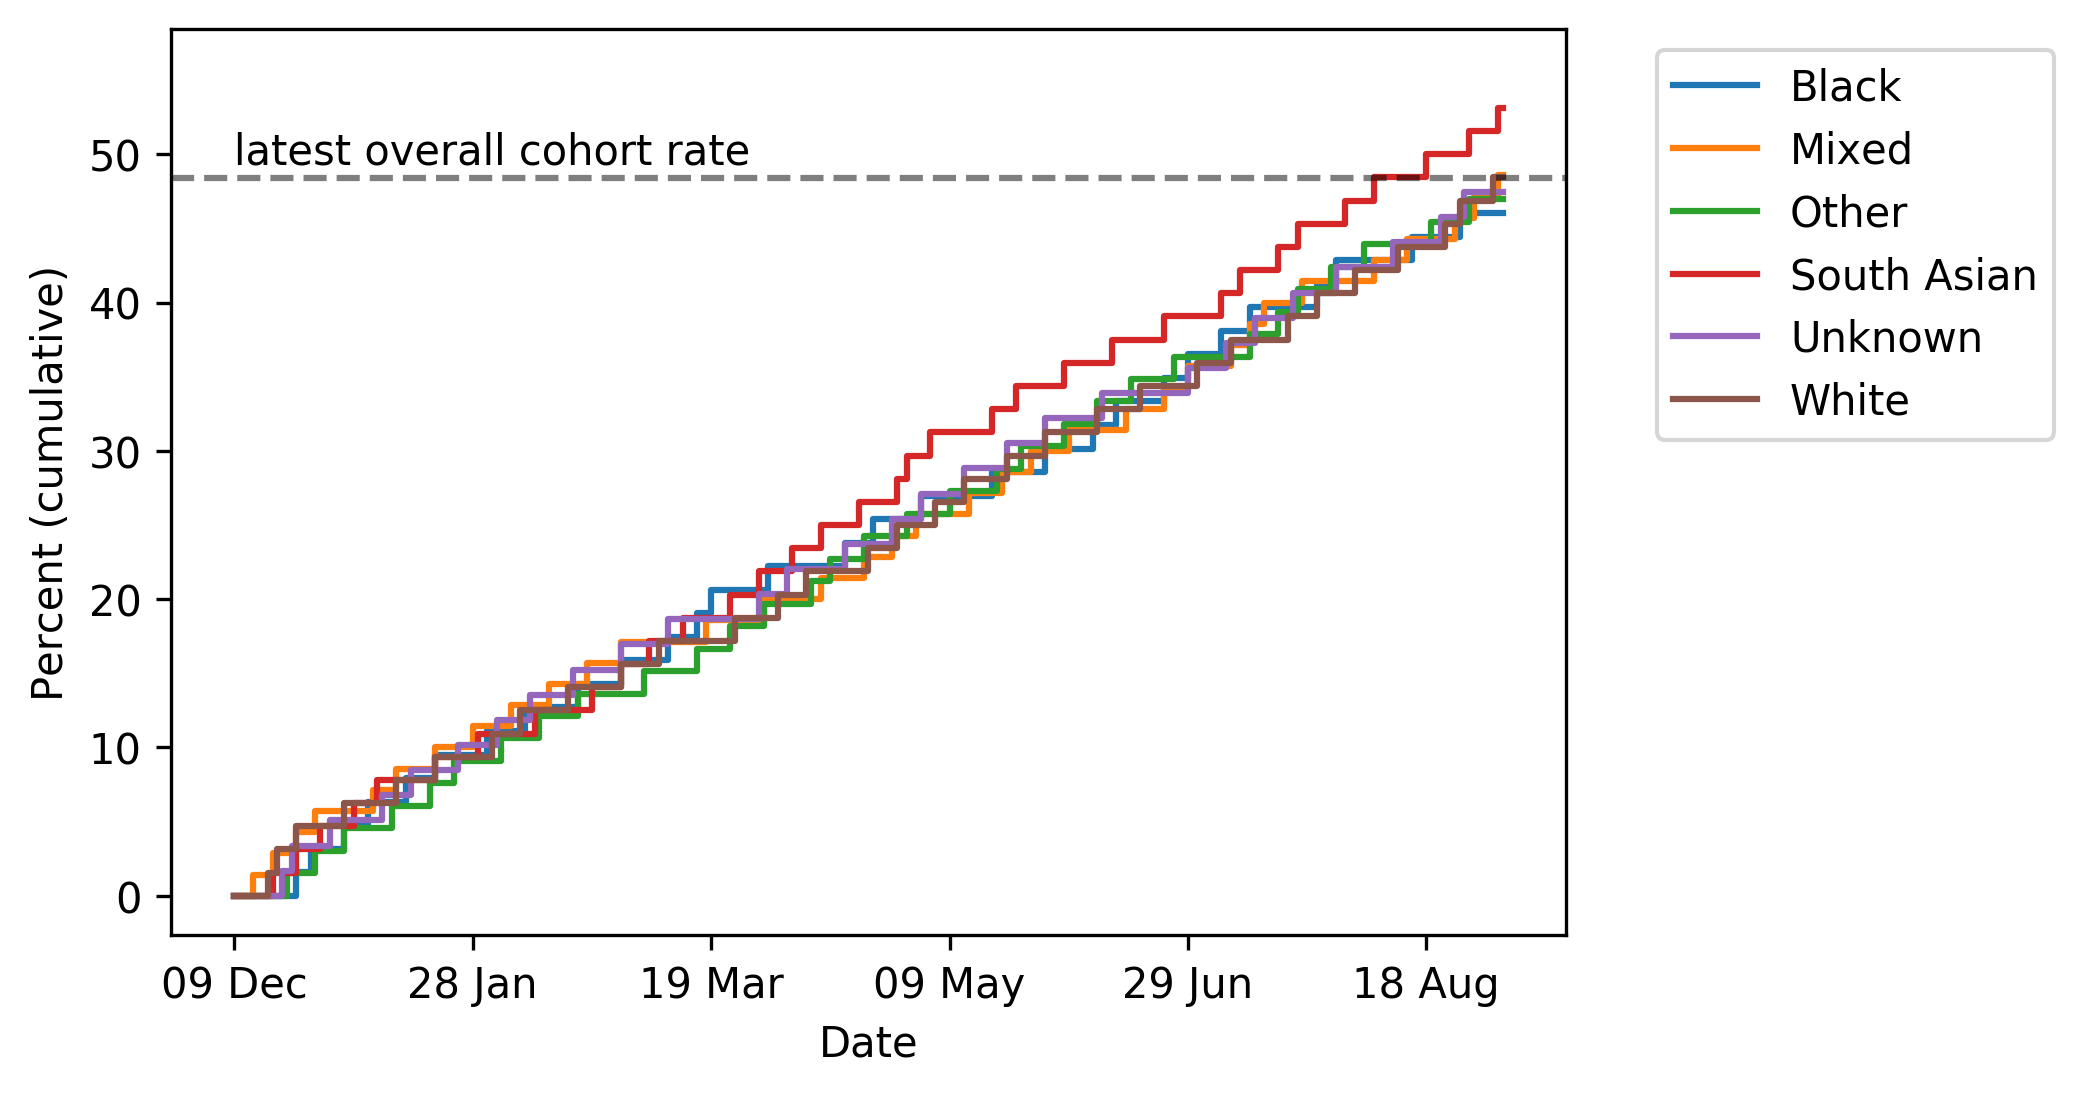

### COVID vaccinations among 60-64 population
 ### by Index of Multiple Deprivation (quintiles)

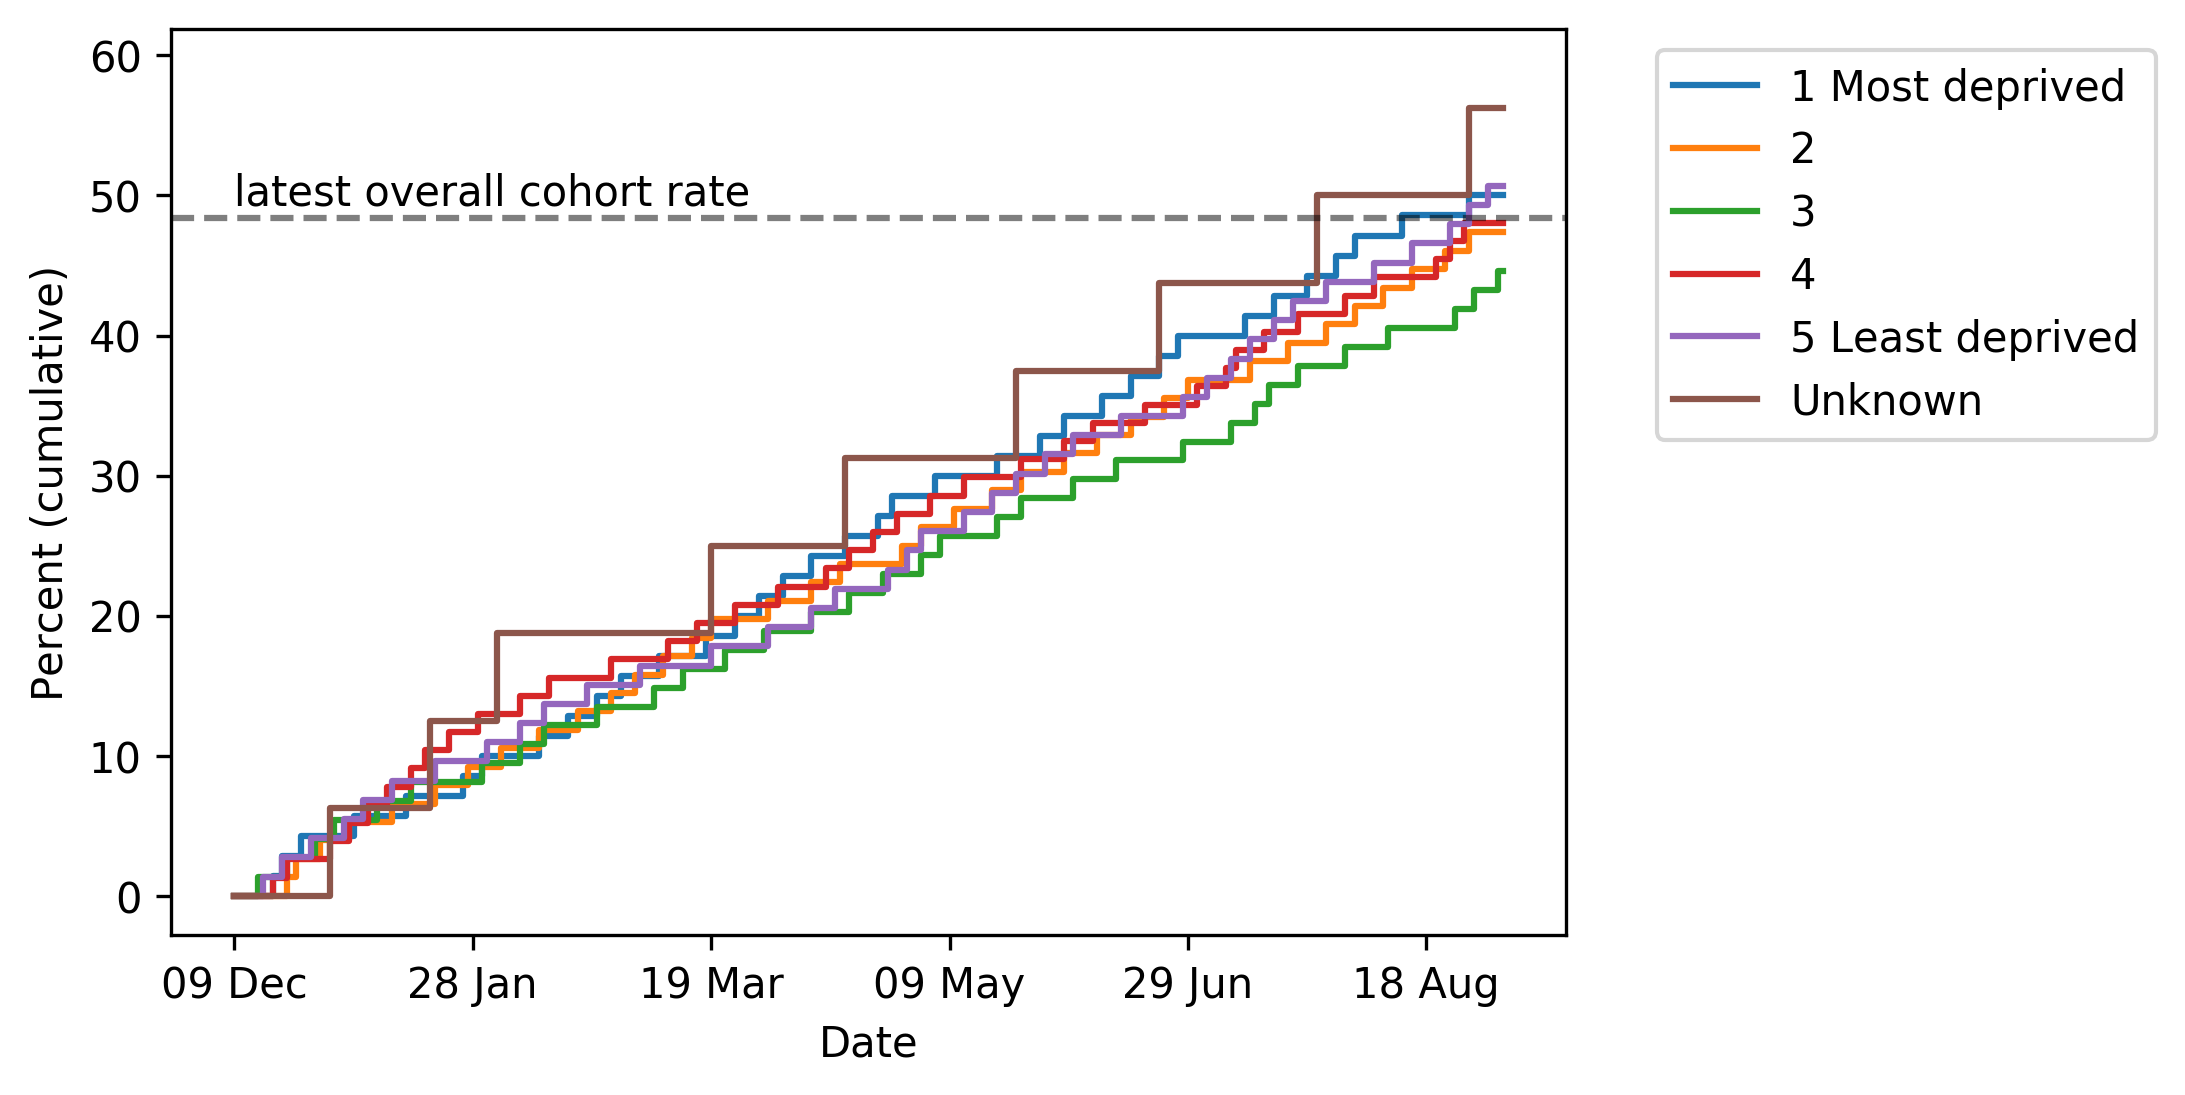

### COVID vaccinations among 60-64 population
 ### by BMI

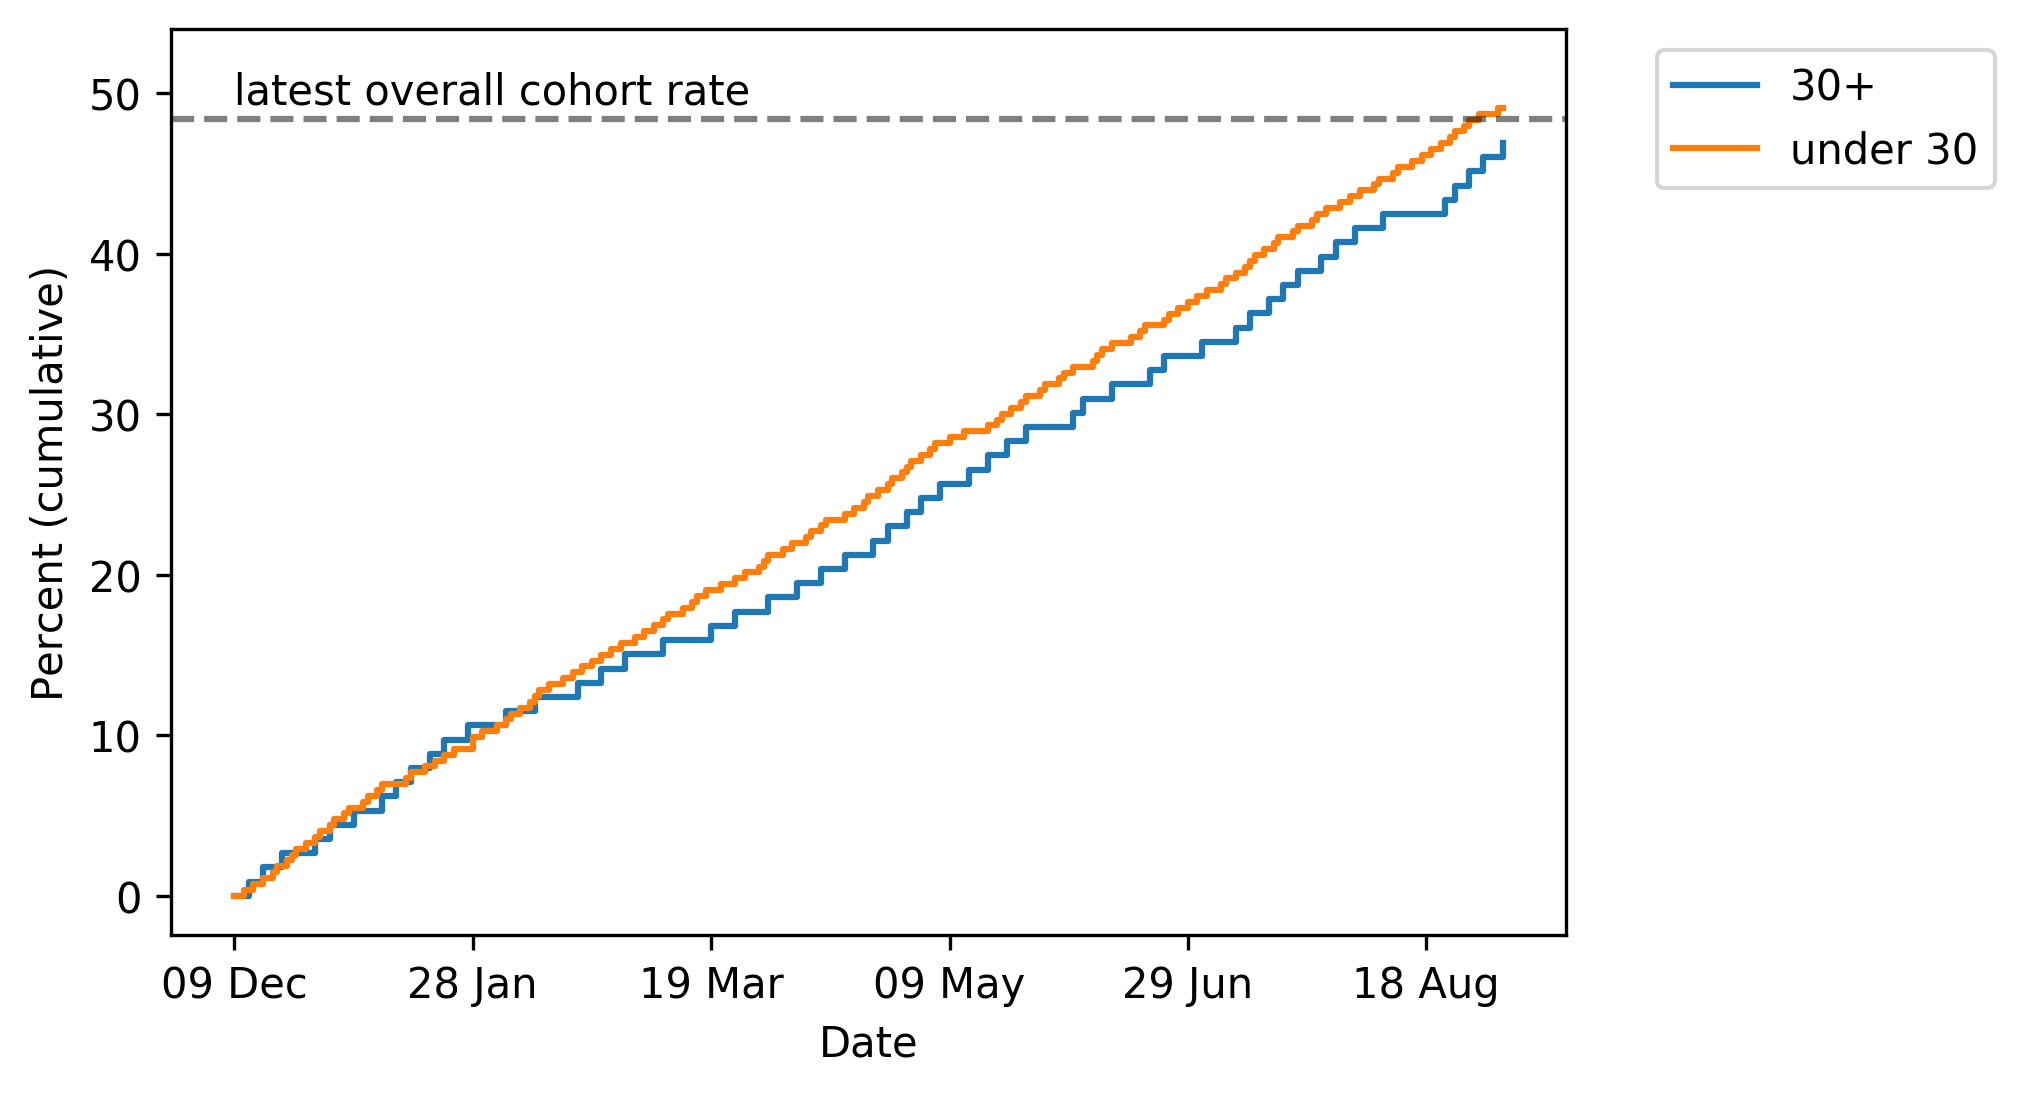

### COVID vaccinations among 60-64 population
 ### by Dementia

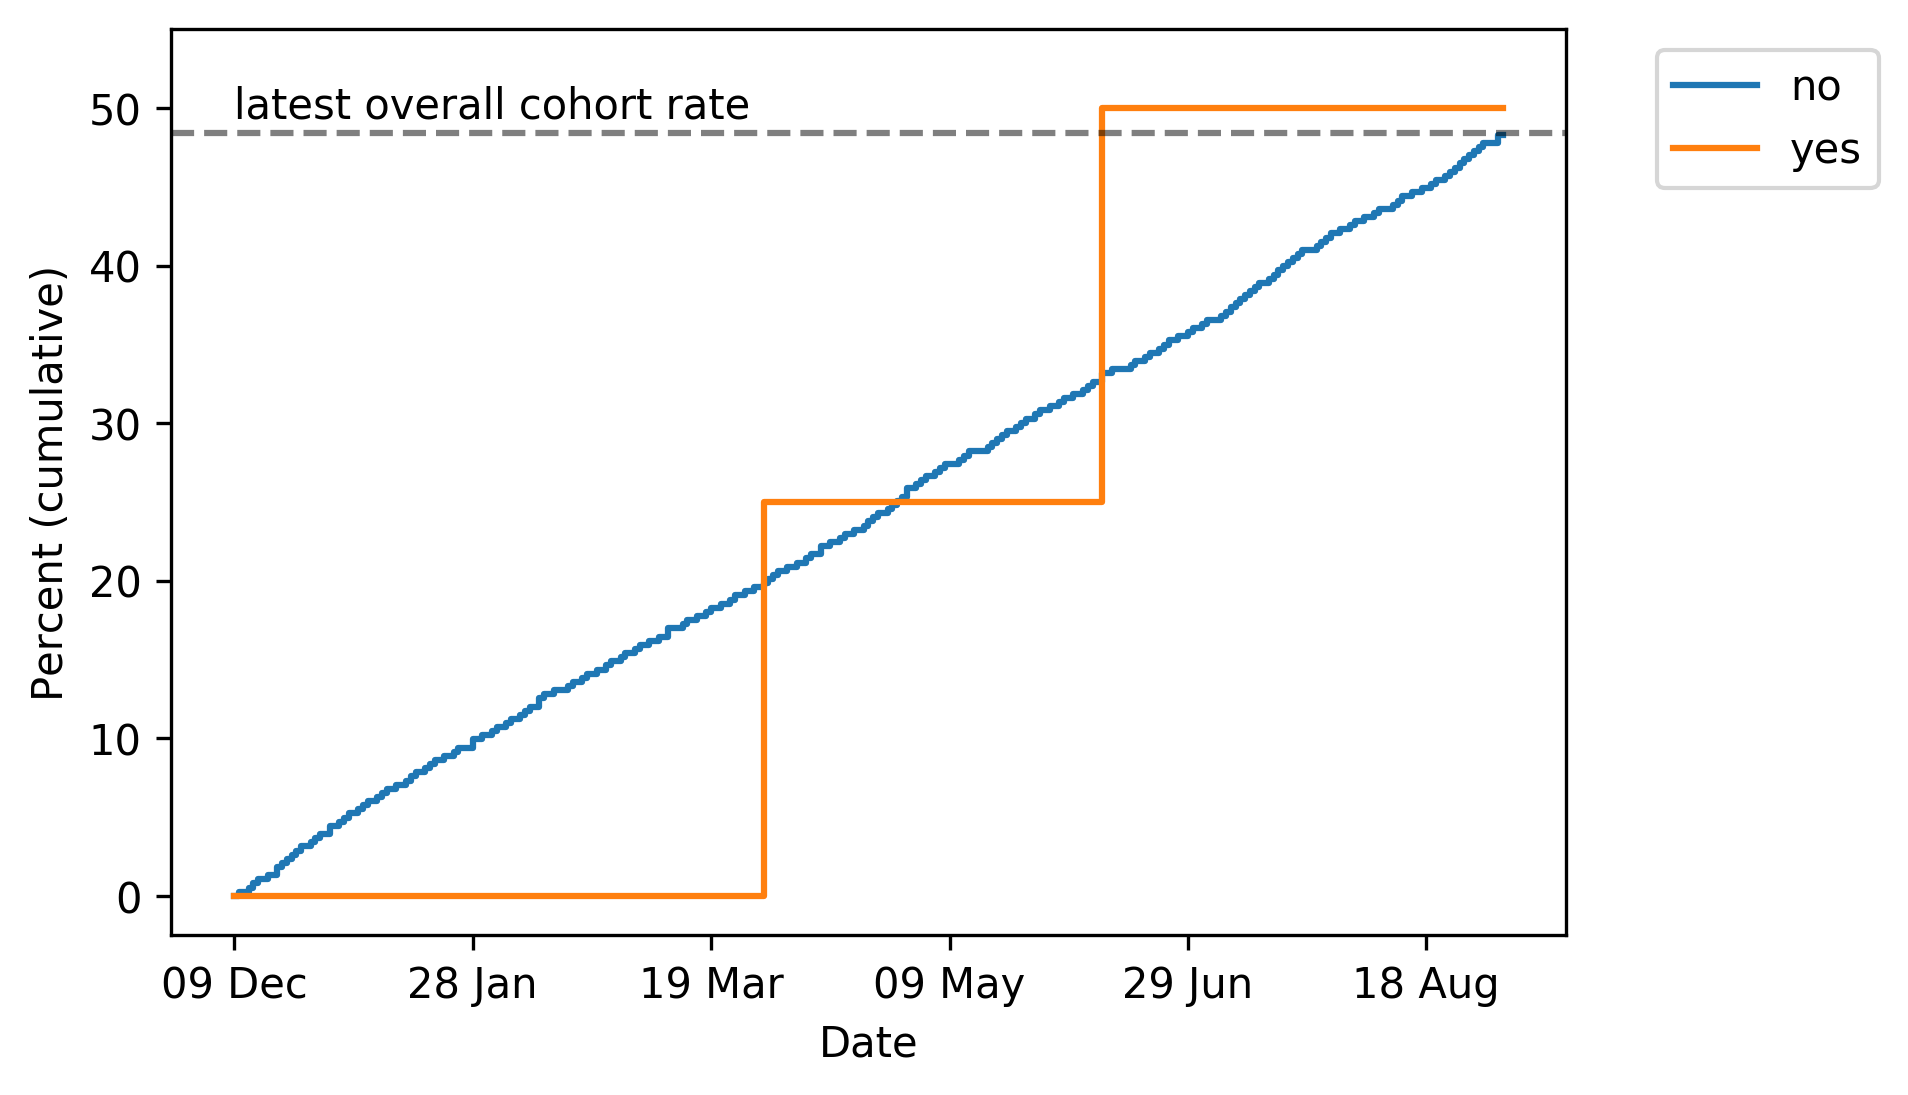

### COVID vaccinations among 60-64 population
 ### by Psychosis, schizophrenia, or bipolar

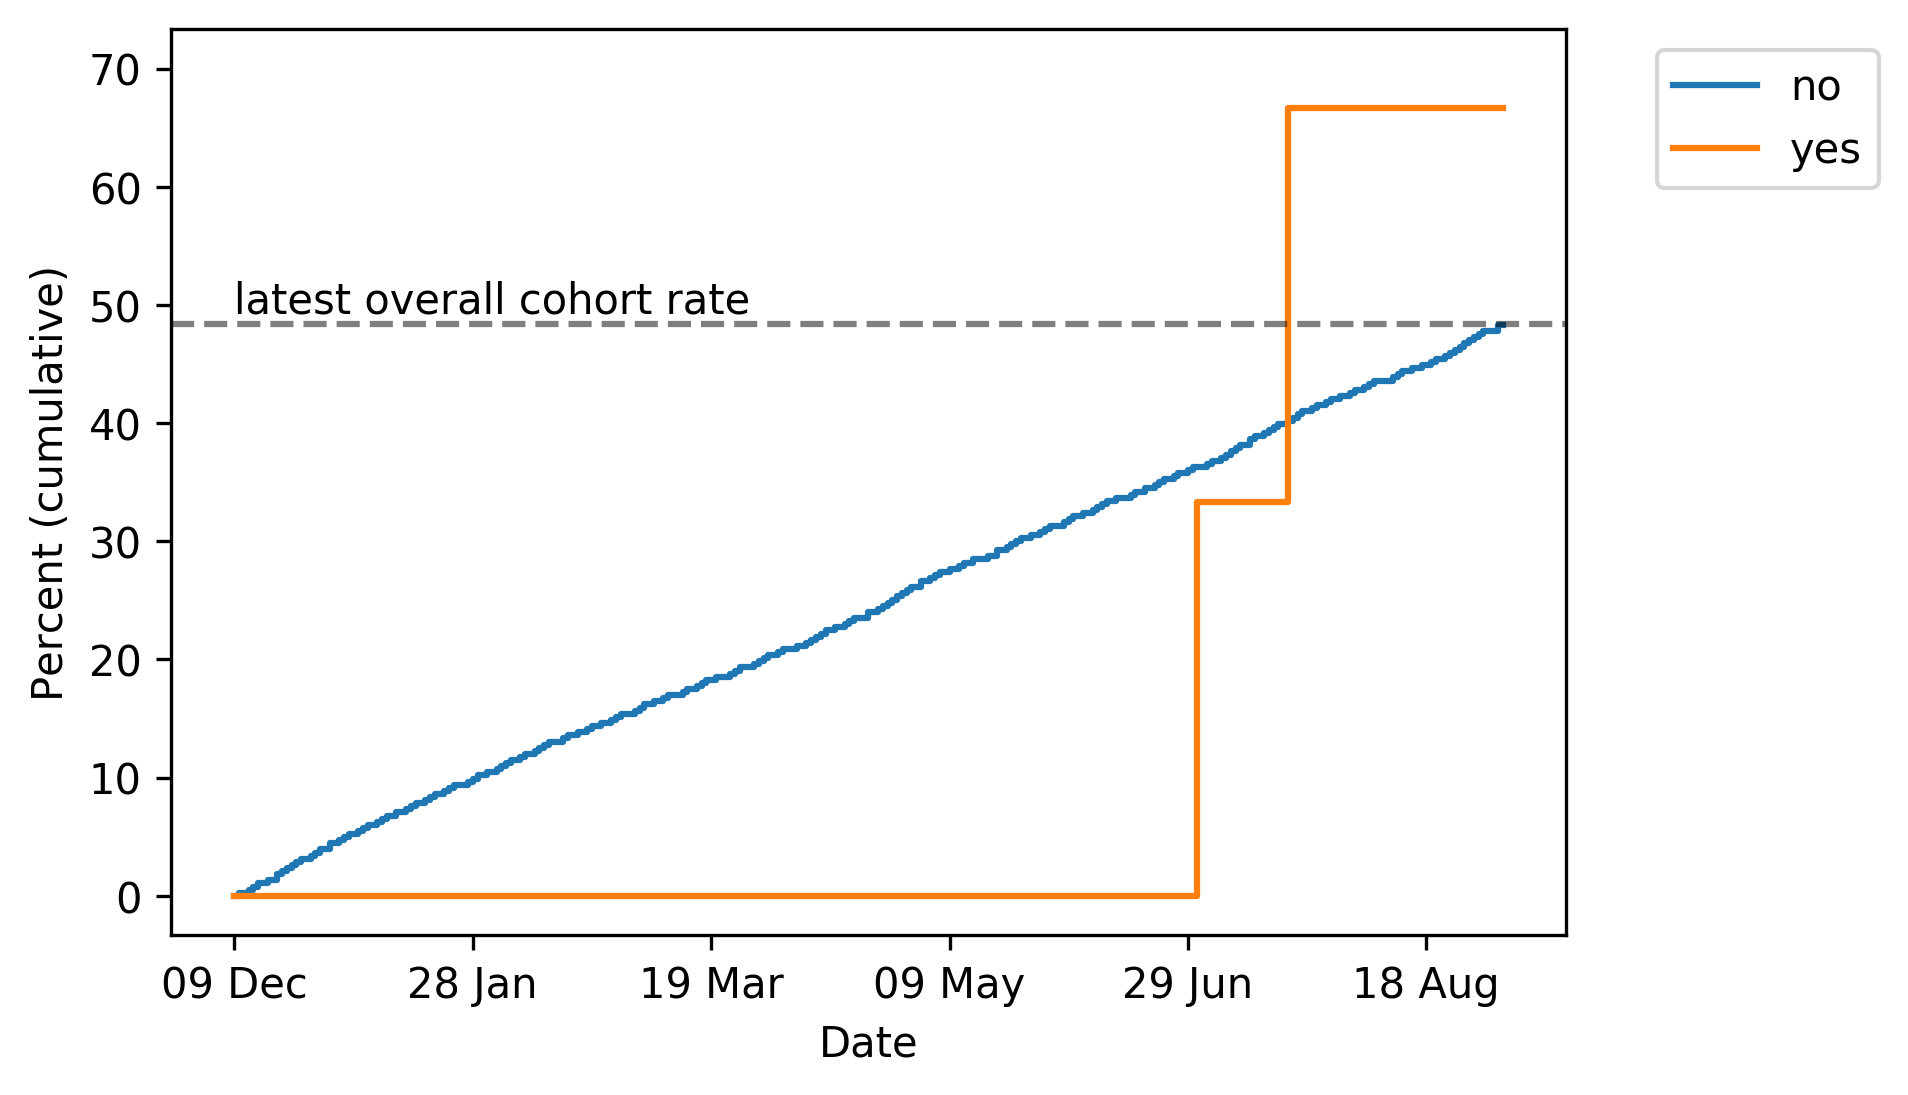

### COVID vaccinations among 60-64 population
 ### by SSRI (last 12 months)

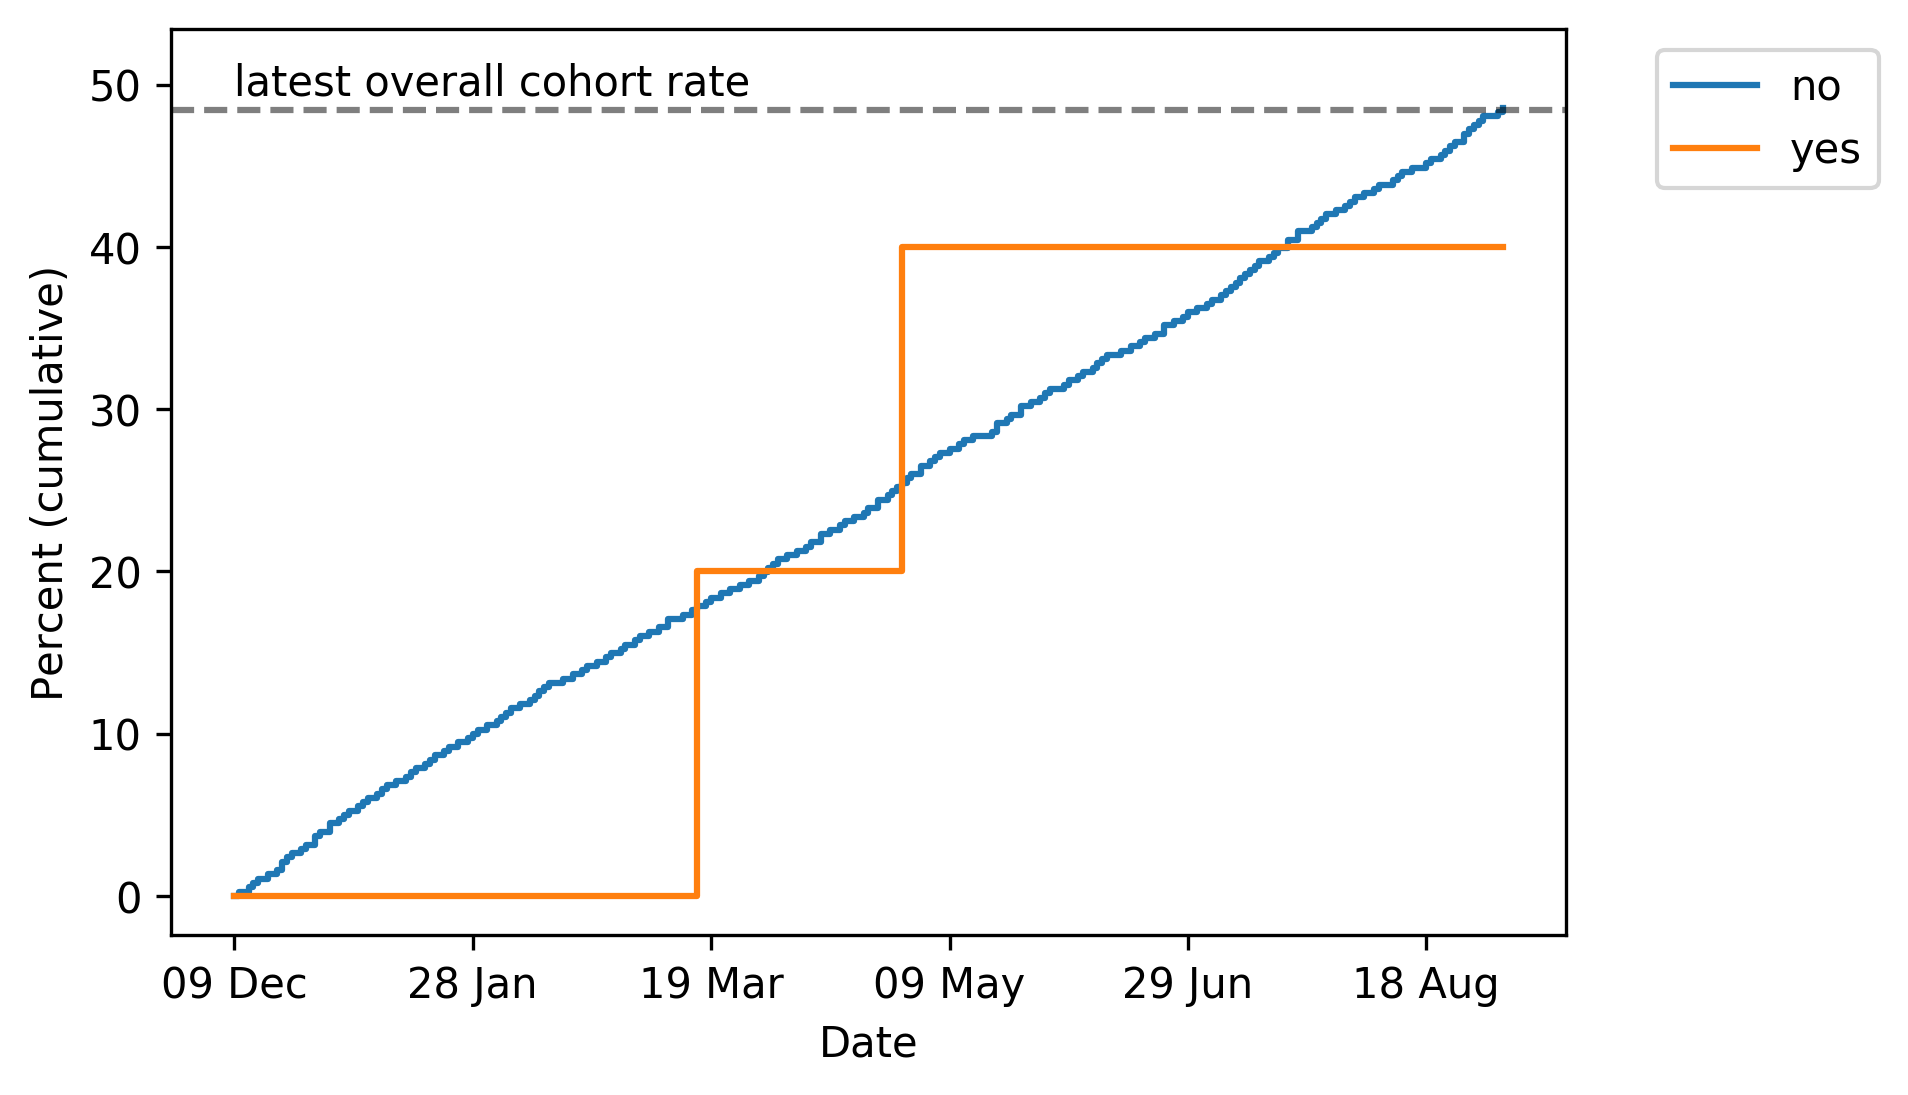

In [8]:
display(Markdown("## 60-64 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="60-64", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 55-59 population according to demographic/clinical features, cumulatively by day. <a name='charts55' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 55-59 population

### COVID vaccinations among 55-59 population
 ### by Sex

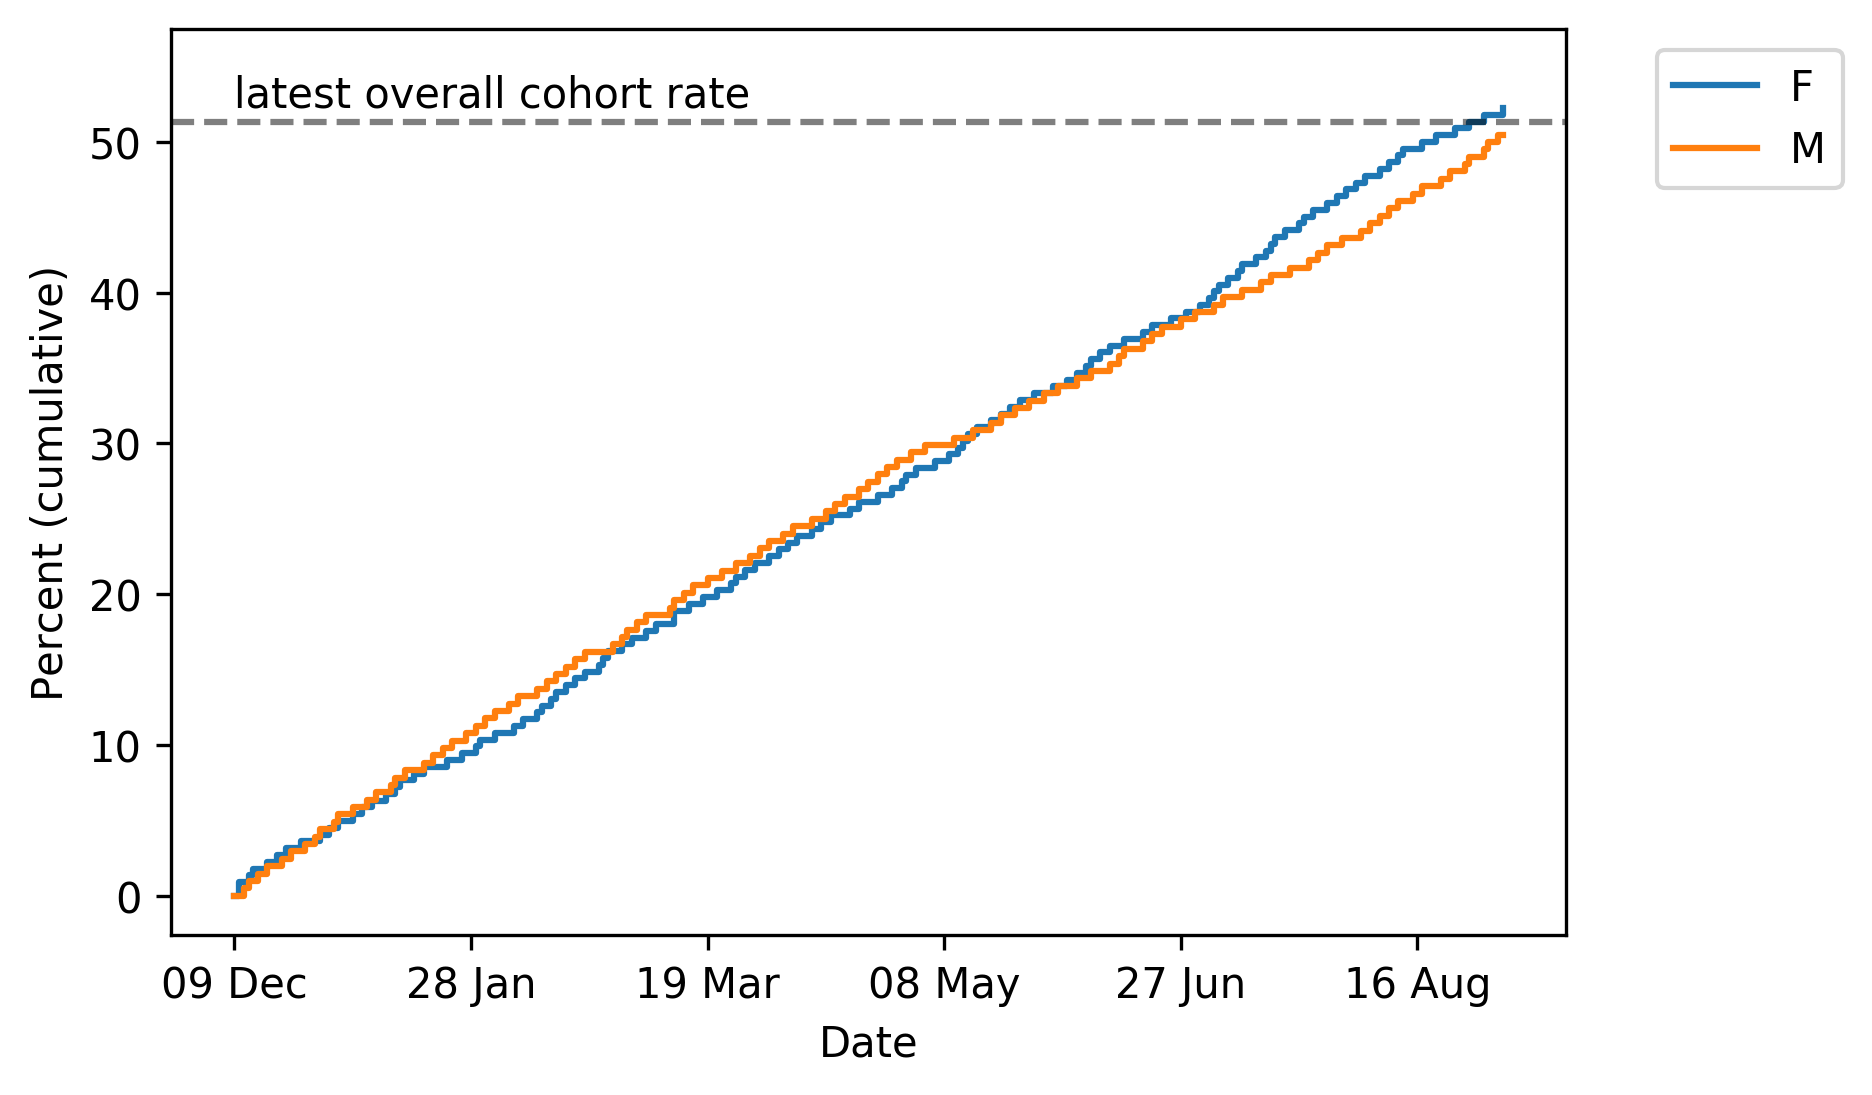

### COVID vaccinations among 55-59 population
 ### by Ethnicity (broad categories)

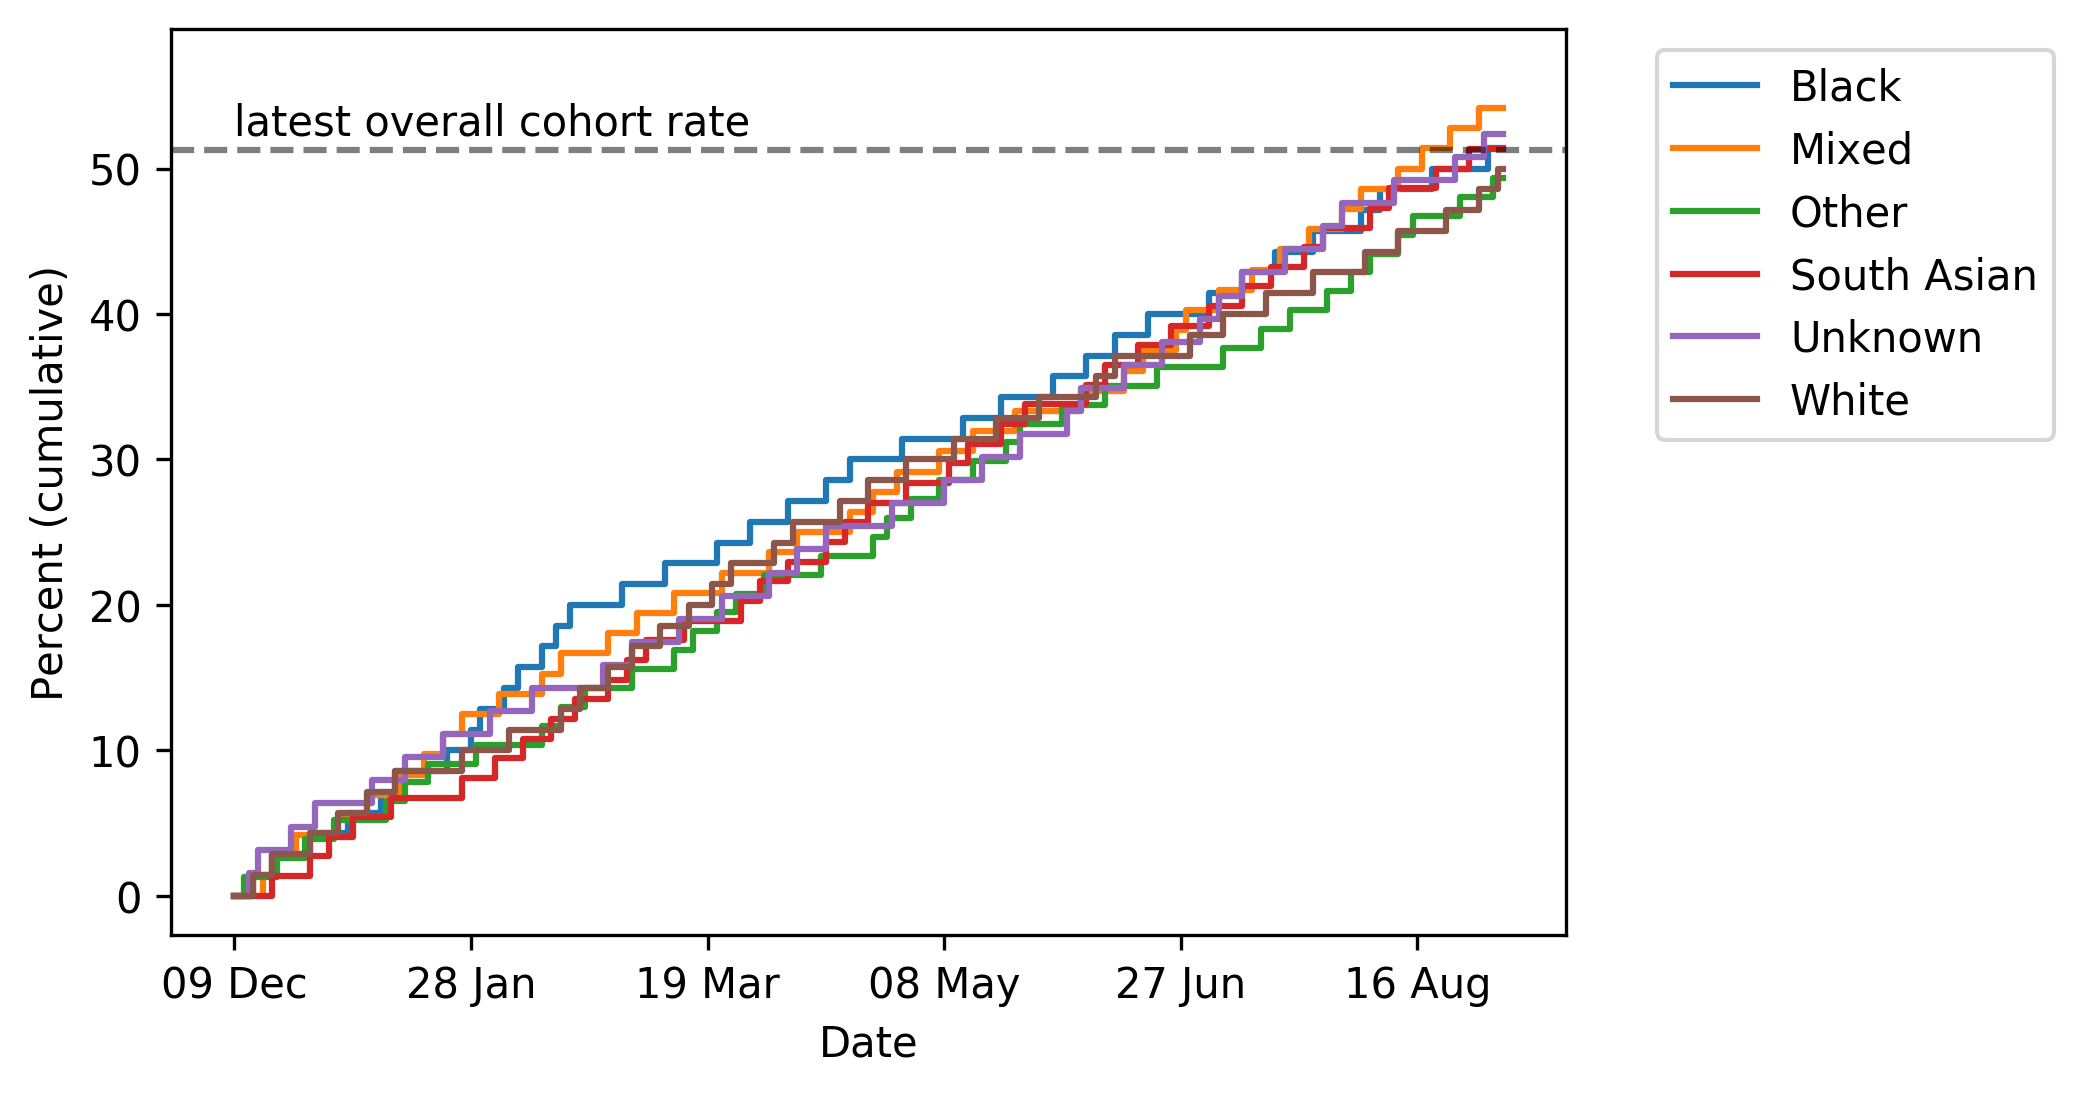

### COVID vaccinations among 55-59 population
 ### by Index of Multiple Deprivation (quintiles)

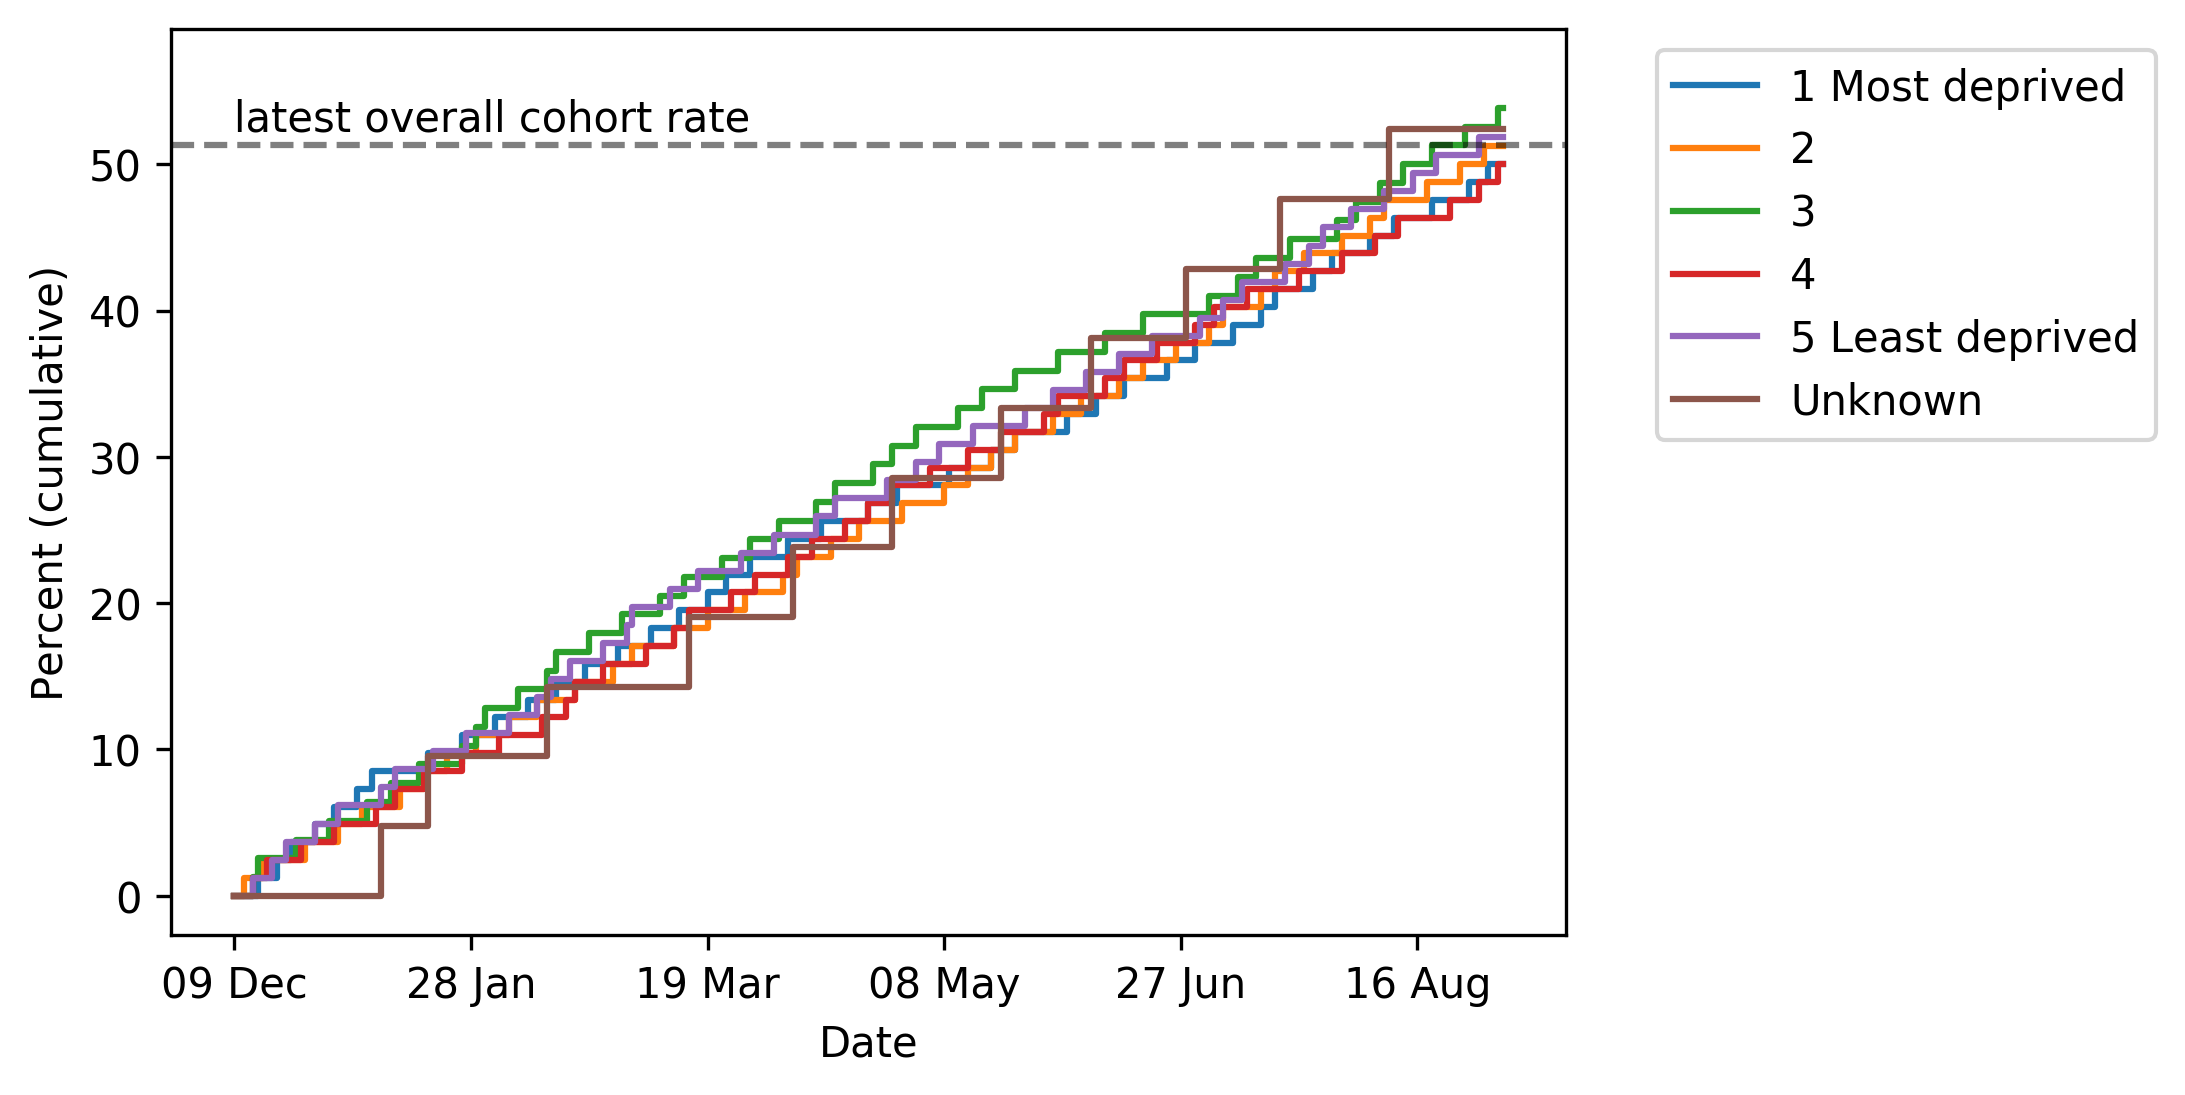

### COVID vaccinations among 55-59 population
 ### by BMI

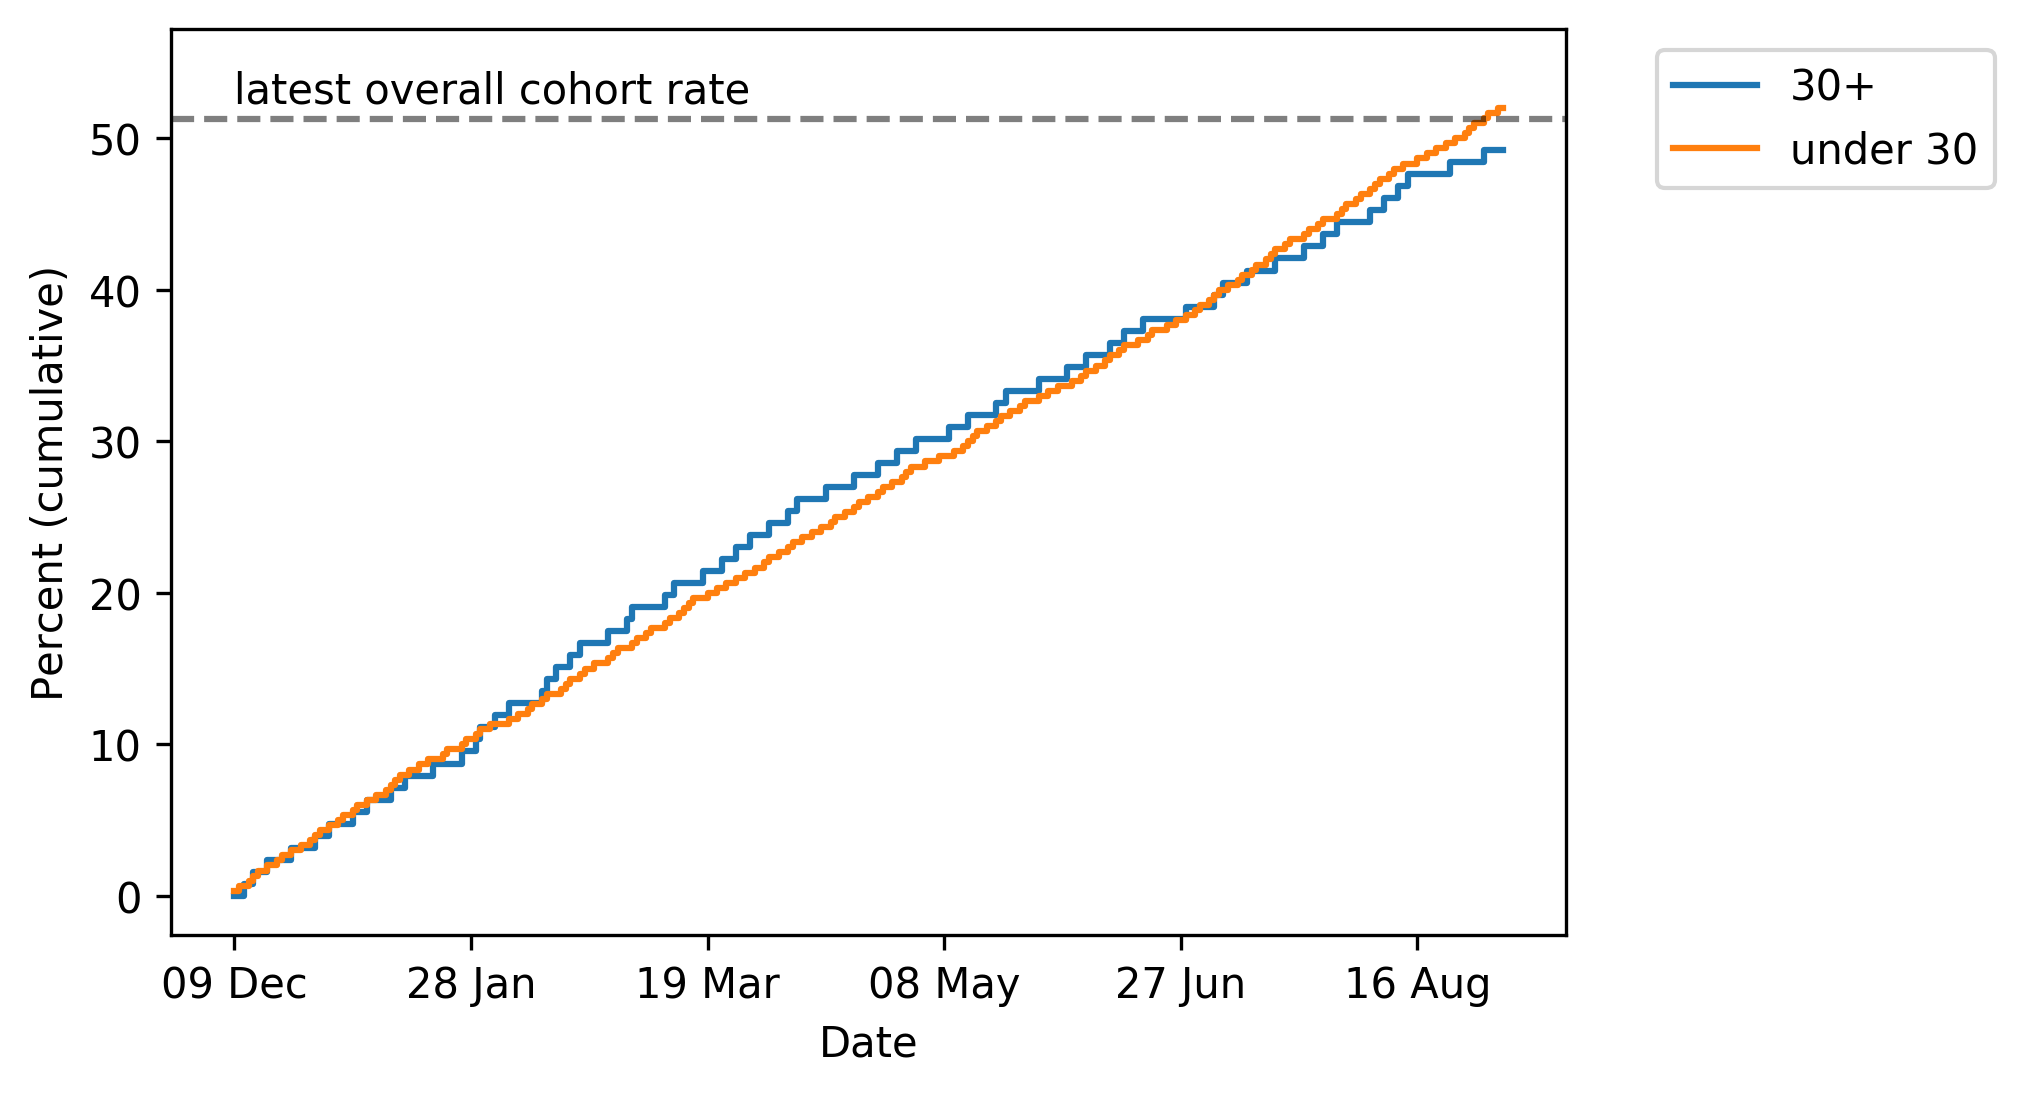

### COVID vaccinations among 55-59 population
 ### by Psychosis, schizophrenia, or bipolar

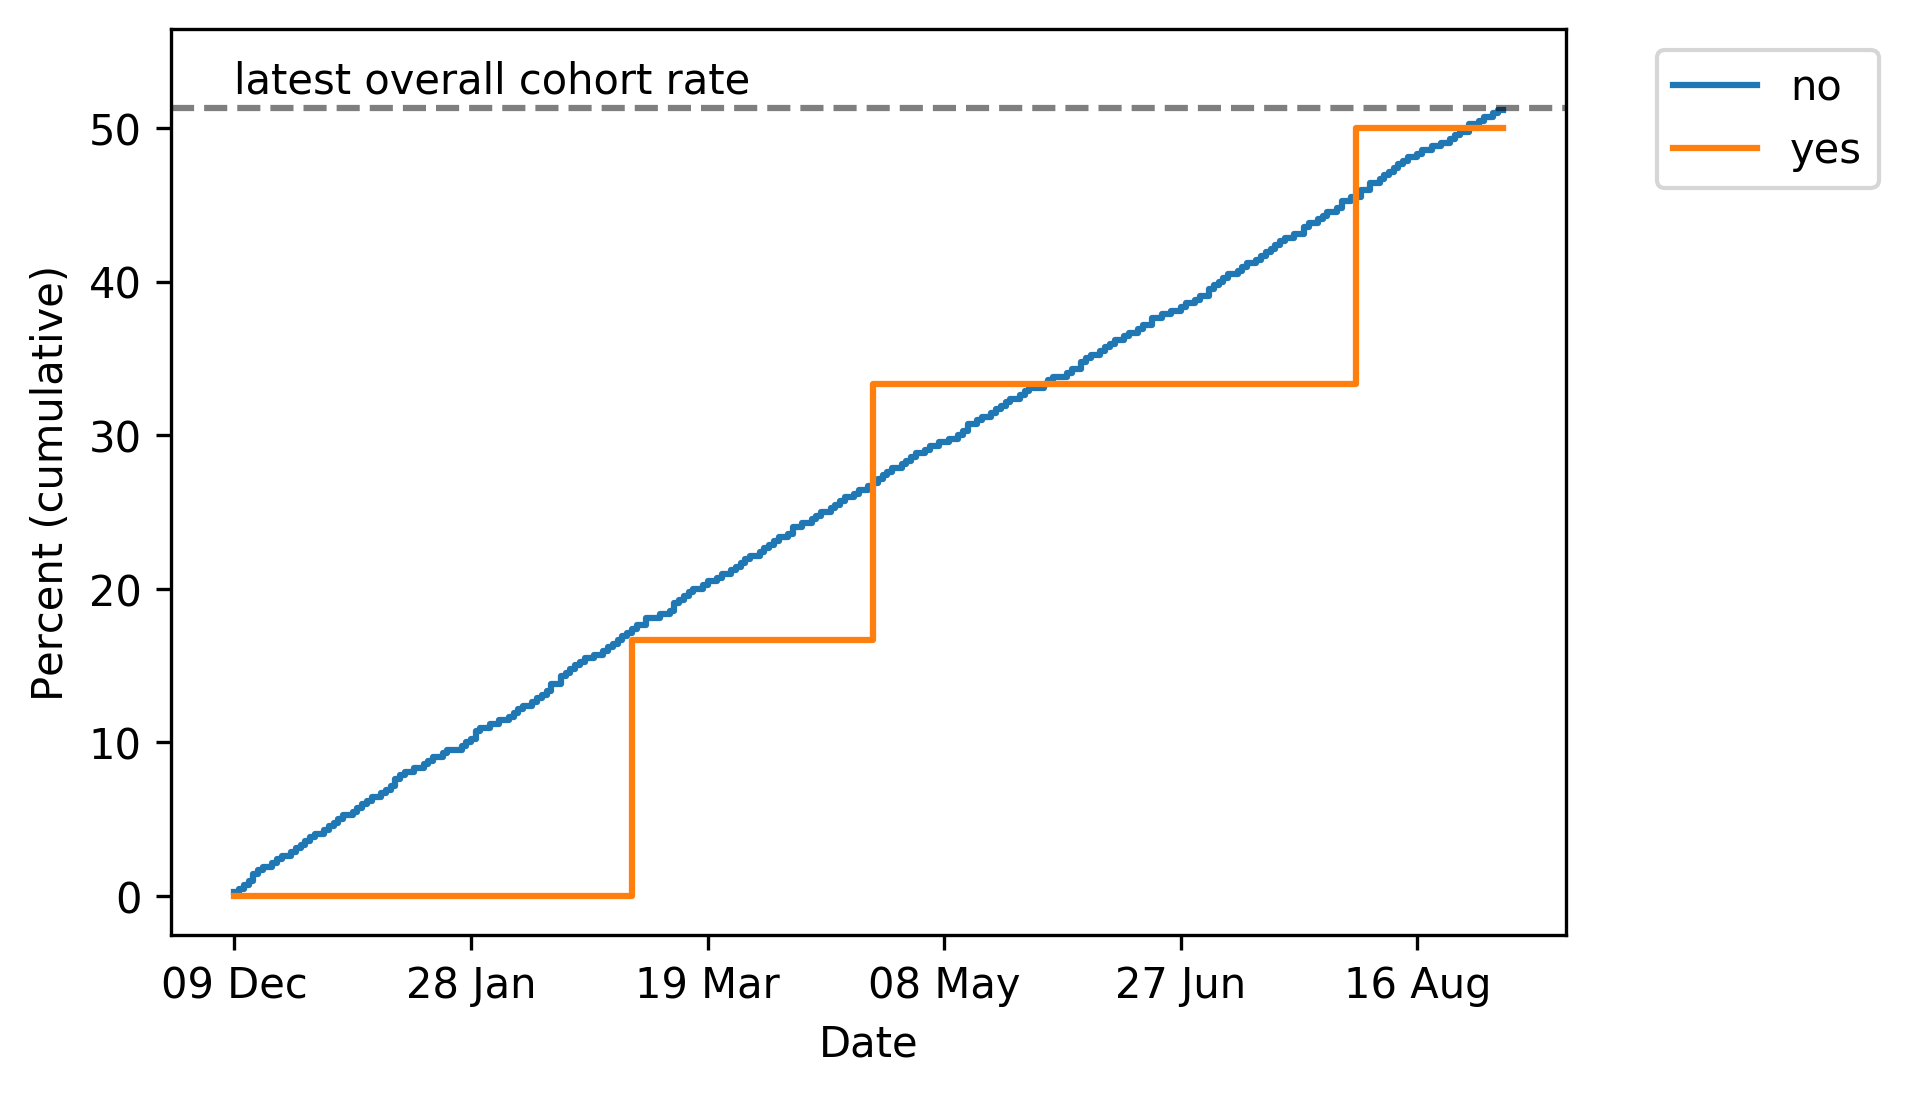

### COVID vaccinations among 55-59 population
 ### by SSRI (last 12 months)

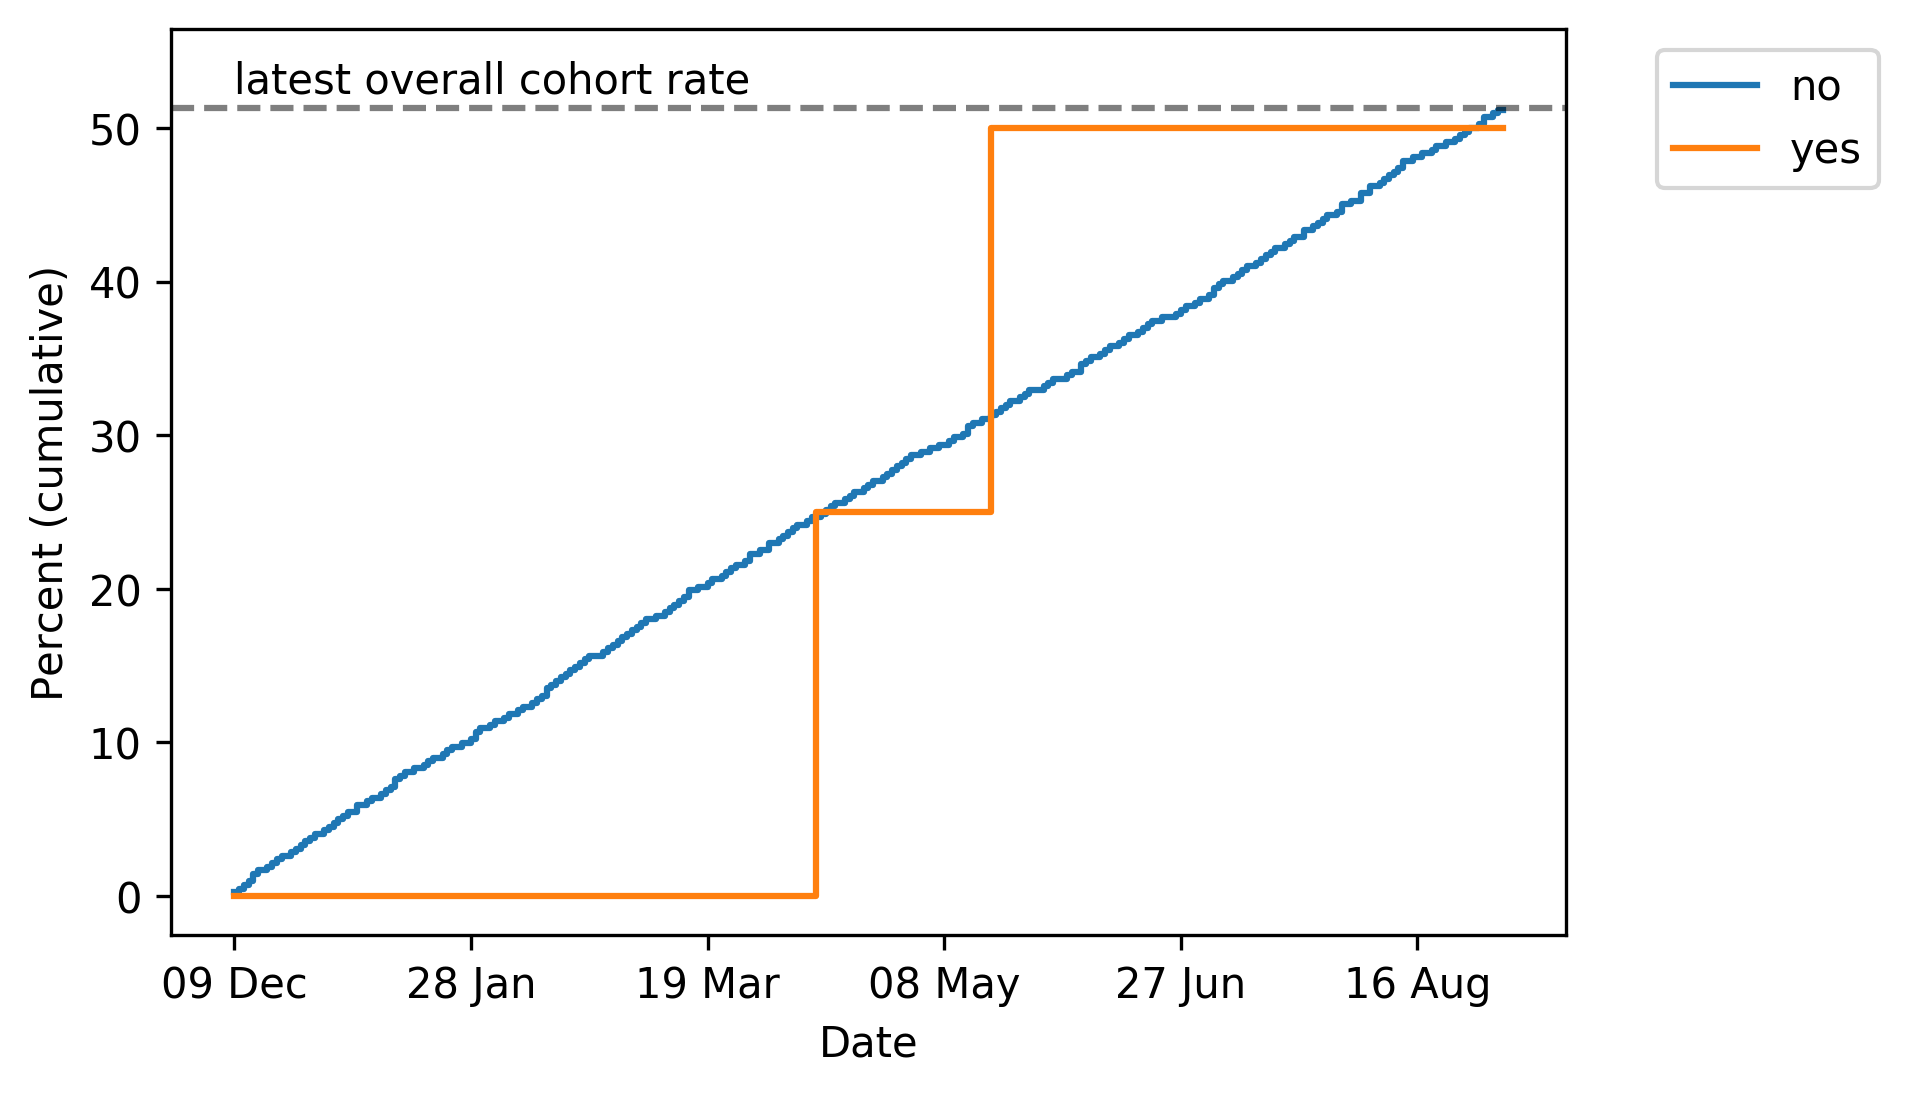

In [9]:
display(Markdown("## 55-59 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="55-59", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 50-54 population according to demographic/clinical features, cumulatively by day. <a name='charts50' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

+

## 50-54 population

### COVID vaccinations among 50-54 population
 ### by Sex

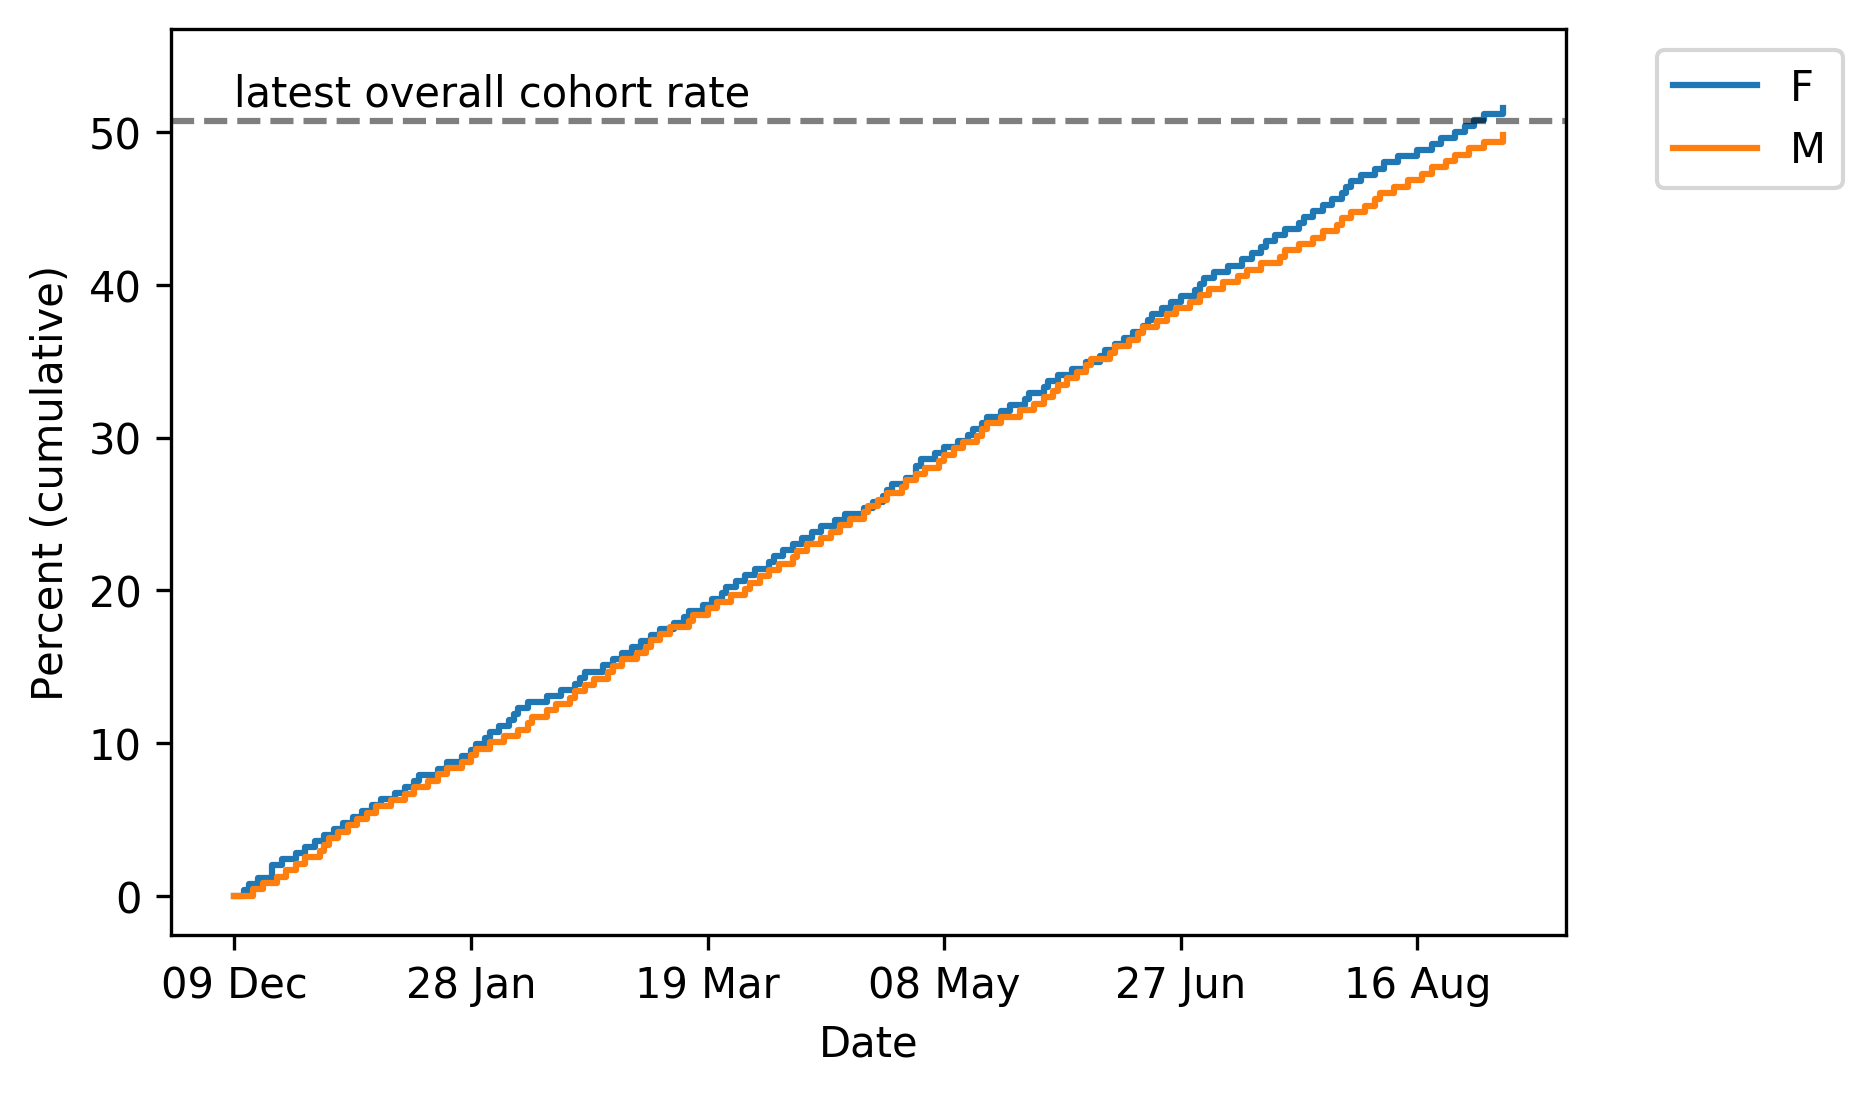

### COVID vaccinations among 50-54 population
 ### by Ethnicity (broad categories)

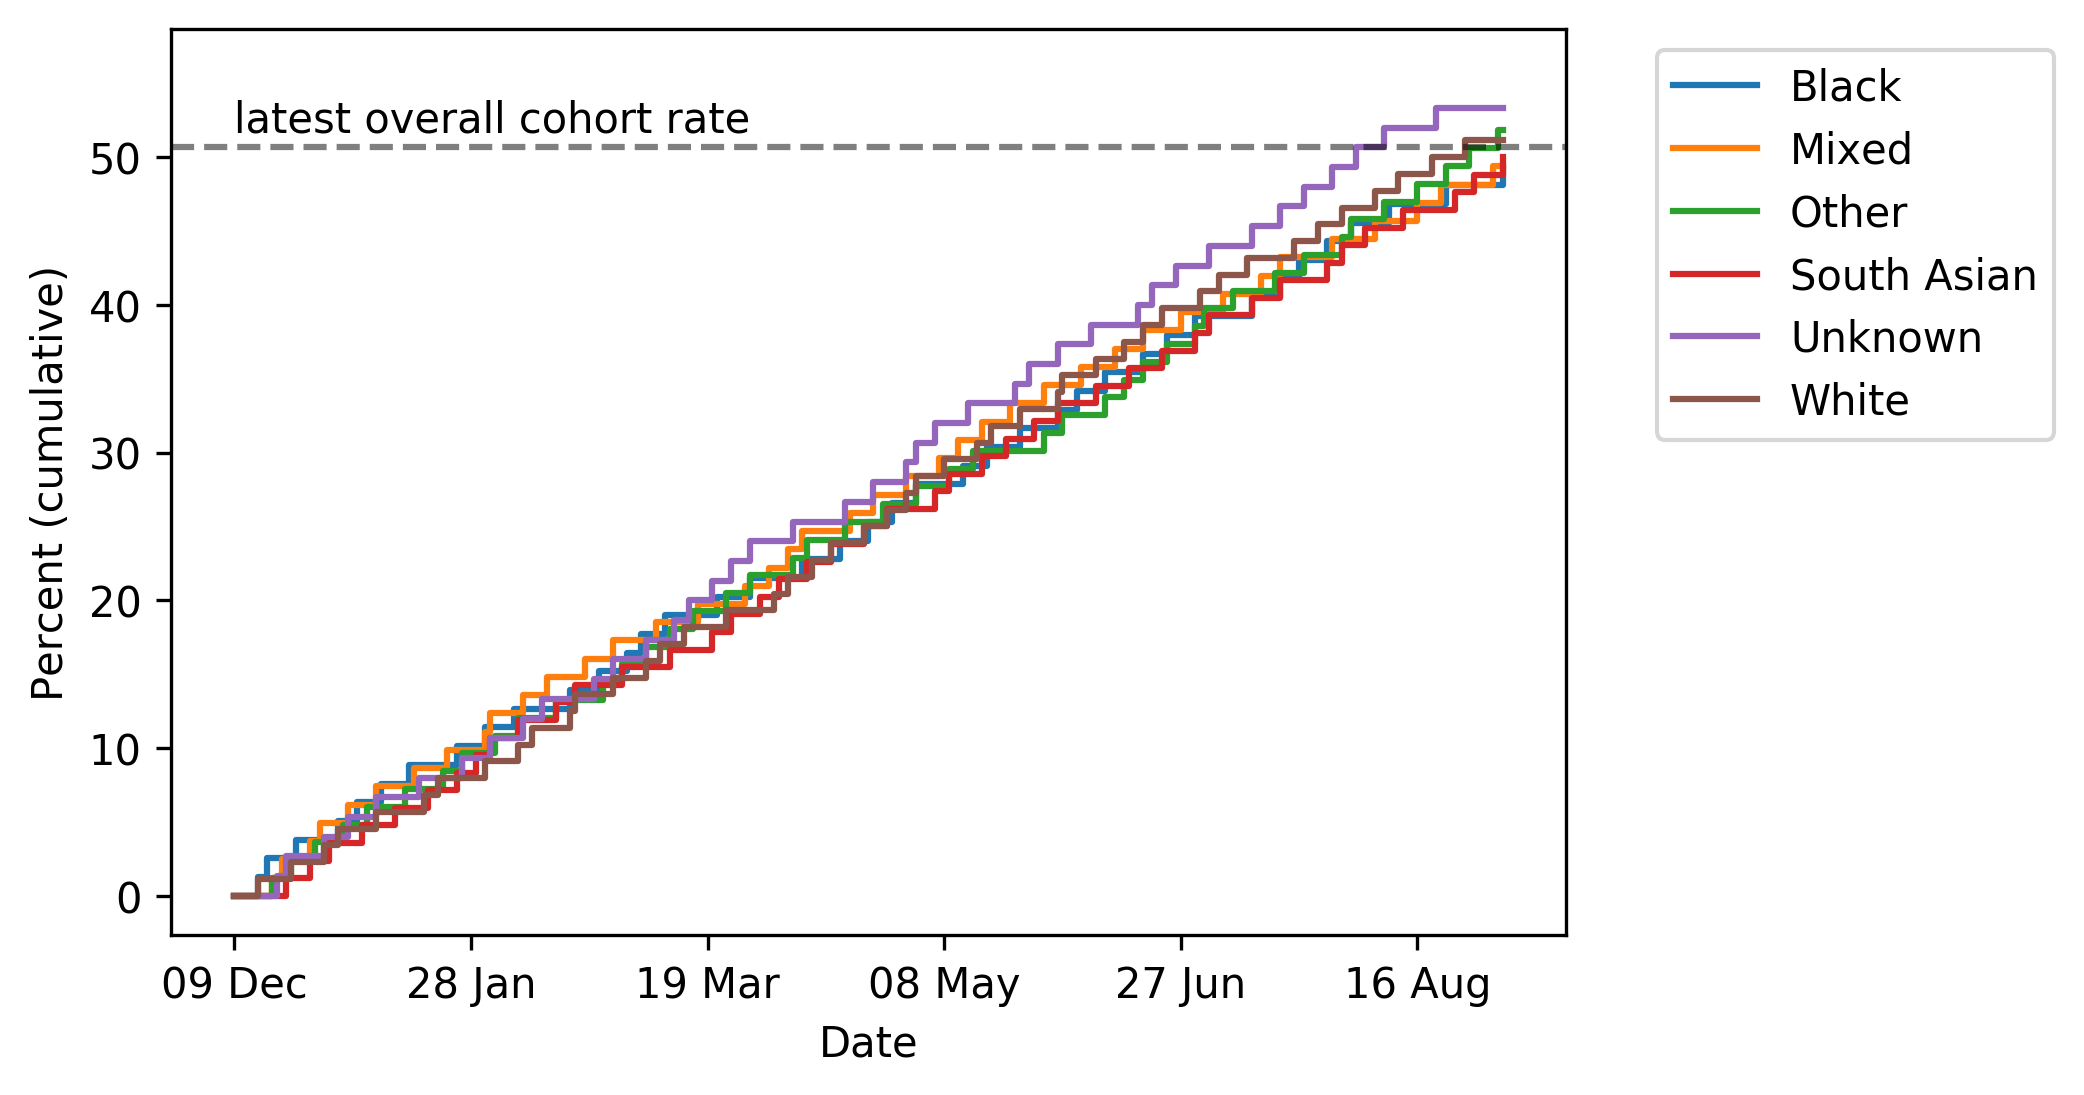

### COVID vaccinations among 50-54 population
 ### by Index of Multiple Deprivation (quintiles)

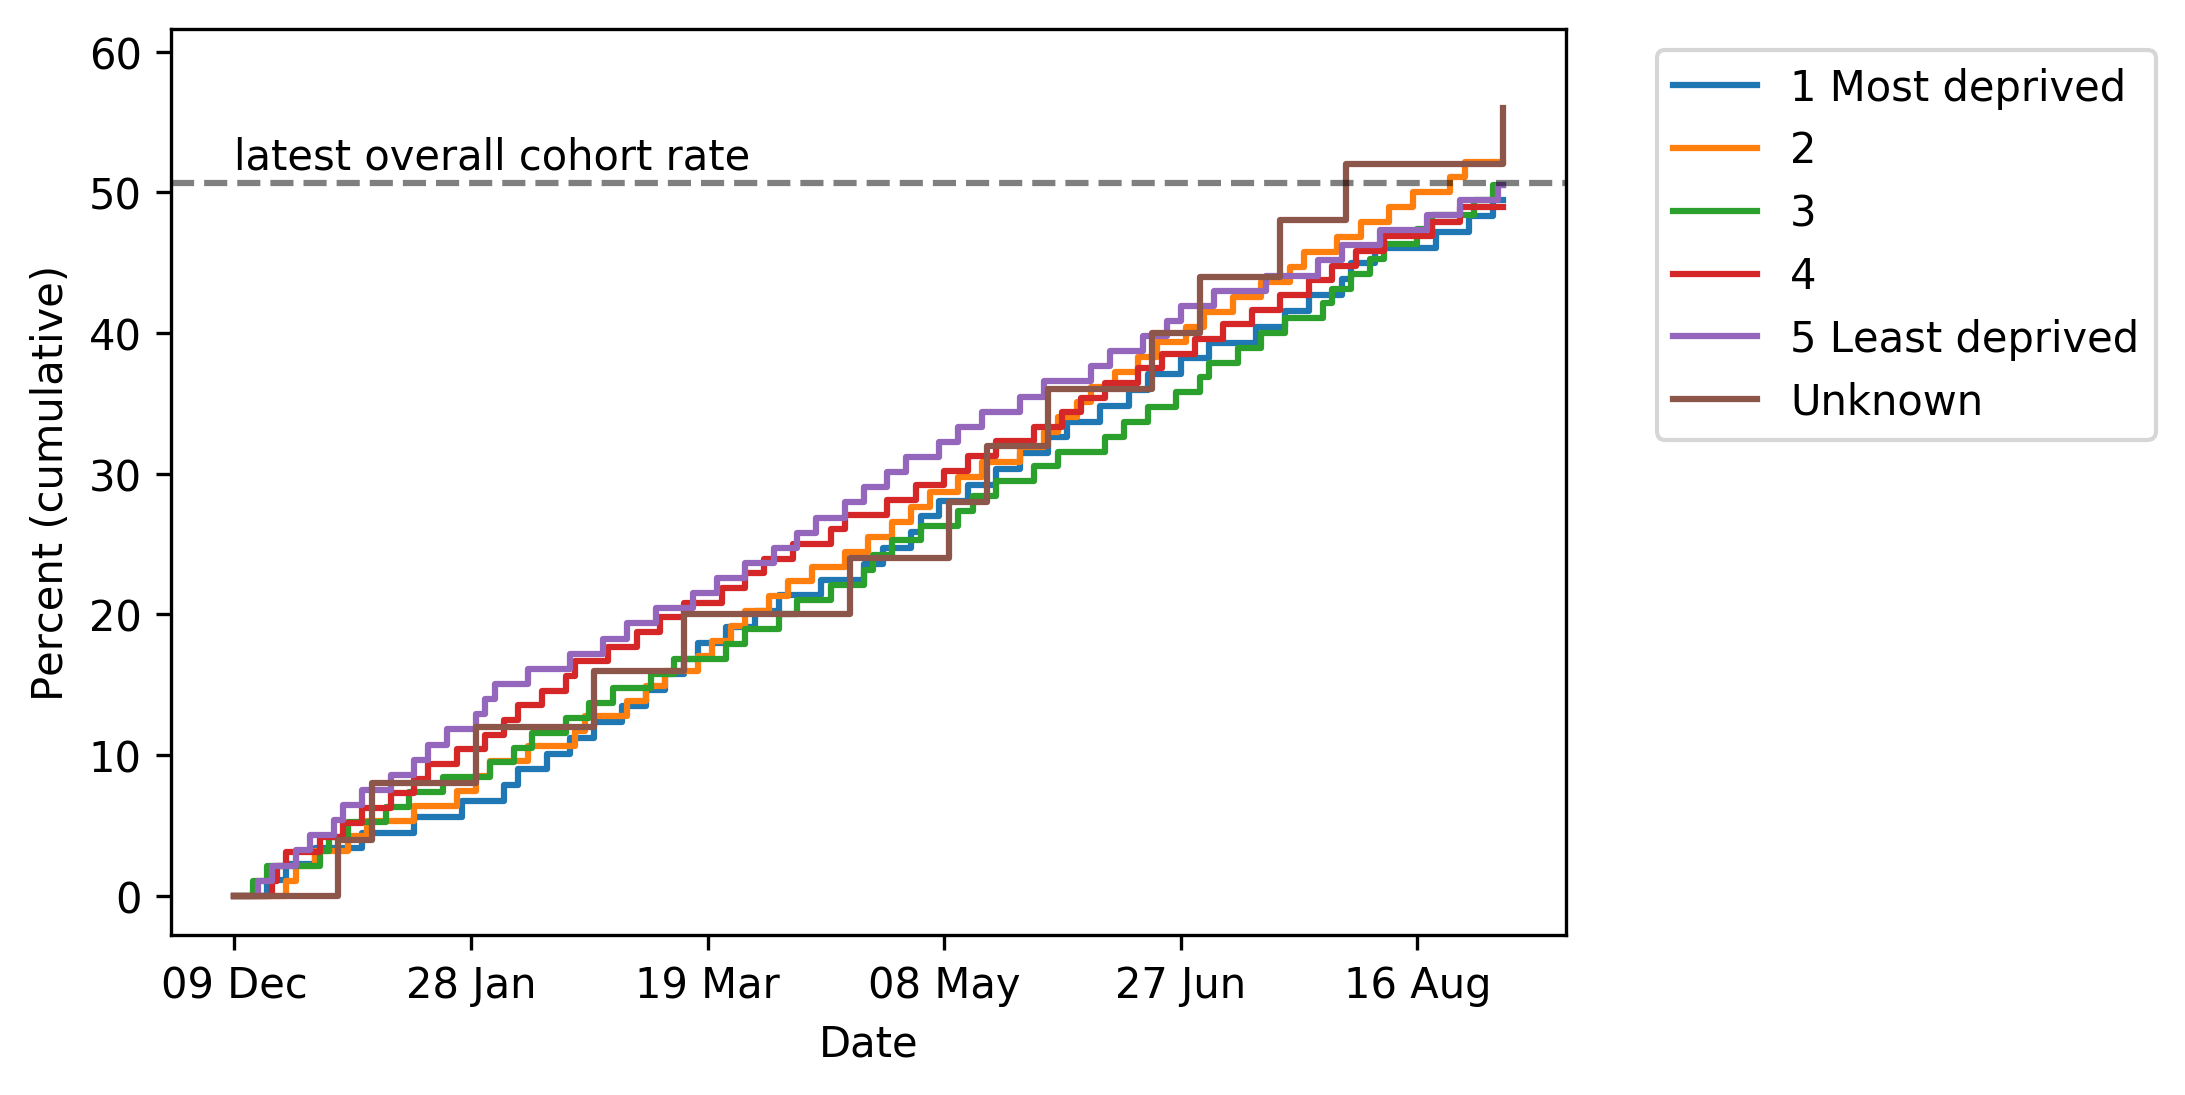

### COVID vaccinations among 50-54 population
 ### by BMI

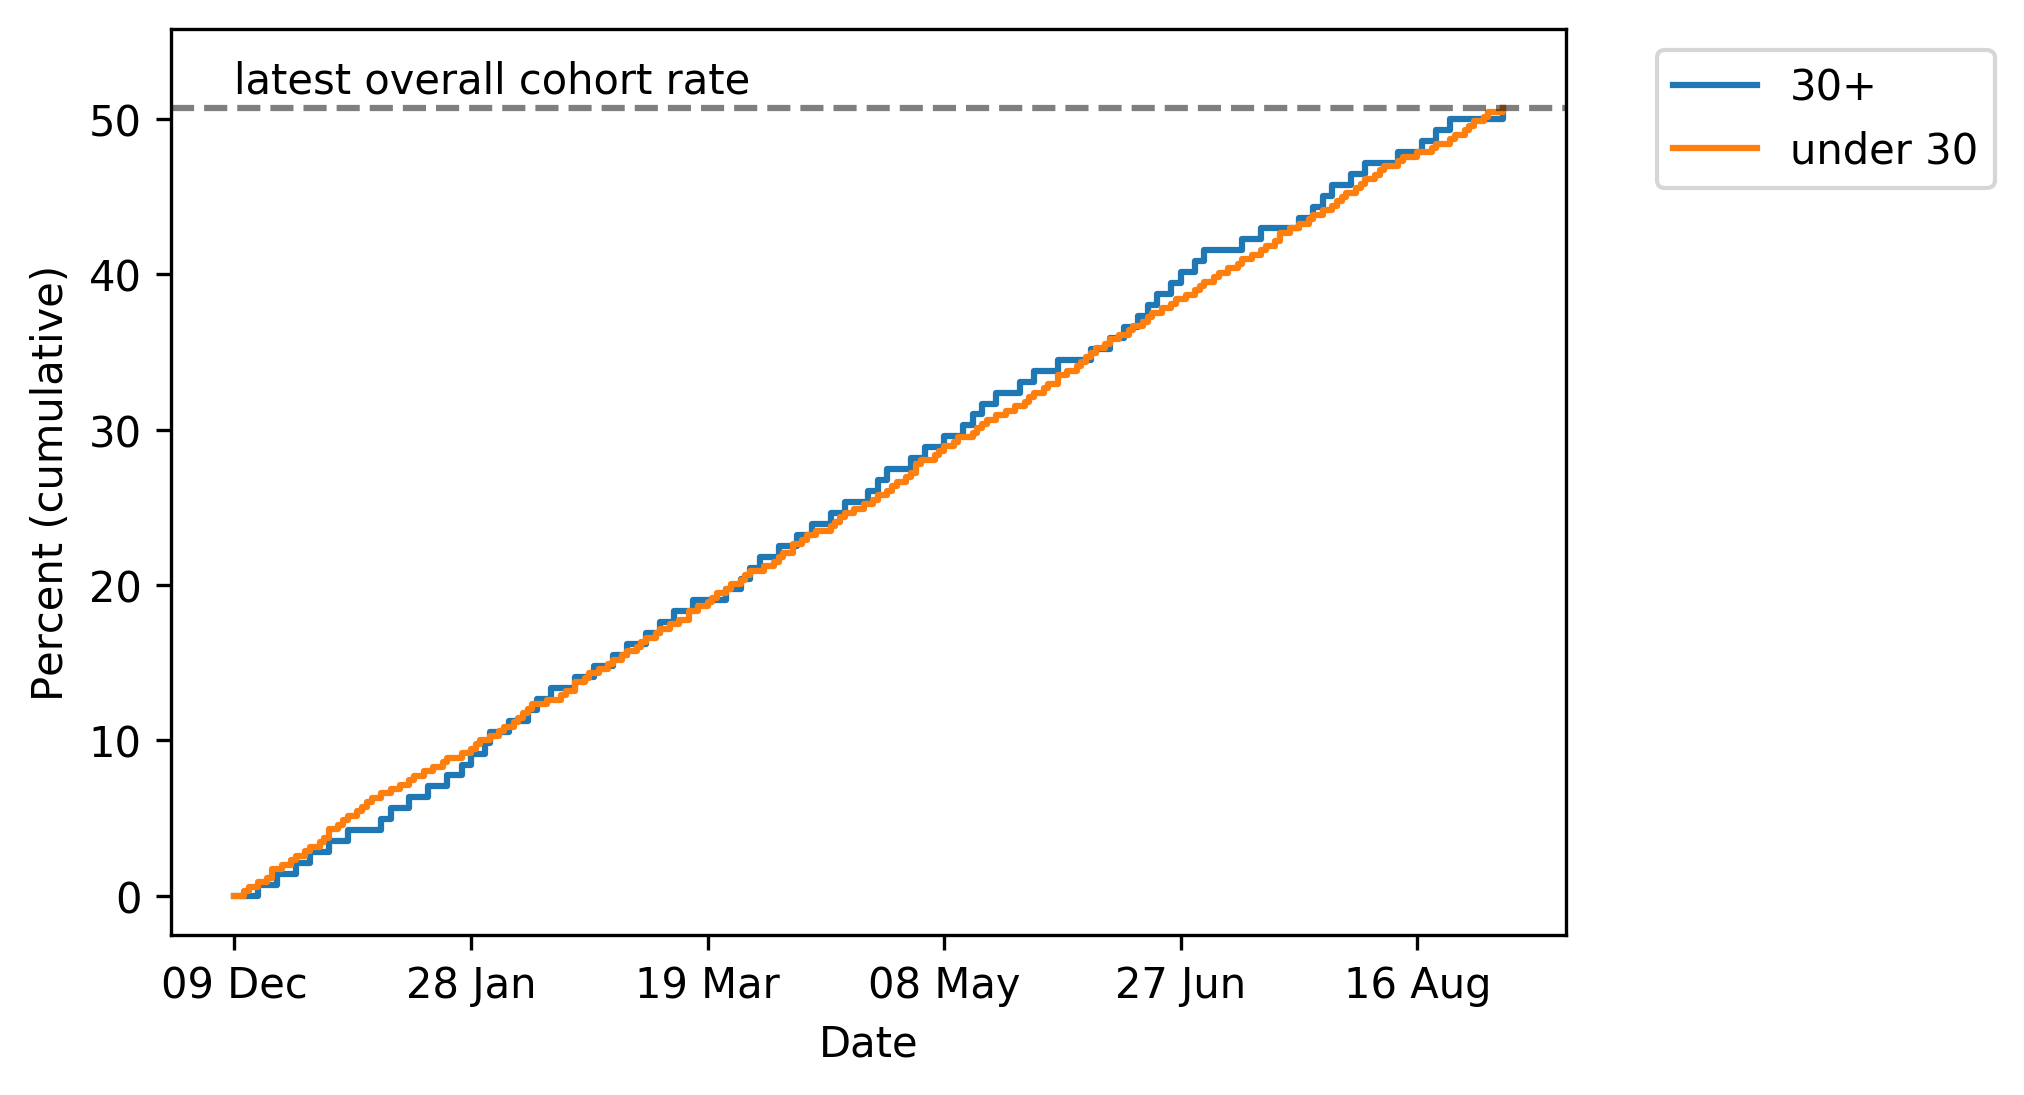

### COVID vaccinations among 50-54 population
 ### by Psychosis, schizophrenia, or bipolar

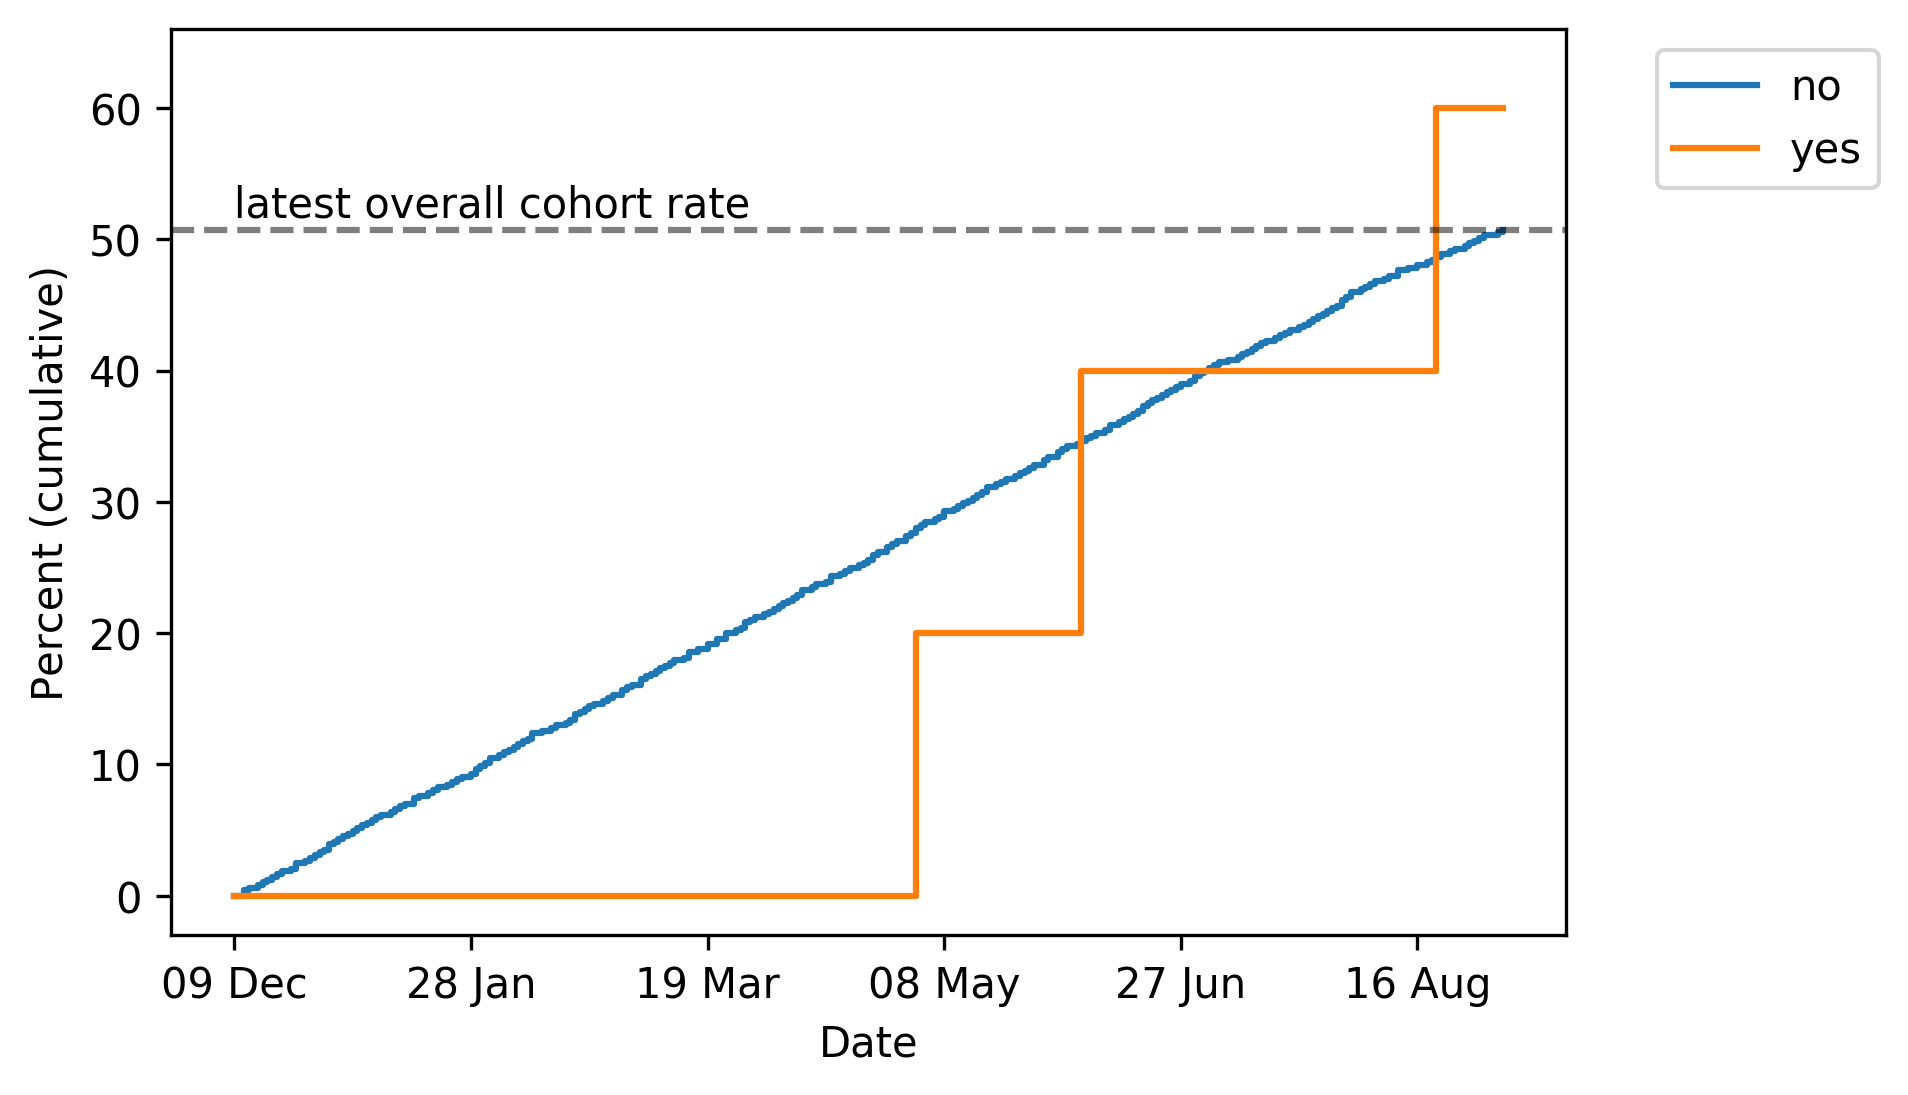

### COVID vaccinations among 50-54 population
 ### by SSRI (last 12 months)

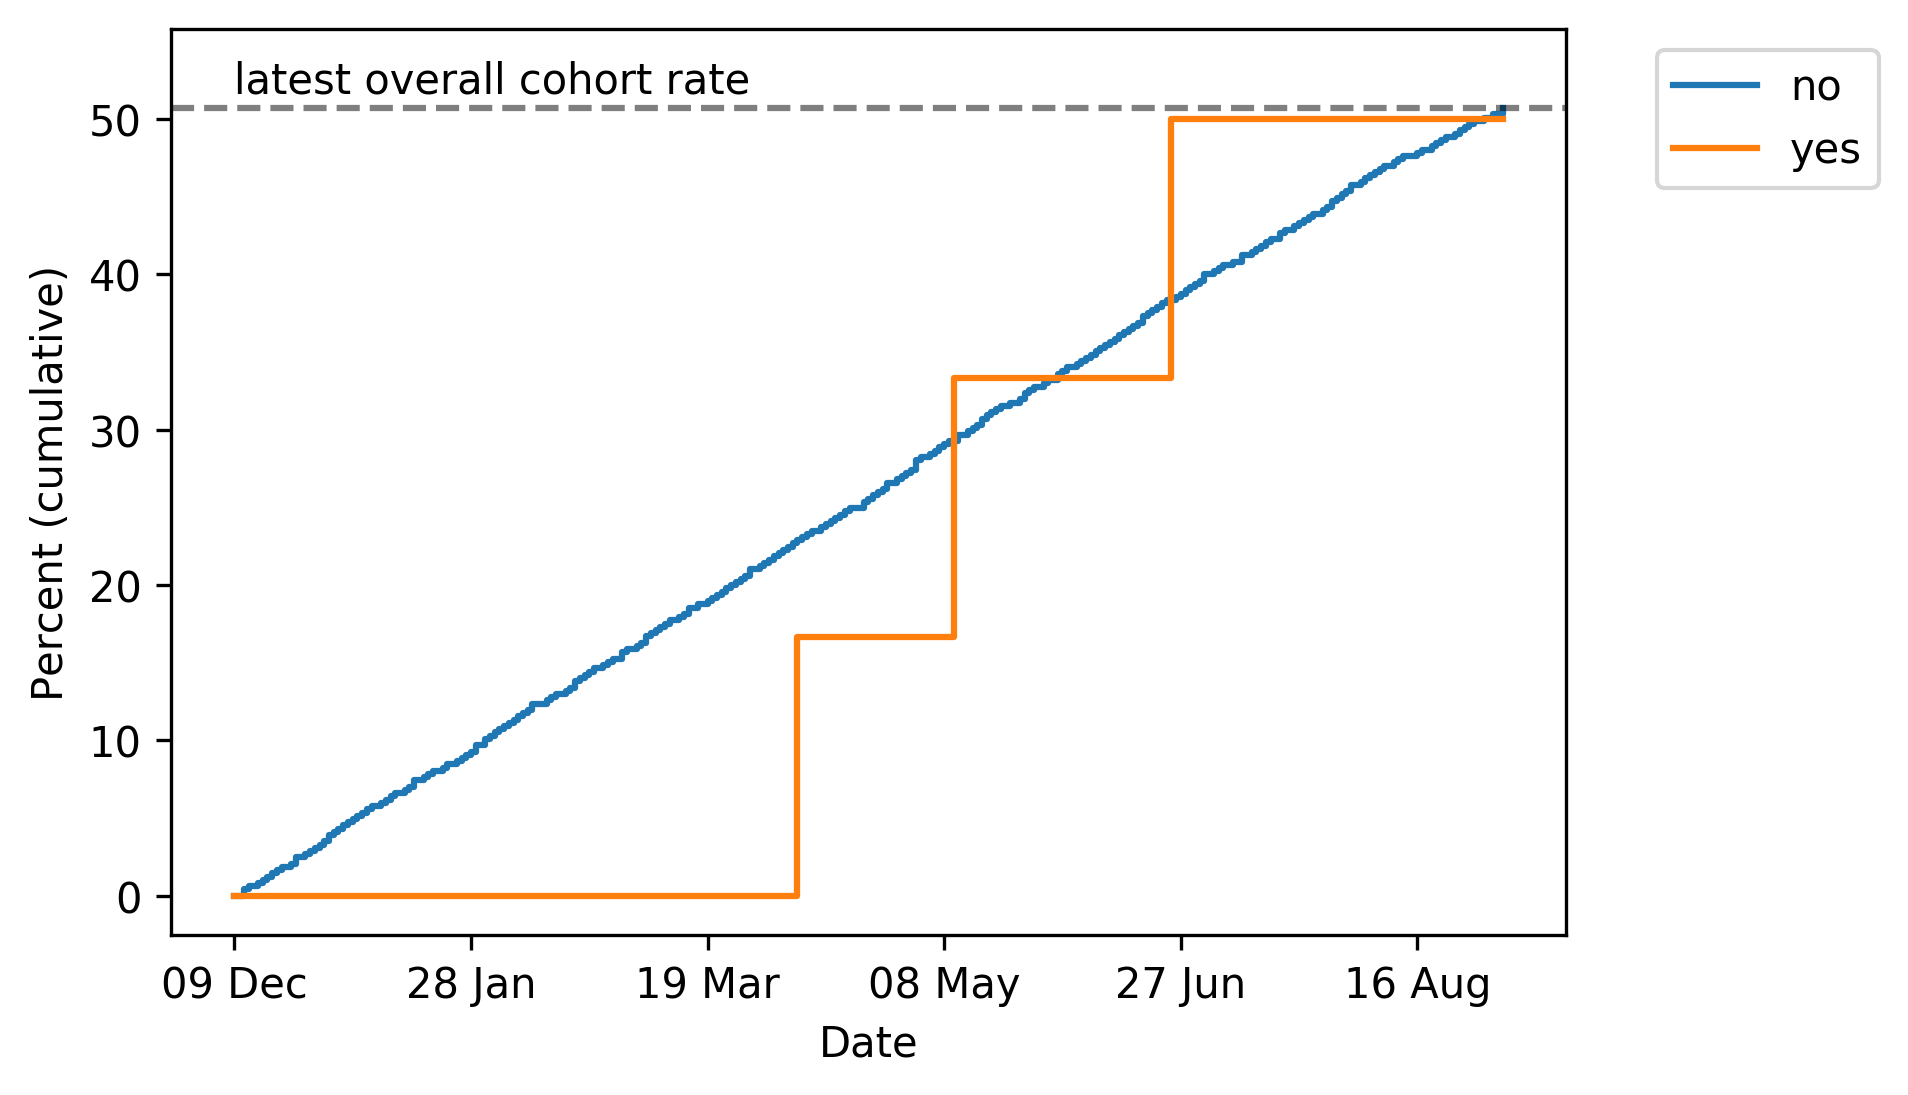

In [10]:
display(Markdown("## 50-54 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="50-54", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

## 
## Trends in vaccination rates of 40-49 population according to demographic/clinical features, cumulatively by day. <a name='charts40' />
**\*National rate calculated as at latest date for vaccinations recorded across all TPP practices.**

## 40-49 population

### COVID vaccinations among 40-49 population
 ### by Sex

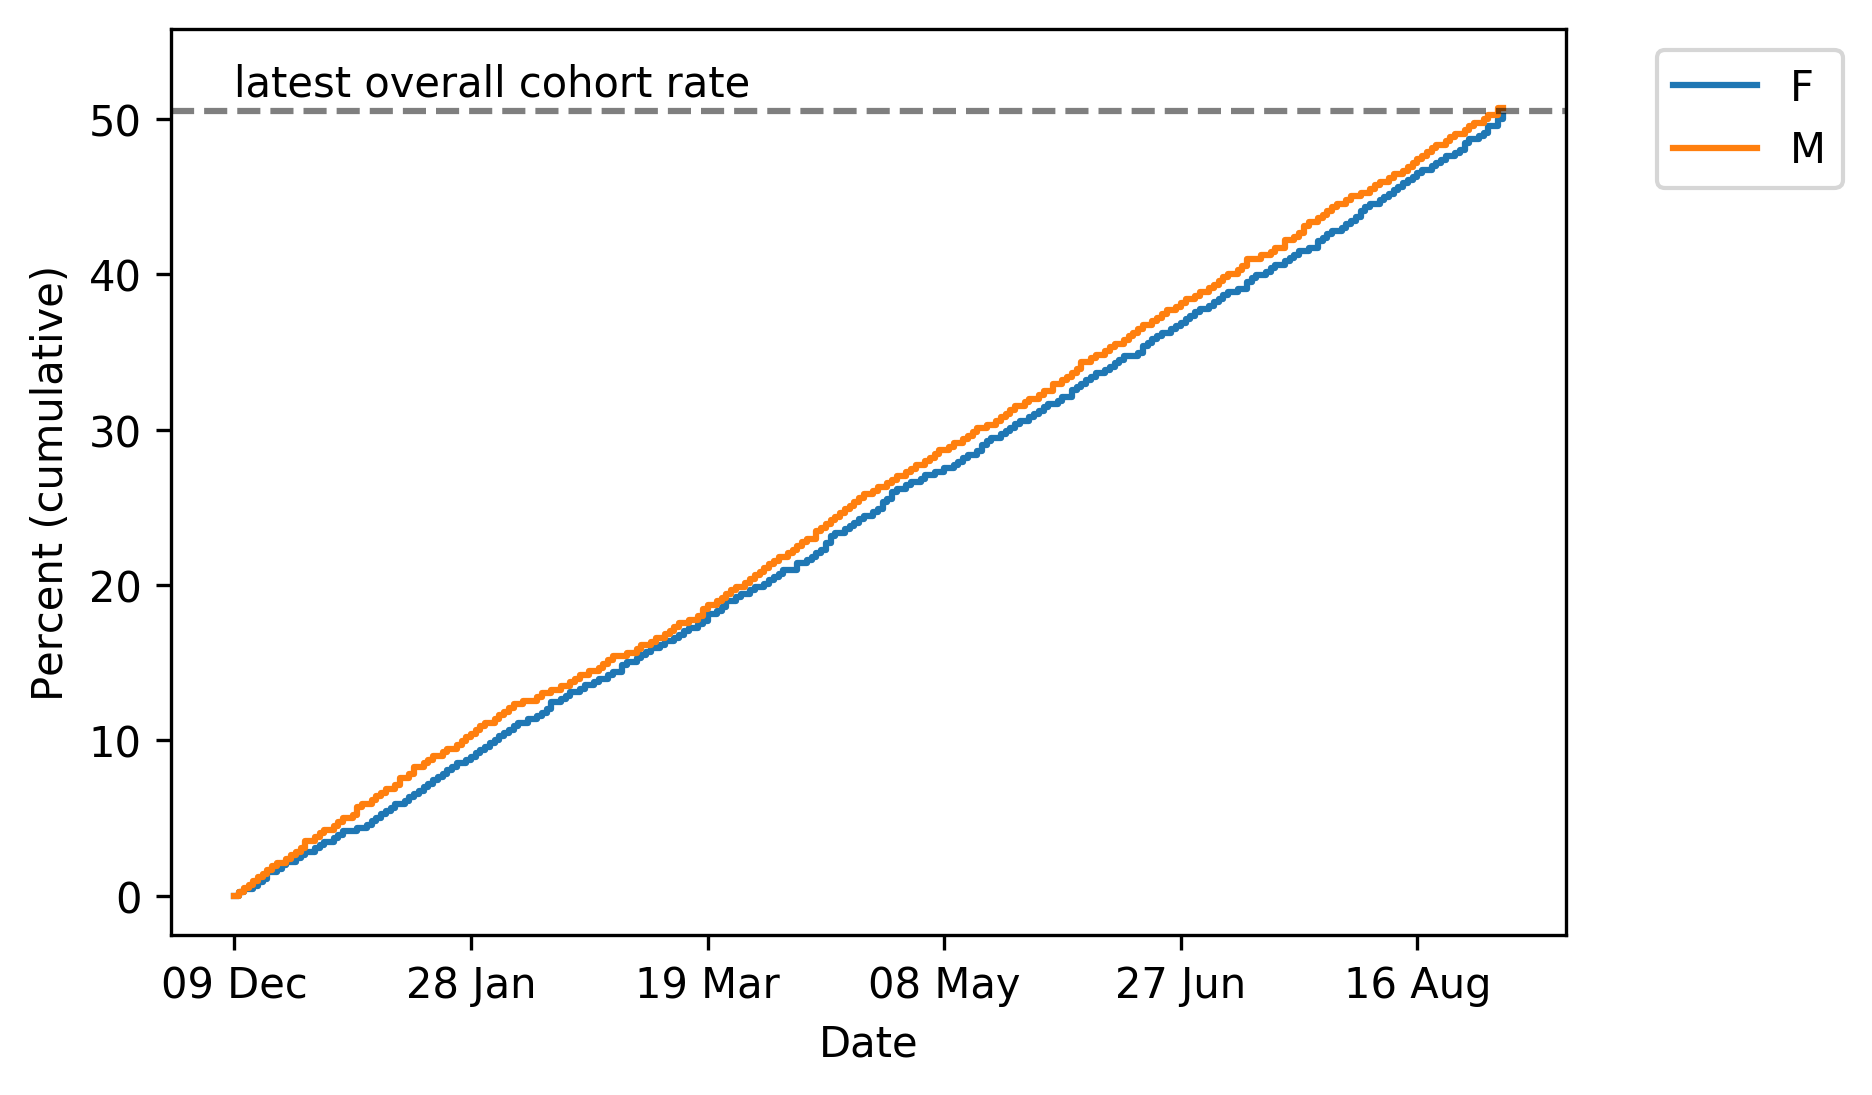

### COVID vaccinations among 40-49 population
 ### by Ethnicity (broad categories)

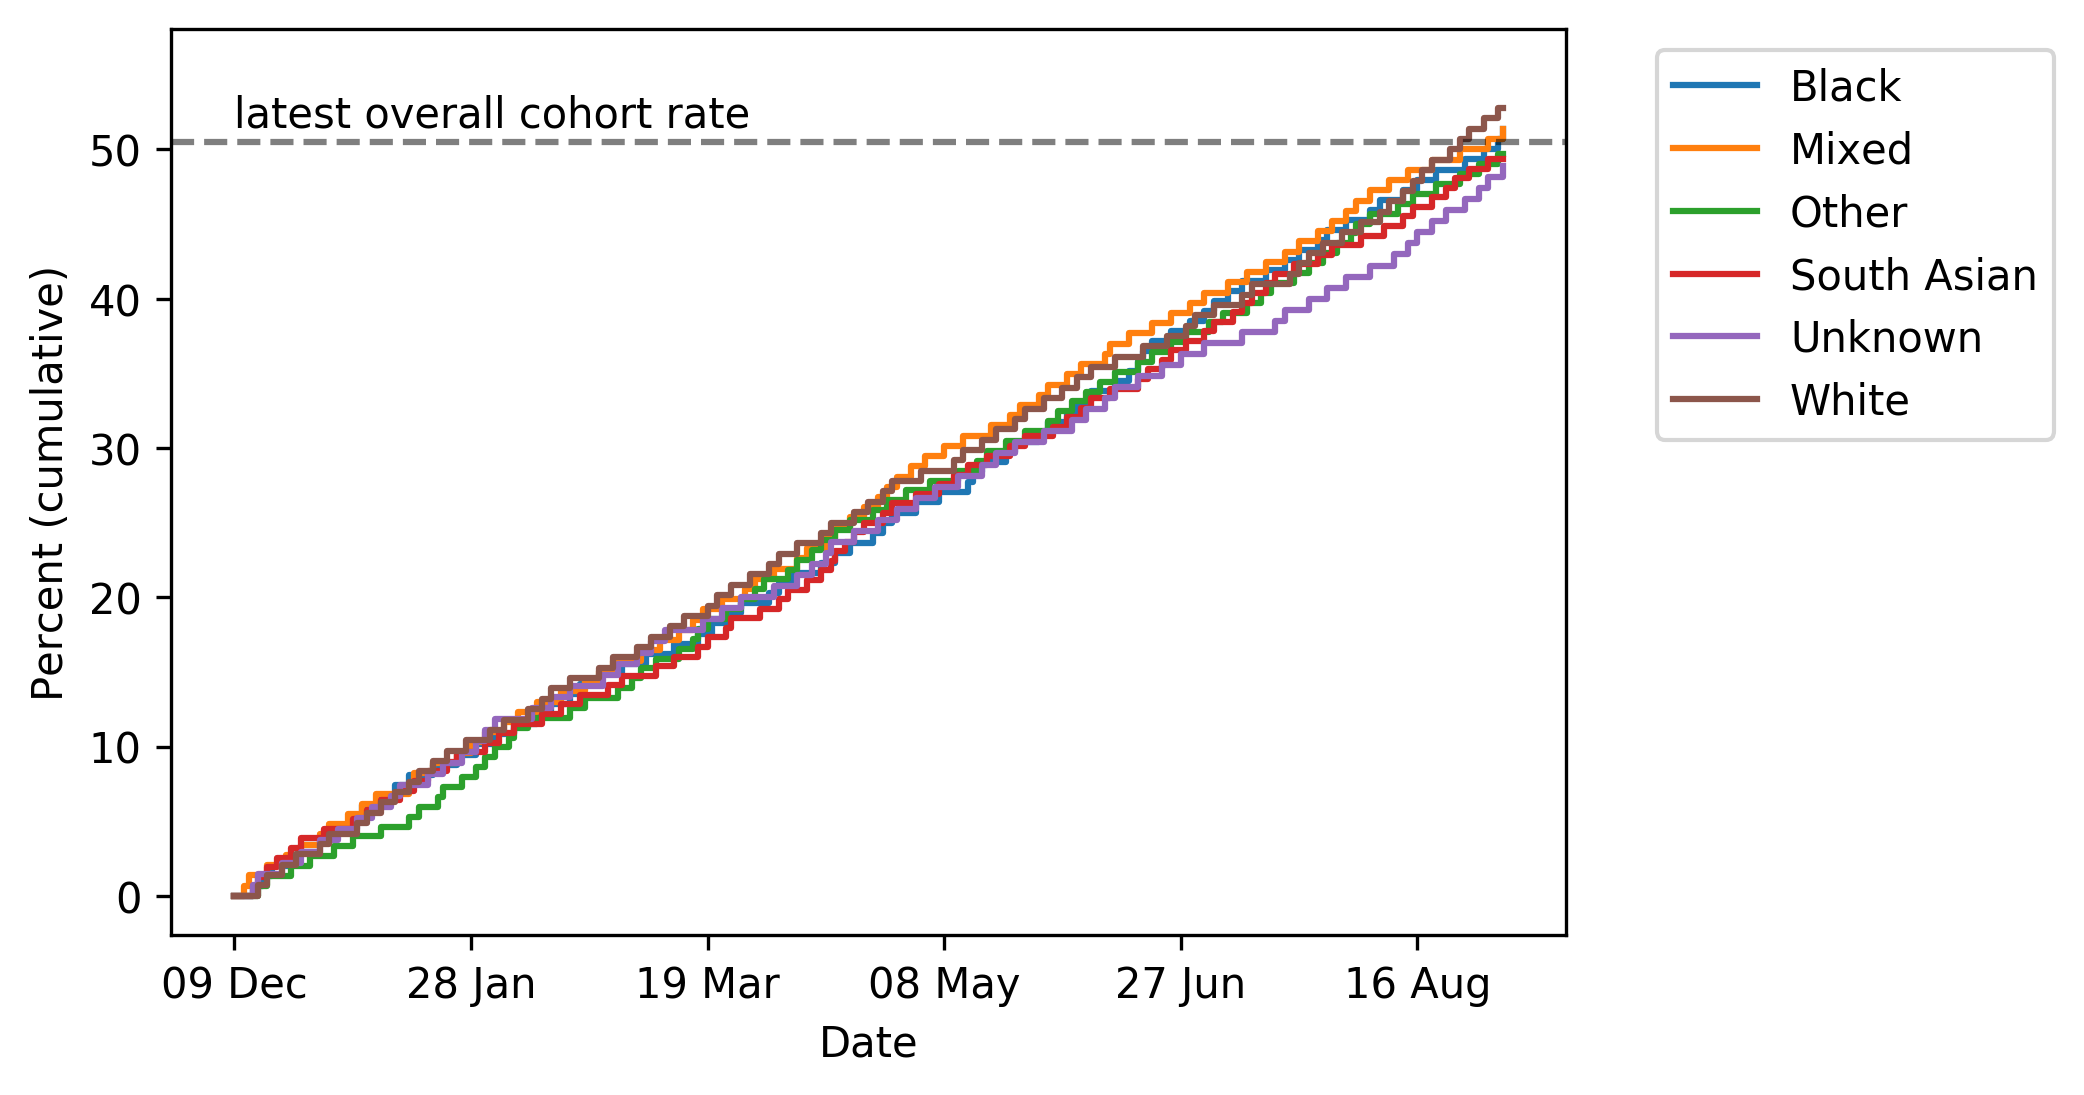

### COVID vaccinations among 40-49 population
 ### by Index of Multiple Deprivation (quintiles)

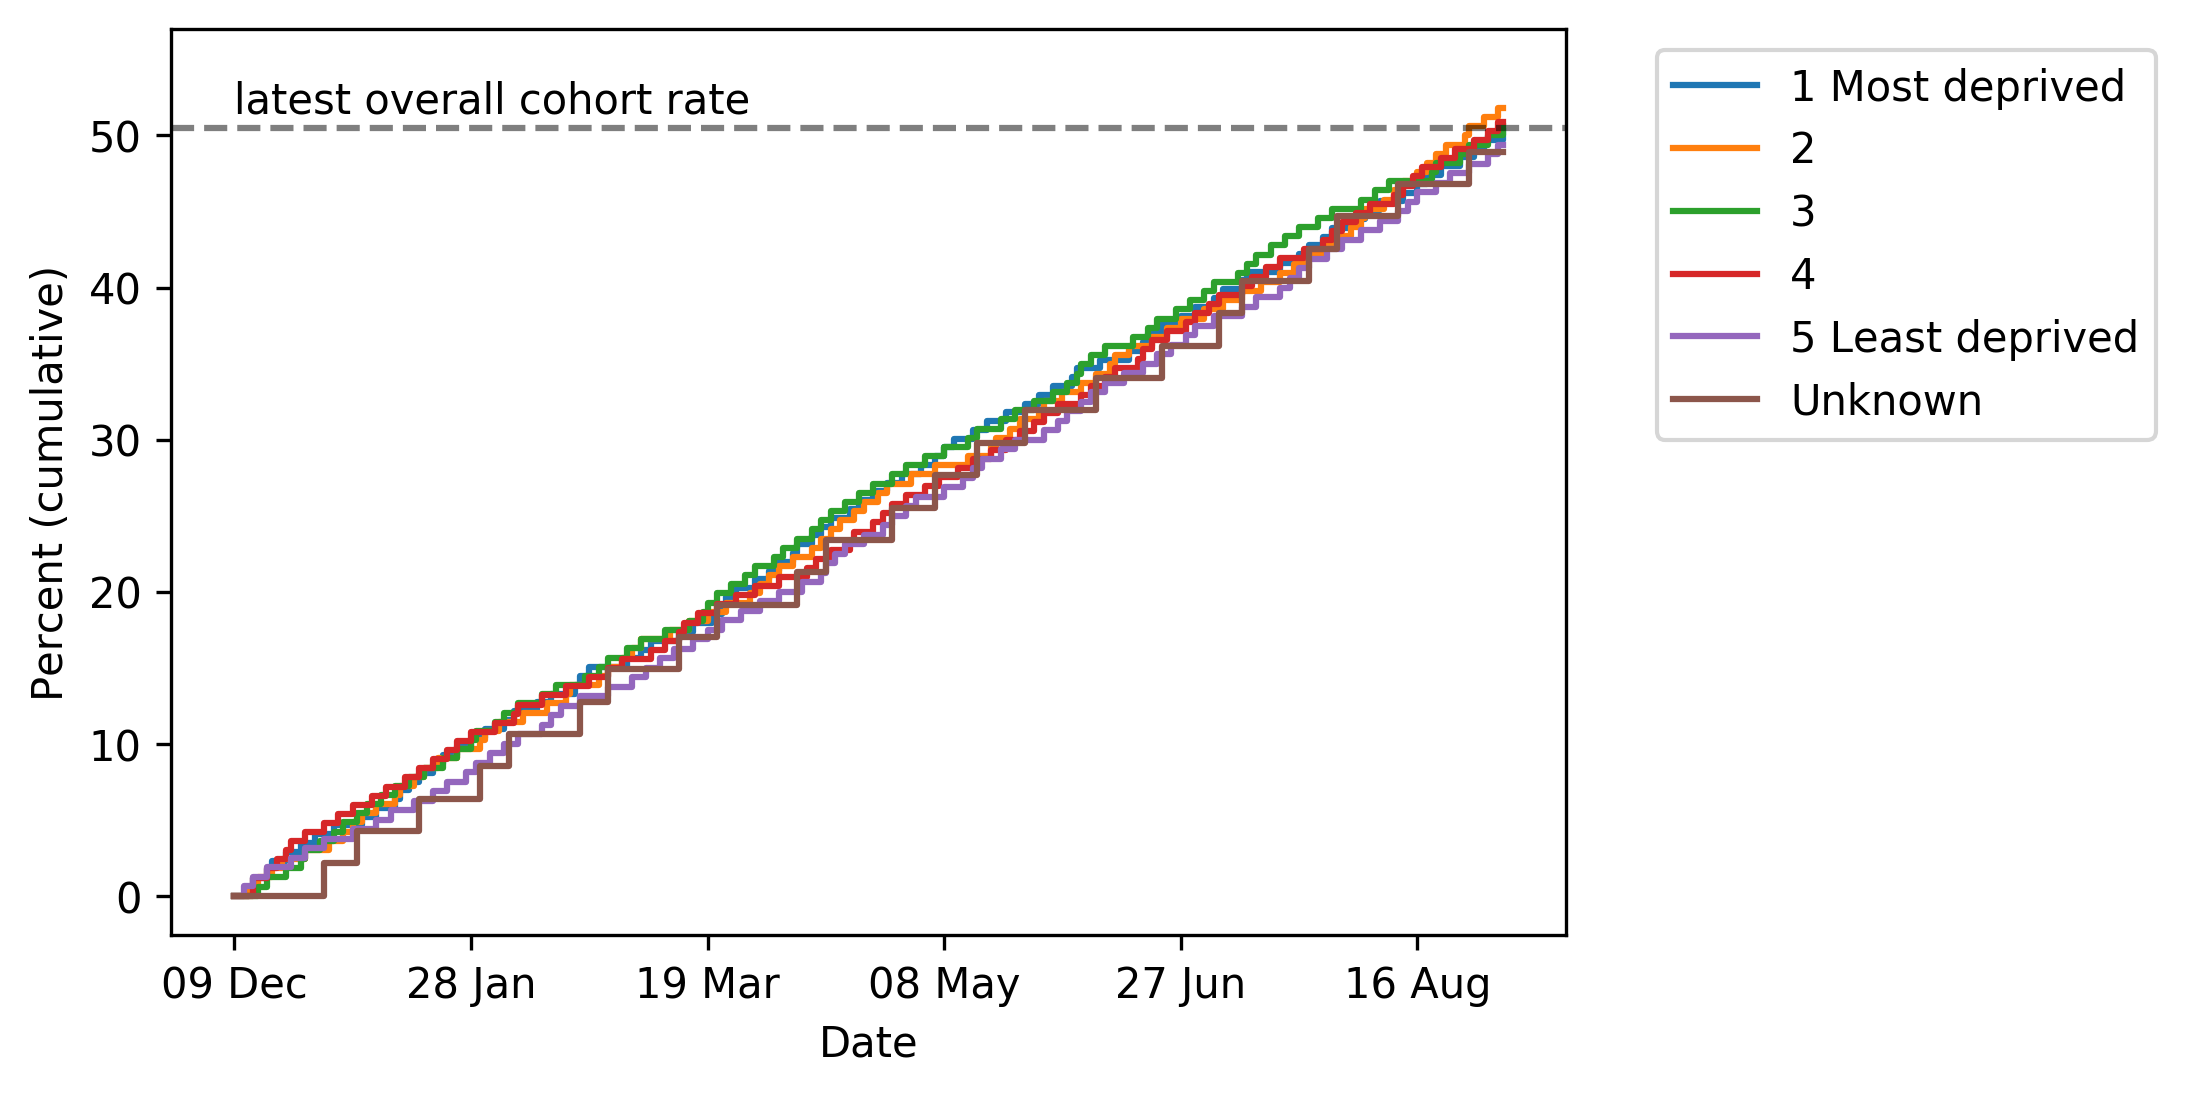

In [11]:
display(Markdown("## 40-49 population"))
chartlist2 = find_and_sort_filenames(foldername="figures", population_subset="40-49", file_extension=IMAGE_FORMAT.extension)
    
for item in chartlist2:
    show_chart(item, IMAGE_FORMAT)

# 
## Vaccination rates of each eligible population group, according to demographic/clinical features  <a name='tables' />

In [12]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                            pre_string="among ", tail_string=" population.csv",
                            population_subset="Cumulative vaccination figures",
                            files_to_exclude=[])
    
for filename in tablelist:
    df, title = import_table(filename, latest_date_fmt, show_carehomes=True, suffix=suffix)
    show_table(df, title, latest_date_fmt, show_carehomes=True)

## 
 ## Cumulative vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1029   
Sex                                       F                                                         518   
                                          M                                                         511   
Age band                                  0                                                          14   
                                          0-15                                                       63   
                                          16-17                                                      84   
                                          18-29                                                      70   
                                          30-34                                                      56   
                                          35-39                                                      56   
                                          40-44                                                      70   
                                          45-49                                                      70   
                                          50-54                                                      63   
                                          55-59                                                      56   
                                          60-64                                                      63   
                                          65-69                                                      84   
                                          70-74                                                      70   
                                          75-79                                                      63   
                                          80-84                                                      63   
                                          85-89                                                      70   
                                          90+                                                        14   
Ethnicity (broad categories)              Black                                                     168   
                                          Mixed                                                     175   
                                          Other                                                     203   
                                          South Asian                                               175   
                                          Unknown                                                   147   
                                          White                                                     168   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        56   
                                           Caribbean                                                 56   
                                           Chinese                                                   56   
                                           Other                                                     56   
                                           Other Asian                                               56   
                                          British or Mixed British                                   49   
                                          Indian or British Indian                                   63   
                                          Irish                                                      49   
                                          Other Black                                                63   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1804   
Sex                                       F                                                         910   
                                          M                                                         896   
Age band                                  0                                                          28   
                                          0-15                                                      119   
                                          16-17                                                     140   
                                          18-29                                                     105   
                                          30-34                                                     119   
                                          35-39                                                     112   
                                          40-44                                                     112   
                                          45-49                                                     133   
                                          50-54                                                     105   
                                          55-59                                                     119   
                                          60-64                                                     105   
                                          65-69                                                     119   
                                          70-74                                                     126   
                                          75-79                                                     112   
                                          80-84                                                     112   
                                          85-89                                                     119   
                                          90+                                                        21   
Ethnicity (broad categories)              Black                                                     308   
                                          Mixed                                                     301   
                                          Other                                                     301   
                                          South Asian                                               308   
                                          Unknown                                                   273   
                                          White                                                     315   
ethnicity 16 groups                        African                                                   98   
                                           Bangladeshi or British Bangladeshi                       105   
                                           Caribbean                                                 91   
                                           Chinese                                                  126   
                                           Other                                                     84   
                                           Other Asian                                               70   
                                          British or Mixed British                                  105   
                                          Indian or British Indian                                   84   
                                          Irish                                                     105   
                                          Other Black                                                98   
             

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among care home population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                     Group                                   
overall                      overall                           653   
Sex                          F                                 336   
                             M                                 322   
Age band                     0                                  14   
                             0-15                               35   
                             16-17                              49   
                             18-29                              42   
                             30-34                              42   
                             35-39                              42   
                             40-44                              56   
                             45-49                              28   
                             50-54                              35   
                             55-59                              35   
                             60-64                              42   
                             65-69                              42   
                             70-74                              49   
                             75-79                              42   
                             80-84                              49   
                             85-89                              42   
                             90+                                14   
Ethnicity (broad categories) Black                             119   
                             Mixed                             112   
                             Other                             119   
                             South Asian                        91   
                             Unknown                           105   
                             White                             119   
Dementia                     no                                651   
                             yes                                 0   

                                          Vaccinated at 03 Sep (%)  \
Category                     Group                                   
overall                      overall                          47.8   
Sex                          F                                46.6   
                             M                                50.0   
Age band                     0                                50.0   
                             0-15                             45.5   
                             16-17                            50.0   
                             18-29                            50.0   
                             30-34                            54.5   
                             35-39                            50.0   
                             40-44                            47.1   
                             45-49                            36.4   
                             50-54                            50.0   
                             55-59                            45.5   
                             60-64                            46.2   
                             65-69                            46.2   
                             70-74                            46.7   
                             75-79                            50.0   
                             80-84                            50.0   
                             85-89                            46.2   
                             90+                              66.7   
Ethnicity (broad categories) Black                            50.0   
                             Mixed                            48.5   
                             Other                            51.5   
                             South Asian                      41.9   
                             Unknown                          51.7   
                             White                 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                        
overall                                   overall                                226   
newly shielded since feb 15               no                                     224   
                                          yes                                      0   
Sex                                       F                                      112   
                                          M                                      112   
Age band                                  16-29                                   21   
                                          30-39                                   28   
                                          40-49                                   28   
                                          50-59                                   28   
                                          60-69                                   35   
                                          70-79                                   70   
                                          80+                                     21   
Ethnicity (broad categories)              Black                                   28   
                                          Mixed                                   42   
                                          Other                                   42   
                                          South Asian                             35   
                                          Unknown                                 35   
                                          White                                   42   
Index of Multiple Deprivation (quintiles) 1 Most deprived                         35   
                                          2                                       35   
                                          3                                       49   
                                          4                                       42   
                                          5 Least deprived                        49   
                                          Unknown                                 14   
Learning disability                       no                                     224   
                                          yes                                      0   

                                                            Vaccinated at 03 Sep (%)  \
Category                                  Group                                        
overall                                   overall                               52.9   
newly shielded since feb 15               no                                    53.3   
                                          yes                                    0.0   
Sex                                       F                                     51.6   
                                          M                                     53.3   
Age band                                  16-29                                 42.9   
                                          30-39                                 50.0   
                                          40-49                                 57.1   
                                          50-59                                 57.1   
                                          60-69                                 62.5   
                                          70-79                                 58.8   
                                          80+                                   50.0   
Ethnicity (broad categories)              Black                                 36.4   
                                          Mixed                                 60.0   
                                          Other                                 54.5   
                                          South Asian                           50.0   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Cumulative vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1094   
Sex                                       F                                                         581   
                                          M                                                         511   
Ethnicity (broad categories)              Black                                                     182   
                                          Mixed                                                     182   
                                          Other                                                     203   
                                          South Asian                                               182   
                                          Unknown                                                   175   
                                          White                                                     168   
ethnicity 16 groups                        African                                                   63   
                                           Bangladeshi or British Bangladeshi                        49   
                                           Caribbean                                                 63   
                                           Chinese                                                   56   
                                           Other                                                     56   
                                           Other Asian                                               63   
                                          British or Mixed British                                   56   
                                          Indian or British Indian                                   70   
                                          Irish                                                      63   
                                          Other Black                                                49   
                                          Other White                                                49   
                                          Other mixed                                                77   
                                          Pakistani or British Pakistani                             63   
                                          Unknown                                                   175   
                                          White + Asian                                              49   
                                          White + Black African                                      56   
                                          White + Black Caribbean                                    35   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           203   
                                          2                                                         224   
                                          3                                                         189   
                                          4                                                         210   
                                          5 Least deprived                                          203   
                                          Unknown                                                    56   
BMI                                       30+                                                       343   
                                          under 30                                                  749   
Chronic cardiac disease                   no                                                       1085   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                     Group                                   
overall                      overall                           403   
Sex                          F                                 210   
                             M                                 196   
Age band                     0                                   0   
                             0-15                               28   
                             16-17                              28   
                             18-29                              35   
                             30-34                              28   
                             35-39                              21   
                             40-44                              21   
                             45-49                              35   
                             50-54                              28   
                             55-59                              28   
                             60-64                              21   
                             65-69                              35   
                             70-74                              21   
                             75-79                              21   
                             80-84                              28   
                             85-89                              35   
                             90+                                 0   
Ethnicity (broad categories) Black                              70   
                             Mixed                              70   
                             Other                              56   
                             South Asian                        77   
                             Unknown                            84   
                             White                              49   

                                          Vaccinated at 03 Sep (%)  \
Category                     Group                                   
overall                      overall                          49.6   
Sex                          F                                49.2   
                             M                                50.0   
Age band                     0                                 0.0   
                             0-15                             50.0   
                             16-17                            57.1   
                             18-29                            62.5   
                             30-34                            57.1   
                             35-39                            42.9   
                             40-44                            42.9   
                             45-49                            62.5   
                             50-54                            44.4   
                             55-59                            57.1   
                             60-64                            42.9   
                             65-69                            62.5   
                             70-74                            42.9   
                             75-79                            33.3   
                             80-84                            57.1   
                             85-89                            50.0   
                             90+                               0.0   
Ethnicity (broad categories) Black                            55.6   
                             Mixed                            47.6   
                             Other                            40.0   
                             South Asian                      55.0   
                             Unknown                          57.1   
                             White                            43.8   

                                          Total eligible  \
Category                     Group                         


**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

## 
 ## Cumulative vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1309   
Sex                                       F                                                         665   
                                          M                                                         644   
Ethnicity (broad categories)              Black                                                     203   
                                          Mixed                                                     238   
                                          Other                                                     217   
                                          South Asian                                               238   
                                          Unknown                                                   196   
                                          White                                                     217   
ethnicity 16 groups                        African                                                   70   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 63   
                                           Chinese                                                   63   
                                           Other                                                     70   
                                           Other Asian                                               84   
                                          British or Mixed British                                   56   
                                          Indian or British Indian                                   63   
                                          Irish                                                      70   
                                          Other Black                                                70   
                                          Other White                                                56   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             77   
                                          Unknown                                                   210   
                                          White + Asian                                              70   
                                          White + Black African                                      70   
                                          White + Black Caribbean                                    77   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           245   
                                          2                                                         252   
                                          3                                                         231   
                                          4                                                         259   
                                          5 Least deprived                                          259   
                                          Unknown                                                    63   
BMI                                       30+                                                       371   
                                          under 30                                                  938   
Chronic cardiac disease                   no                                                       1295   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1531   
Sex                                       F                                                         812   
                                          M                                                         721   
Ethnicity (broad categories)              Black                                                     252   
                                          Mixed                                                     273   
                                          Other                                                     266   
                                          South Asian                                               266   
                                          Unknown                                                   231   
                                          White                                                     245   
ethnicity 16 groups                        African                                                   98   
                                           Bangladeshi or British Bangladeshi                        77   
                                           Caribbean                                                 70   
                                           Chinese                                                   84   
                                           Other                                                     91   
                                           Other Asian                                               70   
                                          British or Mixed British                                   91   
                                          Indian or British Indian                                   98   
                                          Irish                                                      70   
                                          Other Black                                                63   
                                          Other White                                                91   
                                          Other mixed                                                63   
                                          Pakistani or British Pakistani                             77   
                                          Unknown                                                   217   
                                          White + Asian                                              77   
                                          White + Black African                                      84   
                                          White + Black Caribbean                                    91   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           287   
                                          2                                                         294   
                                          3                                                         294   
                                          4                                                         287   
                                          5 Least deprived                                          294   
                                          Unknown                                                    77   
BMI                                       30+                                                       434   
                                          under 30                                                 1092   
Chronic cardiac disease                   no                                                       1512   
                                          yes                                                        14   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  1742   
Sex                                       F                                                         910   
                                          M                                                         833   
Ethnicity (broad categories)              Black                                                     273   
                                          Mixed                                                     280   
                                          Other                                                     301   
                                          South Asian                                               294   
                                          Unknown                                                   280   
                                          White                                                     315   
ethnicity 16 groups                        African                                                   77   
                                           Bangladeshi or British Bangladeshi                       119   
                                           Caribbean                                                 98   
                                           Chinese                                                  105   
                                           Other                                                     98   
                                           Other Asian                                               91   
                                          British or Mixed British                                   84   
                                          Indian or British Indian                                   91   
                                          Irish                                                      56   
                                          Other Black                                                91   
                                          Other White                                                91   
                                          Other mixed                                                84   
                                          Pakistani or British Pakistani                            112   
                                          Unknown                                                   245   
                                          White + Asian                                             105   
                                          White + Black African                                      98   
                                          White + Black Caribbean                                    98   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           308   
                                          2                                                         343   
                                          3                                                         336   
                                          4                                                         329   
                                          5 Least deprived                                          329   
                                          Unknown                                                    98   
BMI                                       30+                                                       504   
                                          under 30                                                 1239   
Chronic cardiac disease                   no                                                       1722   
                                          yes                                                        21   
Current COPD 

**Footnotes:**
- Patient counts rounded to the nearest 7

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Cumulative vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3108   
Sex                                       F                                                        1610   
                                          M                                                        1498   
Ethnicity (broad categories)              Black                                                     532   
                                          Mixed                                                     525   
                                          Other                                                     525   
                                          South Asian                                               539   
                                          Unknown                                                   462   
                                          White                                                     532   
ethnicity 16 groups                        African                                                  182   
                                           Bangladeshi or British Bangladeshi                       161   
                                           Caribbean                                                161   
                                           Chinese                                                  161   
                                           Other                                                    175   
                                           Other Asian                                              147   
                                          British or Mixed British                                  168   
                                          Indian or British Indian                                  161   
                                          Irish                                                     168   
                                          Other Black                                               182   
                                          Other White                                               147   
                                          Other mixed                                               161   
                                          Pakistani or British Pakistani                            182   
                                          Unknown                                                   469   
                                          White + Asian                                             161   
                                          White + Black African                                     161   
                                          White + Black Caribbean                                   168   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           609   
                                          2                                                         602   
                                          3                                                         588   
                                          4                                                         595   
                                          5 Least deprived                                          553   
                                          Unknown                                                   161   

                                                                               Vaccinated at 03 Sep (%)  \
Category                                  Group                                                           
overall                                   overall                                                  50.5   
Sex                                       F                                                        50.2   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3170   
Sex                                       F                                                        1589   
                                          M                                                        1582   
Ethnicity (broad categories)              Black                                                     518   
                                          Mixed                                                     539   
                                          Other                                                     532   
                                          South Asian                                               532   
                                          Unknown                                                   497   
                                          White                                                     553   
ethnicity 16 groups                        African                                                  161   
                                           Bangladeshi or British Bangladeshi                       161   
                                           Caribbean                                                161   
                                           Chinese                                                  168   
                                           Other                                                    189   
                                           Other Asian                                              182   
                                          British or Mixed British                                  168   
                                          Indian or British Indian                                  154   
                                          Irish                                                     182   
                                          Other Black                                               182   
                                          Other White                                               154   
                                          Other mixed                                               182   
                                          Pakistani or British Pakistani                            154   
                                          Unknown                                                   441   
                                          White + Asian                                             175   
                                          White + Black African                                     175   
                                          White + Black Caribbean                                   182   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           658   
                                          2                                                         602   
                                          3                                                         609   
                                          4                                                         609   
                                          5 Least deprived                                          567   
                                          Unknown                                                   126   

                                                                               Vaccinated at 03 Sep (%)  \
Category                                  Group                                                           
overall                                   overall                                                  49.7   
Sex                                       F                                                        49.3   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  3753   
Sex                                       F                                                        1911   
                                          M                                                        1848   
Ethnicity (broad categories)              Black                                                     602   
                                          Mixed                                                     693   
                                          Other                                                     644   
                                          South Asian                                               616   
                                          Unknown                                                   546   
                                          White                                                     651   
ethnicity 16 groups                        African                                                  210   
                                           Bangladeshi or British Bangladeshi                       210   
                                           Caribbean                                                175   
                                           Chinese                                                  196   
                                           Other                                                    203   
                                           Other Asian                                              196   
                                          British or Mixed British                                  196   
                                          Indian or British Indian                                  210   
                                          Irish                                                     189   
                                          Other Black                                               210   
                                          Other White                                               182   
                                          Other mixed                                               182   
                                          Pakistani or British Pakistani                            210   
                                          Unknown                                                   595   
                                          White + Asian                                             203   
                                          White + Black African                                     210   
                                          White + Black Caribbean                                   175   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           749   
                                          2                                                         735   
                                          3                                                         693   
                                          4                                                         707   
                                          5 Least deprived                                          679   
                                          Unknown                                                   189   

                                                                               Vaccinated at 03 Sep (%)  \
Category                                  Group                                                           
overall                                   overall                                                  50.3   
Sex                                       F                                                        50.4   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

## 
 ## Cumulative vaccination figures among 16-17 population 
 Please refer to footnotes below table for information.

Vaccinated at 03 Sep (n)  \
Category                                  Group                                                           
overall                                   overall                                                  5178   
Sex                                       F                                                        2639   
                                          M                                                        2534   
Ethnicity (broad categories)              Black                                                     910   
                                          Mixed                                                     896   
                                          Other                                                     861   
                                          South Asian                                               882   
                                          Unknown                                                   749   
                                          White                                                     882   
ethnicity 16 groups                        African                                                  287   
                                           Bangladeshi or British Bangladeshi                       280   
                                           Caribbean                                                266   
                                           Chinese                                                  252   
                                           Other                                                    287   
                                           Other Asian                                              252   
                                          British or Mixed British                                  266   
                                          Indian or British Indian                                  273   
                                          Irish                                                     280   
                                          Other Black                                               287   
                                          Other White                                               273   
                                          Other mixed                                               280   
                                          Pakistani or British Pakistani                            259   
                                          Unknown                                                   798   
                                          White + Asian                                             259   
                                          White + Black African                                     308   
                                          White + Black Caribbean                                   259   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                           945   
                                          2                                                         945   
                                          3                                                        1001   
                                          4                                                        1022   
                                          5 Least deprived                                         1015   
                                          Unknown                                                   252   

                                                                               Vaccinated at 03 Sep (%)  \
Category                                  Group                                                           
overall                                   overall                                                  49.7   
Sex                                       F                                                        49.9   
            

**Footnotes:**
- Patient counts rounded to the nearest 7

### 
## Appendix 
### Ethnicity coverage for each eligible group <a name='ethnicity' />

In [13]:
from create_report import get_savepath
savepath = get_savepath()
tab = pd.read_csv(os.path.join(savepath["text"], "ethnicity_coverage.csv")).set_index("group")
tab.index = tab.index.str.replace("vaccinated 18-29", "18-29")
display(Markdown("- Ethnicity information is primarily retrieved from GP records. \
                 \n- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present. \
                 \n - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity \
                 \n recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).\
                 \n- Patient counts are rounded to the nearest 7"))

tab[["total population (n)","ethnicity coverage (%)"]]

- Ethnicity information is primarily retrieved from GP records.                  
- Where missing in GP records, as of March 8 2021, it is then retrieved from hospital records if present.                  
 - For patients with multiple different ethnicities recorded, we use the most common non-missing ethnicity                  
 recorded in inpatients, outpatients or A&E over the last ~5 years (or latest if tied).                 
- Patient counts are rounded to the nearest 7

total population (n)  ethnicity coverage (%)
group                                                               
80+                                     2051                    84.6
70-79                                   3633                    85.0
care home                               1365                    85.1
shielding (aged 16-69)                   427                    86.9
65-69                                   2177                    84.2
LD (aged 16-64)                          812                    81.9
60-64                                   2702                    84.7
55-59                                   2982                    85.2
50-54                                   3437                    84.5
40-49                                   6160                    84.7
30-39                                   6377                    84.7
18-29                                   7455                    84.9
16-17                                  10416                    85.8